<a href="https://colab.research.google.com/github/ttezy/Time-Sequence-Analysis/blob/main/FB_Prophet_Multivariate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Step 1: Load Data**

## **Import libraries**

In [79]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from datetime import datetime
import plotly.express as px
from sklearn.preprocessing import LabelEncoder


from fbprophet import Prophet

from sklearn.metrics import mean_squared_error
from math import sqrt

## **Load Dataset**

In [80]:
df=pd.read_csv('pollution.csv',header=0, index_col=0)
df

,pollution,dew,temp,press,wnd_dir,wnd_spd,snow,rain
date,,,,,,,,
2010-01-01 00:00:00,0.0,-21,-11.0,1021.0,NW,1.79,0,0
2010-01-01 01:00:00,0.0,-21,-12.0,1020.0,NW,4.92,0,0
2010-01-01 02:00:00,0.0,-21,-11.0,1019.0,NW,6.71,0,0
2010-01-01 03:00:00,0.0,-21,-14.0,1019.0,NW,9.84,0,0
2010-01-01 04:00:00,0.0,-20,-12.0,1018.0,NW,12.97,0,0
...,...,...,...,...,...,...,...,...
2014-12-31 19:00:00,8.0,-23,-2.0,1034.0,NW,231.97,0,0
2014-12-31 20:00:00,10.0,-22,-3.0,1034.0,NW,237.78,0,0
2014-12-31 21:00:00,10.0,-22,-3.0,1034.0,NW,242.70,0,0


## **Visualize the data**

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fd7d67f70d0>,
      dtype=object)

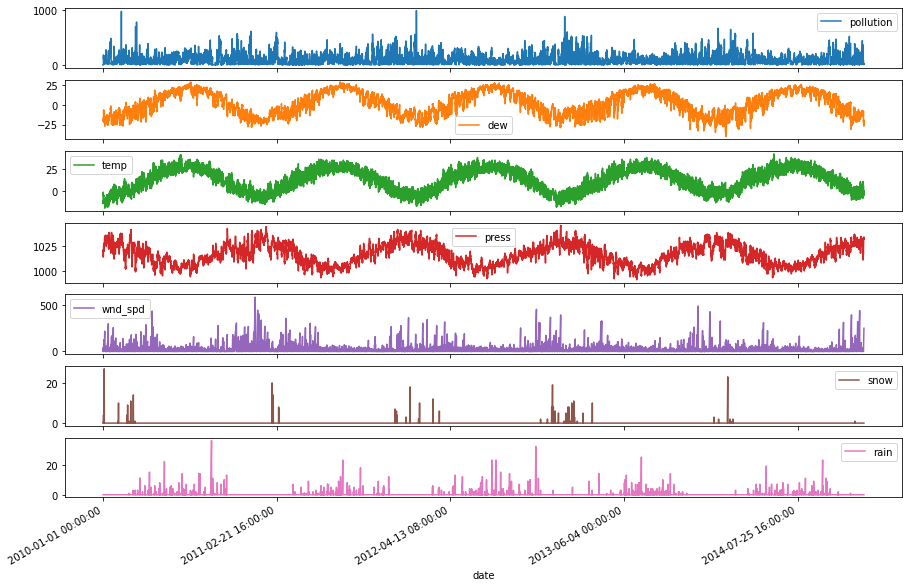

In [81]:
df.plot(subplots=True, figsize=(15,10), legend=True)

# **Step 2: Preprocess the data**

## **Encode wind direction**

In [82]:
values = df.values
# integer encode direction
encoder = LabelEncoder()
values[:, 4] = encoder.fit_transform(values[:, 4])
# ensure all data is float
values = values.astype('float32')

df['wnd_dir'] = values[:, 4]

df.head()

,pollution,dew,temp,press,wnd_dir,wnd_spd,snow,rain
date,,,,,,,,
2010-01-01 00:00:00,0.0,-21,-11.0,1021.0,1.0,1.79,0,0
2010-01-01 01:00:00,0.0,-21,-12.0,1020.0,1.0,4.92,0,0
2010-01-01 02:00:00,0.0,-21,-11.0,1019.0,1.0,6.71,0,0
2010-01-01 03:00:00,0.0,-21,-14.0,1019.0,1.0,9.84,0,0
2010-01-01 04:00:00,0.0,-20,-12.0,1018.0,1.0,12.97,0,0


## **Rename "date" as "ds" and "pollution" with "y"**

In [83]:
df_processed = df.reset_index().rename({'date':'ds', 'pollution':'y'}, axis='columns')
df_processed.head()

,ds,y,dew,temp,press,wnd_dir,wnd_spd,snow,rain
0,2010-01-01 00:00:00,0.0,-21,-11.0,1021.0,1.0,1.79,0,0
1,2010-01-01 01:00:00,0.0,-21,-12.0,1020.0,1.0,4.92,0,0
2,2010-01-01 02:00:00,0.0,-21,-11.0,1019.0,1.0,6.71,0,0
3,2010-01-01 03:00:00,0.0,-21,-14.0,1019.0,1.0,9.84,0,0
4,2010-01-01 04:00:00,0.0,-20,-12.0,1018.0,1.0,12.97,0,0


## **Split the train set and the test set**

In [84]:
# use first 90% data to train
n_train_hours = int(len(df_processed) * 0.9)
train = df_processed[:n_train_hours]
test = df_processed[n_train_hours:]

y_true = test['y'].values
test = test.drop(['y'], axis=1)

print("train shape:", train.shape)
print("test shape:", test.shape)
print("y_true shape:", y_true.shape)

train shape: (39441, 9)
test shape: (4383, 8)
y_true shape: (4383,)


# **Step 3: Train Prophet Model by past 1 step**

## **Show the columns' name**

In [85]:
print(df_processed.columns)

Index(['ds', 'y', 'dew', 'temp', 'press', 'wnd_dir', 'wnd_spd', 'snow',
       'rain'],
      dtype='object')


## **Build prophet model**

In [86]:
# model = Prophet(interval_width=0.95)

# # modify here to choose variates
# model.add_regressor('dew')
# model.add_regressor('temp')
# model.add_regressor('press')
# model.add_regressor('wnd_dir')
# model.add_regressor('wnd_spd')
# model.add_regressor('snow')

## **Fit model to the. train data**

In [87]:
# model.fit(train)

In [88]:
# model.params

# **Step 4: Implement data forecasting by past 1 step**

## **Show the test set info**

In [89]:
# test.head()

## **Predict future value**

In [90]:
# result = model.predict(test)
# prediction = result['yhat']
# print("prediction shape:", prediction.shape)

## **Calculate RMSE**

In [91]:
# rmse = sqrt(mean_squared_error(prediction, y_true))
# print('Test RMSE: %.3f' % rmse)

## **Show prediction results**

In [92]:
# plt.figure(figsize=(15, 8))
# plt.plot(y_true[:200], label='Ground Truth')
# plt.plot(prediction[:200], label='Prediction')
# plt.title("FB Prophet")
# plt.legend()
# plt.show()

In [93]:
# plt.figure(figsize=(25, 5))
# plt.plot(y_true[:2000], label='Ground Truth')
# plt.plot(prediction[:2000], label='Prediction')
# plt.title("FB Prophet")
# plt.legend()
# plt.show()

In [94]:
# model.plot(result)

In [95]:
# model.plot_components(result)

# **Step 5: Train prophet model and predict future 1 step by past 24 steps**

## **Reframe dataset for supervised learning**

In [96]:
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in-1, -1, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j + 1, i+1)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i-1)[0])
        if i == 0:
            names += ['var1(t)' ]
        else:
            names += [('var1(t+%d)' % (i))]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [97]:
pastStep = 24 # modify here to choose past steps
maxFutureStep = 24  # modify here to choose future steps
futureStep = 1

# frame as supervised learning
reframed = series_to_supervised(df.values, pastStep, futureStep)
reframed['ds'] = df_processed['ds'].shift(-1)[pastStep-1:]
reframed_processed = reframed.rename({'var1(t)':'y'}, axis='columns')


print(reframed_processed.shape)
print(reframed_processed.head())

(43800, 194)
    var1(t-24)  var2(t-24)  var3(t-24)  ...  var8(t-1)      y                   ds
23         0.0       -21.0       -11.0  ...        0.0  129.0  2010-01-02 00:00:00
24         0.0       -21.0       -12.0  ...        0.0  148.0  2010-01-02 01:00:00
25         0.0       -21.0       -11.0  ...        0.0  159.0  2010-01-02 02:00:00
26         0.0       -21.0       -14.0  ...        0.0  181.0  2010-01-02 03:00:00
27         0.0       -20.0       -12.0  ...        0.0  138.0  2010-01-02 04:00:00

[5 rows x 194 columns]


## **Split the train set and the test set**

In [98]:
# use first 90% data to train
n_train_hours = int(len(df_processed) * 0.9)
train = reframed_processed[:n_train_hours]
test = reframed_processed[n_train_hours:]

y_true = test['y'].values
test = test.drop(['y'], axis=1)

print("train shape:", train.shape)
print("test shape:", test.shape)
print("y_true shape:", y_true.shape)

train shape: (39441, 194)
test shape: (4359, 193)
y_true shape: (4359,)


## **Train the model by using past 24 steps**

In [99]:
model = Prophet(interval_width=0.95)

names = list()
for i in range(pastStep, 0, -1):
  names += [('var%d(t-%d)' % (j + 1, i)) for j in range(8)]

for variable in names:
  model.add_regressor(variable)

In [100]:
model.fit(train[-30:])

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.


## **Implement prediction**

In [101]:
result = model.predict(test)
prediction = result['yhat']
print("prediction shape:", prediction.shape)

prediction shape: (4359,)


## **Calculate RMSE**

In [102]:
rmse = sqrt(mean_squared_error(prediction, y_true))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 59589.079


## **Show prediction results**

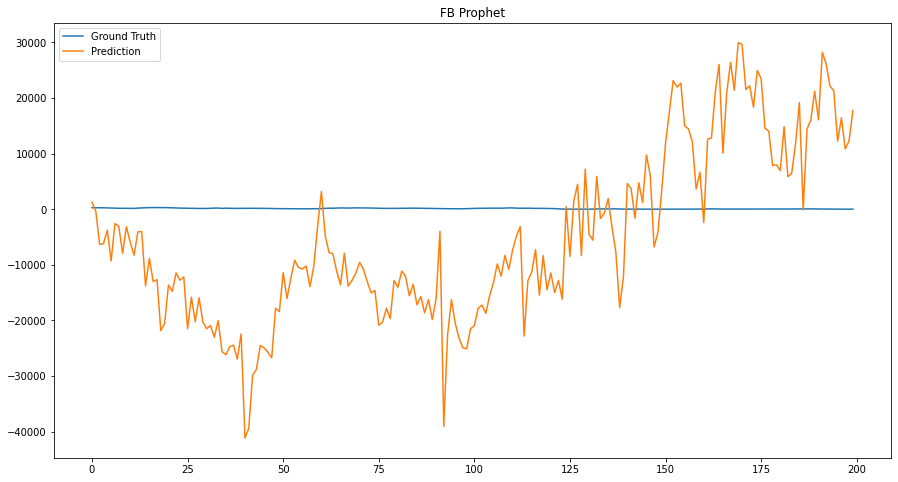

In [103]:
plt.figure(figsize=(15, 8))
plt.plot(y_true[:200], label='Ground Truth')
plt.plot(prediction[:200], label='Prediction')
plt.title("FB Prophet")
plt.legend()
plt.show()

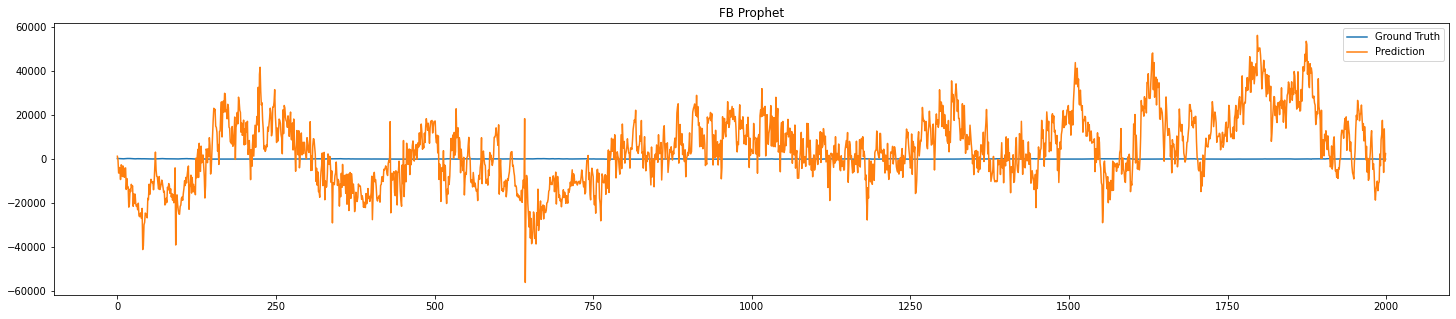

In [104]:
plt.figure(figsize=(25, 5))
plt.plot(y_true[:2000], label='Ground Truth')
plt.plot(prediction[:2000], label='Prediction')
plt.title("FB Prophet")
plt.legend()
plt.show()

# **Step 6: Train prophet model and predict future several steps by past 24 steps**

## **Split the train set and test set**

In [105]:
# use first 90% data to train
n_train_hours = int(len(df_processed) * 0.9)
train = df_processed[:n_train_hours]
test = df_processed[n_train_hours:]

y_true = test['y'].values
test = test.drop(['y'], axis=1)

print("train shape:", train.shape)
print("test shape:", test.shape)
print("y_true shape:", y_true.shape)

train shape: (39441, 9)
test shape: (4383, 8)
y_true shape: (4383,)


In [106]:
dew_train = train[['dew', 'ds']].rename({'dew':'y'}, axis='columns')
temp_train = train[['temp', 'ds']].rename({'temp':'y'}, axis='columns')
press_train = train[['press', 'ds']].rename({'press':'y'}, axis='columns')
wnd_dir_train = train[['wnd_dir', 'ds']].rename({'wnd_dir':'y'}, axis='columns')
wnd_spd_train = train[['wnd_spd', 'ds']].rename({'wnd_spd':'y'}, axis='columns')
snow_train = train[['snow', 'ds']].rename({'snow':'y'}, axis='columns')

In [107]:
dew_test = test[['dew', 'ds']].rename({'dew':'y'}, axis='columns')
temp_test = test[['temp', 'ds']].rename({'temp':'y'}, axis='columns')
press_test = test[['press', 'ds']].rename({'press':'y'}, axis='columns')
wnd_dir_test = test[['wnd_dir', 'ds']].rename({'wnd_dir':'y'}, axis='columns')
wnd_spd_test = test[['wnd_spd', 'ds']].rename({'wnd_spd':'y'}, axis='columns')
snow_test = test[['snow', 'ds']].rename({'snow':'y'}, axis='columns')

In [108]:
# def var_prediction(var_name, dataset, trainingSize, predSize, futureStep):
#   print("start to predict%10s"%var_name)
#   prediction = np.array([])
#   if predSize > len(test):
#     predSize = len(test)
#   for i in range(0, predSize, futureStep-1):
#     var_train = dataset[[var_name, 'ds']][n_train_hours-trainingSize+i:n_train_hours+i].rename({var_name:'y'}, axis='columns')  #-100:0
  
#     var_model = Prophet(interval_width=0.95, yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=True)
#     var_model.fit(var_train)

#     future = var_model.make_future_dataframe(periods = futureStep, include_history = False)
#     pred = var_model.predict(future)
#     pred = pred[:predSize]
#     prediction = np.append(prediction, pred['yhat'].values)
#   print("finish to predict%10s"%var_name)
#   return prediction

In [109]:
def VarPrediction(var_names, trainingSize, startPoint, futureStep):
  var_pred = pd.DataFrame()
  for var in var_names:
    print("\npredict ", var)
    # set up training set for each variable
    var_train = df_processed[[var, 'ds']][startPoint-trainingSize:startPoint].rename({var:'y'}, axis='columns').reset_index(drop=True)  #-100:0

    # train model
    print("train model")
    var_model = Prophet(interval_width=0.95, yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=True)
    var_model.fit(var_train)
    print("train model finished")

    # predict yhat
    print("predict ", var)
    future = var_model.make_future_dataframe(periods = futureStep-1, include_history=False)
    yhat_var = var_model.predict(future)['yhat']
    var_pred[var] = yhat_var

  print("\nvar_pred")
  print(var_pred)
  return var_pred

In [110]:
df_processed.iloc[300]

ds         2010-01-13 12:00:00
y                           26
dew                        -21
temp                        -8
press                     1031
wnd_dir                      1
wnd_spd                 270.89
snow                         0
rain                         0
Name: 300, dtype: object

In [111]:
var_pred = VarPrediction(['dew', 'temp', 'press', 'wnd_dir', 'wnd_spd', 'snow', 'rain'], 10, n_train_hours, 5)

INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
    dew        temp         press   wnd_dir    wnd_spd  snow       rain
0  20.0  176.125087 -13115.051601 -1.118688  -5.785824   0.0 -25.895917
1  20.0  -18.624321 -25147.640125  1.550117  -0.512898   0.0  -9.107354
2  20.0   92.697987 -22731.573567 -5.569953 -11.046448   0.0 -62.693535
3  20.0   89.383557 -37660.567452 -4.937301  -9.446065   0.0 -59.059329


In [114]:
df_processed

,ds,y,dew,temp,press,wnd_dir,wnd_spd,snow,rain
0,2010-01-01 00:00:00,0.0,-21,-11.0,1021.0,1.0,1.79,0,0
1,2010-01-01 01:00:00,0.0,-21,-12.0,1020.0,1.0,4.92,0,0
2,2010-01-01 02:00:00,0.0,-21,-11.0,1019.0,1.0,6.71,0,0
3,2010-01-01 03:00:00,0.0,-21,-14.0,1019.0,1.0,9.84,0,0
4,2010-01-01 04:00:00,0.0,-20,-12.0,1018.0,1.0,12.97,0,0
...,...,...,...,...,...,...,...,...,...
43819,2014-12-31 19:00:00,8.0,-23,-2.0,1034.0,1.0,231.97,0,0
43820,2014-12-31 20:00:00,10.0,-22,-3.0,1034.0,1.0,237.78,0,0
43821,2014-12-31 21:00:00,10.0,-22,-3.0,1034.0,1.0,242.70,0,0
43822,2014-12-31 22:00:00,8.0,-22,-4.0,1034.0,1.0,246.72,0,0


In [143]:
pastStep = 24 # modify here to choose past steps
maxFutureStep = 24  # modify here to choose future steps
trainingSize = 10
predSize = 5
y_pred_agg = np.array([])
var_names = [x for x in df_processed.columns if (x != 'ds' and x!= 'y')]

# for each future step
for futureStep in range(1, maxFutureStep+1, 1): 

  y_prediction = np.array([])
  RMSE = np.array([])

  for i in range(0, predSize, futureStep):
    train_reframed = reframed_processed[(pred_point-24)-trainingSize:(pred_point-24)]

    # Set up y_model  
    model_y = Prophet(interval_width=0.95)

    # train y_model
    model_y.fit(train_reframed)

    for j in range(0, futureStep):
      print("\nfutureStep:", str(futureStep), " i:", str(i), " j:", str(j))
      pred_point = n_train_hours + i

      if futureStep > 1:
        var_pred = VarPrediction(var_names, trainingSize, pred_point, futureStep)
      
      # The first prediction in each futureStep group
      if j == 0:
        # Set up the train set and the test set
        
        test = df_processed.iloc[pred_point-pastStep:pred_point].drop(['ds'], axis='columns')
        test_reframed = series_to_supervised(test, 24, 0)
        test_reframed['ds'] = df_processed['ds'].iloc[pred_point]
        #print("\ntest_reframed")
        #print(test_reframed)

        # predict yhat
        yhat = model_y.predict(test_reframed)['yhat']
        y_prediction = np.append(y_prediction, yhat)
        print("\ny_prediction")
        print(y_prediction)
      else:
        #train_reframed = train_reframed.iloc[1:].reset_index(drop=True)
        test = test.iloc[1:].append(var_pred.iloc[j-1], ignore_index=True)
        test['y'].iloc[-1] = yhat[0]
        test_reframed = series_to_supervised(test, 24, 0)
        test_reframed['ds'] = df_processed['ds'].iloc[pred_point+j]
        #print("\ntest_reframed")
        #print(test_reframed)

        yhat = model_y.predict(test_reframed)['yhat']
        y_prediction = np.append(y_prediction, yhat)
        print("\ny_prediction")
        print(y_prediction)

  y_prediction = y_prediction[:predSize]
  if futureStep == 1:
    y_pred_agg = np.array([y_prediction])
  else:
    y_pred_agg = np.append(y_pred_agg, np.array([y_prediction]),axis = 0)
  print("\ny_pred_agg")
  print(y_pred_agg)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



futureStep: 1  i: 0  j: 0


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[64.68658733]

futureStep: 1  i: 1  j: 0


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[64.68658733 67.96224462]

futureStep: 1  i: 2  j: 0


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[64.68658733 67.96224462 70.7079469 ]

futureStep: 1  i: 3  j: 0


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[64.68658733 67.96224462 70.7079469  57.83788459]

futureStep: 1  i: 4  j: 0


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[64.68658733 67.96224462 70.7079469  57.83788459 52.91660728]

y_pred_agg
[[64.68658733 67.96224462 70.7079469  57.83788459 52.91660728]]

futureStep: 2  i: 0  j: 0

predict  dew
train model


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.


train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.


train model finished
predict  press

predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
    dew        temp         press   wnd_dir   wnd_spd  snow       rain
0  20.0  176.125087 -13115.051601 -1.118688 -5.785824   0.0 -25.895917


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[51.53503474]

futureStep: 2  i: 0  j: 1

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
    dew        temp         press   wnd_dir   wnd_spd  snow       rain
0  20.0  176.125087 -13115.051601 -1.118688 -5.785824   0.0 -25.895917


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[51.53503474 51.35920773]

futureStep: 2  i: 2  j: 0

predict  dew
train model


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.


train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.


train model finished
predict  temp

predict  press
train model


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.


train model finished
predict  press

predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
         dew        temp        press   wnd_dir   wnd_spd  snow      rain
0  72.059572  338.011665 -6377.048747  7.485603 -5.494356   0.0 -3.050004


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[51.53503474 51.35920773 71.23790191]

futureStep: 2  i: 2  j: 1

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
         dew        temp        press   wnd_dir   wnd_spd  snow      rain
0  72.059572  338.011665 -6377.048747  7.485603 -5.494356   0.0 -3.050004


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[51.53503474 51.35920773 71.23790191 74.51355919]

futureStep: 2  i: 4  j: 0

predict  dew
train model


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.


train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.


train model finished
predict  press

predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
          dew       temp         press   wnd_dir   wnd_spd  snow      rain
0 -106.770327  61.641623 -14884.220155  9.993571  8.738629   0.0 -5.176551


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[51.53503474 51.35920773 71.23790191 74.51355919 59.39558436]

futureStep: 2  i: 4  j: 1

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
          dew       temp         press   wnd_dir   wnd_spd  snow      rain
0 -106.770327  61.641623 -14884.220155  9.993571  8.738629   0.0 -5.176551


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[51.53503474 51.35920773 71.23790191 74.51355919 59.39558436 60.95328413]

y_pred_agg
[[64.68658733 67.96224462 70.7079469  57.83788459 52.91660728]
 [51.53503474 51.35920773 71.23790191 74.51355919 59.39558436]]

futureStep: 3  i: 0  j: 0

predict  dew
train model


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.


train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
    dew        temp         press   wnd_dir   wnd_spd  snow       rain
0  20.0  176.125087 -13115.051601 -1.118688 -5.785824   0.0 -25.895917
1  20.0  -18.624321 -25147.640125  1.550117 -0.512898   0.0  -9.107354


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[51.53503474]

futureStep: 3  i: 0  j: 1

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
    dew        temp         press   wnd_dir   wnd_spd  snow       rain
0  20.0  176.125087 -13115.051601 -1.118688 -5.785824   0.0 -25.895917
1  20.0  -18.624321 -25147.640125  1.550117 -0.512898   0.0  -9.107354


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[51.53503474 51.35920773]

futureStep: 3  i: 0  j: 2

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
    dew        temp         press   wnd_dir   wnd_spd  snow       rain
0  20.0  176.125087 -13115.051601 -1.118688 -5.785824   0.0 -25.895917
1  20.0  -18.624321 -25147.640125  1.550117 -0.512898   0.0  -9.107354


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[51.53503474 51.35920773 51.18338073]

futureStep: 3  i: 3  j: 0

predict  dew
train model


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.


train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
          dew        temp        press   wnd_dir   wnd_spd  snow      rain
0  224.005413 -148.543159 -8889.562654 -5.310547  1.490392   0.0  8.105243
1  468.364703   -6.900313  5549.379718 -1.035904  2.324464   0.0  1.336842


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[51.53503474 51.35920773 51.18338073 74.51355919]

futureStep: 3  i: 3  j: 1

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
          dew        temp        press   wnd_dir   wnd_spd  snow      rain
0  224.005413 -148.543159 -8889.562654 -5.310547  1.490392   0.0  8.105243
1  468.364703   -6.900313  5549.379718 -1.035904  2.324464   0.0  1.336842


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[51.53503474 51.35920773 51.18338073 74.51355919 77.78921648]

futureStep: 3  i: 3  j: 2

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.


train model finished
predict  press

predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
          dew        temp        press   wnd_dir   wnd_spd  snow      rain
0  224.005413 -148.543159 -8889.562654 -5.310547  1.490392   0.0  8.105243
1  468.364703   -6.900313  5549.379718 -1.035904  2.324464   0.0  1.336842


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[51.53503474 51.35920773 51.18338073 74.51355919 77.78921648 81.06487377]

y_pred_agg
[[64.68658733 67.96224462 70.7079469  57.83788459 52.91660728]
 [51.53503474 51.35920773 71.23790191 74.51355919 59.39558436]
 [51.53503474 51.35920773 51.18338073 74.51355919 77.78921648]]

futureStep: 4  i: 0  j: 0

predict  dew
train model


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.


train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
    dew        temp         press   wnd_dir    wnd_spd  snow       rain
0  20.0  176.125087 -13115.051601 -1.118688  -5.785824   0.0 -25.895917
1  20.0  -18.624321 -25147.640125  1.550117  -0.512898   0.0  -9.107354
2  20.0   92.697987 -22731.573567 -5.569953 -11.046448   0.0 -62.693535


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[50.86534768]

futureStep: 4  i: 0  j: 1

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
    dew        temp         press   wnd_dir    wnd_spd  snow       rain
0  20.0  176.125087 -13115.051601 -1.118688  -5.785824   0.0 -25.895917
1  20.0  -18.624321 -25147.640125  1.550117  -0.512898   0.0  -9.107354
2  20.0   92.697987 -22731.573567 -5.569953 -11.046448   0.0 -62.693535


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[50.86534768 51.37816258]

futureStep: 4  i: 0  j: 2

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
    dew        temp         press   wnd_dir    wnd_spd  snow       rain
0  20.0  176.125087 -13115.051601 -1.118688  -5.785824   0.0 -25.895917
1  20.0  -18.624321 -25147.640125  1.550117  -0.512898   0.0  -9.107354
2  20.0   92.697987 -22731.573567 -5.569953 -11.046448   0.0 -62.693535


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[50.86534768 51.37816258 51.89097748]

futureStep: 4  i: 0  j: 3

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
    dew        temp         press   wnd_dir    wnd_spd  snow       rain
0  20.0  176.125087 -13115.051601 -1.118688  -5.785824   0.0 -25.895917
1  20.0  -18.624321 -25147.640125  1.550117  -0.512898   0.0  -9.107354
2  20.0   92.697987 -22731.573567 -5.569953 -11.046448   0.0 -62.693535


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[50.86534768 51.37816258 51.89097748 52.40379238]

futureStep: 4  i: 4  j: 0

predict  dew
train model


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.


train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.


train model finished
predict  temp

predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
          dew       temp         press    wnd_dir    wnd_spd  snow       rain
0 -106.770327  61.641623 -14884.220155   9.993571   8.738629   0.0  -5.176551
1   -2.443600  27.320729 -25938.695305   5.590033   4.780925   0.0  -1.898106
2  -61.576400  36.422772 -17775.232150  24.074218  14.179028   0.0 -12.114882


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[50.86534768 51.37816258 51.89097748 52.40379238 77.78921648]

futureStep: 4  i: 4  j: 1

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
          dew       temp         press    wnd_dir    wnd_spd  snow       rain
0 -106.770327  61.641623 -14884.220155   9.993571   8.738629   0.0  -5.176551
1   -2.443600  27.320729 -25938.695305   5.590033   4.780925   0.0  -1.898106
2  -61.576400  36.422772 -17775.232150  24.074218  14.179028   0.0 -12.114882


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[50.86534768 51.37816258 51.89097748 52.40379238 77.78921648 81.06487377]

futureStep: 4  i: 4  j: 2

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.


train model finished
predict  press

predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
          dew       temp         press    wnd_dir    wnd_spd  snow       rain
0 -106.770327  61.641623 -14884.220155   9.993571   8.738629   0.0  -5.176551
1   -2.443600  27.320729 -25938.695305   5.590033   4.780925   0.0  -1.898106
2  -61.576400  36.422772 -17775.232150  24.074218  14.179028   0.0 -12.114882


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[50.86534768 51.37816258 51.89097748 52.40379238 77.78921648 81.06487377
 84.34053106]

futureStep: 4  i: 4  j: 3

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.


train model finished
predict  press

predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
          dew       temp         press    wnd_dir    wnd_spd  snow       rain
0 -106.770327  61.641623 -14884.220155   9.993571   8.738629   0.0  -5.176551
1   -2.443600  27.320729 -25938.695305   5.590033   4.780925   0.0  -1.898106
2  -61.576400  36.422772 -17775.232150  24.074218  14.179028   0.0 -12.114882


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[50.86534768 51.37816258 51.89097748 52.40379238 77.78921648 81.06487377
 84.34053106 87.61618835]

y_pred_agg
[[64.68658733 67.96224462 70.7079469  57.83788459 52.91660728]
 [51.53503474 51.35920773 71.23790191 74.51355919 59.39558436]
 [51.53503474 51.35920773 51.18338073 74.51355919 77.78921648]
 [50.86534768 51.37816258 51.89097748 52.40379238 77.78921648]]

futureStep: 5  i: 0  j: 0

predict  dew
train model


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.


train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.


train model finished
predict  temp

predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
    dew        temp         press   wnd_dir    wnd_spd  snow       rain
0  20.0  176.125087 -13115.051601 -1.118688  -5.785824   0.0 -25.895917
1  20.0  -18.624321 -25147.640125  1.550117  -0.512898   0.0  -9.107354
2  20.0   92.697987 -22731.573567 -5.569953 -11.046448   0.0 -62.693535
3  20.0   89.383557 -37660.567452 -4.937301  -9.446065   0.0 -59.059329


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[51.53503474]

futureStep: 5  i: 0  j: 1

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
    dew        temp         press   wnd_dir    wnd_spd  snow       rain
0  20.0  176.125087 -13115.051601 -1.118688  -5.785824   0.0 -25.895917
1  20.0  -18.624321 -25147.640125  1.550117  -0.512898   0.0  -9.107354
2  20.0   92.697987 -22731.573567 -5.569953 -11.046448   0.0 -62.693535
3  20.0   89.383557 -37660.567452 -4.937301  -9.446065   0.0 -59.059329


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[51.53503474 51.35920773]

futureStep: 5  i: 0  j: 2

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
    dew        temp         press   wnd_dir    wnd_spd  snow       rain
0  20.0  176.125087 -13115.051601 -1.118688  -5.785824   0.0 -25.895917
1  20.0  -18.624321 -25147.640125  1.550117  -0.512898   0.0  -9.107354
2  20.0   92.697987 -22731.573567 -5.569953 -11.046448   0.0 -62.693535
3  20.0   89.383557 -37660.567452 -4.937301  -9.446065   0.0 -59.059329


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[51.53503474 51.35920773 51.18338073]

futureStep: 5  i: 0  j: 3

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
    dew        temp         press   wnd_dir    wnd_spd  snow       rain
0  20.0  176.125087 -13115.051601 -1.118688  -5.785824   0.0 -25.895917
1  20.0  -18.624321 -25147.640125  1.550117  -0.512898   0.0  -9.107354
2  20.0   92.697987 -22731.573567 -5.569953 -11.046448   0.0 -62.693535
3  20.0   89.383557 -37660.567452 -4.937301  -9.446065   0.0 -59.059329


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[51.53503474 51.35920773 51.18338073 51.00755372]

futureStep: 5  i: 0  j: 4

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
    dew        temp         press   wnd_dir    wnd_spd  snow       rain
0  20.0  176.125087 -13115.051601 -1.118688  -5.785824   0.0 -25.895917
1  20.0  -18.624321 -25147.640125  1.550117  -0.512898   0.0  -9.107354
2  20.0   92.697987 -22731.573567 -5.569953 -11.046448   0.0 -62.693535
3  20.0   89.383557 -37660.567452 -4.937301  -9.446065   0.0 -59.059329


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[51.53503474 51.35920773 51.18338073 51.00755372 50.83172672]

y_pred_agg
[[64.68658733 67.96224462 70.7079469  57.83788459 52.91660728]
 [51.53503474 51.35920773 71.23790191 74.51355919 59.39558436]
 [51.53503474 51.35920773 51.18338073 74.51355919 77.78921648]
 [50.86534768 51.37816258 51.89097748 52.40379238 77.78921648]
 [51.53503474 51.35920773 51.18338073 51.00755372 50.83172672]]

futureStep: 6  i: 0  j: 0

predict  dew
train model


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.


train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
    dew        temp         press    wnd_dir    wnd_spd  snow        rain
0  20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1  20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2  20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3  20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4  20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[64.68658733]

futureStep: 6  i: 0  j: 1

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
    dew        temp         press    wnd_dir    wnd_spd  snow        rain
0  20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1  20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2  20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3  20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4  20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[64.68658733 67.96224462]

futureStep: 6  i: 0  j: 2

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
    dew        temp         press    wnd_dir    wnd_spd  snow        rain
0  20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1  20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2  20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3  20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4  20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[64.68658733 67.96224462 71.23790191]

futureStep: 6  i: 0  j: 3

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
    dew        temp         press    wnd_dir    wnd_spd  snow        rain
0  20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1  20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2  20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3  20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4  20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[64.68658733 67.96224462 71.23790191 74.51355919]

futureStep: 6  i: 0  j: 4

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.


train model finished
predict  press

predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
    dew        temp         press    wnd_dir    wnd_spd  snow        rain
0  20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1  20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2  20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3  20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4  20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[64.68658733 67.96224462 71.23790191 74.51355919 77.78921648]

futureStep: 6  i: 0  j: 5

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
    dew        temp         press    wnd_dir    wnd_spd  snow        rain
0  20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1  20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2  20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3  20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4  20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[64.68658733 67.96224462 71.23790191 74.51355919 77.78921648 81.06487377]

y_pred_agg
[[64.68658733 67.96224462 70.7079469  57.83788459 52.91660728]
 [51.53503474 51.35920773 71.23790191 74.51355919 59.39558436]
 [51.53503474 51.35920773 51.18338073 74.51355919 77.78921648]
 [50.86534768 51.37816258 51.89097748 52.40379238 77.78921648]
 [51.53503474 51.35920773 51.18338073 51.00755372 50.83172672]
 [64.68658733 67.96224462 71.23790191 74.51355919 77.78921648]]

futureStep: 7  i: 0  j: 0

predict  dew
train model


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.


train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
    dew        temp         press    wnd_dir    wnd_spd  snow        rain
0  20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1  20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2  20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3  20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4  20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5  20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[64.68658733]

futureStep: 7  i: 0  j: 1

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
    dew        temp         press    wnd_dir    wnd_spd  snow        rain
0  20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1  20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2  20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3  20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4  20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5  20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[64.68658733 67.96224462]

futureStep: 7  i: 0  j: 2

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
    dew        temp         press    wnd_dir    wnd_spd  snow        rain
0  20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1  20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2  20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3  20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4  20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5  20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[64.68658733 67.96224462 71.23790191]

futureStep: 7  i: 0  j: 3

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
    dew        temp         press    wnd_dir    wnd_spd  snow        rain
0  20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1  20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2  20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3  20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4  20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5  20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[64.68658733 67.96224462 71.23790191 74.51355919]

futureStep: 7  i: 0  j: 4

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
    dew        temp         press    wnd_dir    wnd_spd  snow        rain
0  20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1  20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2  20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3  20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4  20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5  20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[64.68658733 67.96224462 71.23790191 74.51355919 77.78921648]

futureStep: 7  i: 0  j: 5

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
    dew        temp         press    wnd_dir    wnd_spd  snow        rain
0  20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1  20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2  20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3  20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4  20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5  20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[64.68658733 67.96224462 71.23790191 74.51355919 77.78921648 81.06487377]

futureStep: 7  i: 0  j: 6

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
    dew        temp         press    wnd_dir    wnd_spd  snow        rain
0  20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1  20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2  20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3  20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4  20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5  20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[64.68658733 67.96224462 71.23790191 74.51355919 77.78921648 81.06487377
 84.34053106]

y_pred_agg
[[64.68658733 67.96224462 70.7079469  57.83788459 52.91660728]
 [51.53503474 51.35920773 71.23790191 74.51355919 59.39558436]
 [51.53503474 51.35920773 51.18338073 74.51355919 77.78921648]
 [50.86534768 51.37816258 51.89097748 52.40379238 77.78921648]
 [51.53503474 51.35920773 51.18338073 51.00755372 50.83172672]
 [64.68658733 67.96224462 71.23790191 74.51355919 77.78921648]
 [64.68658733 67.96224462 71.23790191 74.51355919 77.78921648]]

futureStep: 8  i: 0  j: 0

predict  dew
train model


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.


train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
    dew        temp         press    wnd_dir    wnd_spd  snow        rain
0  20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1  20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2  20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3  20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4  20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5  20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6  20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[64.68658733]

futureStep: 8  i: 0  j: 1

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
    dew        temp         press    wnd_dir    wnd_spd  snow        rain
0  20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1  20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2  20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3  20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4  20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5  20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6  20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[64.68658733 67.96224462]

futureStep: 8  i: 0  j: 2

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
    dew        temp         press    wnd_dir    wnd_spd  snow        rain
0  20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1  20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2  20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3  20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4  20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5  20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6  20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[64.68658733 67.96224462 71.23790191]

futureStep: 8  i: 0  j: 3

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
    dew        temp         press    wnd_dir    wnd_spd  snow        rain
0  20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1  20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2  20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3  20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4  20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5  20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6  20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[64.68658733 67.96224462 71.23790191 74.51355919]

futureStep: 8  i: 0  j: 4

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
    dew        temp         press    wnd_dir    wnd_spd  snow        rain
0  20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1  20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2  20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3  20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4  20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5  20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6  20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[64.68658733 67.96224462 71.23790191 74.51355919 77.78921648]

futureStep: 8  i: 0  j: 5

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
    dew        temp         press    wnd_dir    wnd_spd  snow        rain
0  20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1  20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2  20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3  20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4  20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5  20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6  20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[64.68658733 67.96224462 71.23790191 74.51355919 77.78921648 81.06487377]

futureStep: 8  i: 0  j: 6

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
    dew        temp         press    wnd_dir    wnd_spd  snow        rain
0  20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1  20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2  20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3  20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4  20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5  20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6  20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[64.68658733 67.96224462 71.23790191 74.51355919 77.78921648 81.06487377
 84.34053106]

futureStep: 8  i: 0  j: 7

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.


train model finished
predict  press

predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
    dew        temp         press    wnd_dir    wnd_spd  snow        rain
0  20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1  20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2  20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3  20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4  20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5  20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6  20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[64.68658733 67.96224462 71.23790191 74.51355919 77.78921648 81.06487377
 84.34053106 87.61618835]

y_pred_agg
[[64.68658733 67.96224462 70.7079469  57.83788459 52.91660728]
 [51.53503474 51.35920773 71.23790191 74.51355919 59.39558436]
 [51.53503474 51.35920773 51.18338073 74.51355919 77.78921648]
 [50.86534768 51.37816258 51.89097748 52.40379238 77.78921648]
 [51.53503474 51.35920773 51.18338073 51.00755372 50.83172672]
 [64.68658733 67.96224462 71.23790191 74.51355919 77.78921648]
 [64.68658733 67.96224462 71.23790191 74.51355919 77.78921648]
 [64.68658733 67.96224462 71.23790191 74.51355919 77.78921648]]

futureStep: 9  i: 0  j: 0

predict  dew
train model


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.


train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
    dew        temp         press    wnd_dir    wnd_spd  snow        rain
0  20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1  20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2  20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3  20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4  20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5  20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6  20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7  20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[64.68658733]

futureStep: 9  i: 0  j: 1

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
    dew        temp         press    wnd_dir    wnd_spd  snow        rain
0  20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1  20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2  20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3  20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4  20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5  20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6  20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7  20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[64.68658733 67.96224462]

futureStep: 9  i: 0  j: 2

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
    dew        temp         press    wnd_dir    wnd_spd  snow        rain
0  20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1  20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2  20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3  20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4  20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5  20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6  20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7  20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[64.68658733 67.96224462 71.23790191]

futureStep: 9  i: 0  j: 3

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
    dew        temp         press    wnd_dir    wnd_spd  snow        rain
0  20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1  20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2  20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3  20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4  20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5  20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6  20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7  20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[64.68658733 67.96224462 71.23790191 74.51355919]

futureStep: 9  i: 0  j: 4

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.


train model finished
predict  press

predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
    dew        temp         press    wnd_dir    wnd_spd  snow        rain
0  20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1  20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2  20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3  20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4  20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5  20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6  20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7  20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[64.68658733 67.96224462 71.23790191 74.51355919 77.78921648]

futureStep: 9  i: 0  j: 5

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
    dew        temp         press    wnd_dir    wnd_spd  snow        rain
0  20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1  20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2  20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3  20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4  20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5  20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6  20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7  20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[64.68658733 67.96224462 71.23790191 74.51355919 77.78921648 81.06487377]

futureStep: 9  i: 0  j: 6

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
    dew        temp         press    wnd_dir    wnd_spd  snow        rain
0  20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1  20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2  20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3  20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4  20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5  20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6  20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7  20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[64.68658733 67.96224462 71.23790191 74.51355919 77.78921648 81.06487377
 84.34053106]

futureStep: 9  i: 0  j: 7

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.


train model finished
predict  press

predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
    dew        temp         press    wnd_dir    wnd_spd  snow        rain
0  20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1  20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2  20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3  20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4  20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5  20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6  20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7  20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[64.68658733 67.96224462 71.23790191 74.51355919 77.78921648 81.06487377
 84.34053106 87.61618835]

futureStep: 9  i: 0  j: 8

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
    dew        temp         press    wnd_dir    wnd_spd  snow        rain
0  20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1  20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2  20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3  20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4  20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5  20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6  20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7  20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[64.68658733 67.96224462 71.23790191 74.51355919 77.78921648 81.06487377
 84.34053106 87.61618835 90.89184563]

y_pred_agg
[[64.68658733 67.96224462 70.7079469  57.83788459 52.91660728]
 [51.53503474 51.35920773 71.23790191 74.51355919 59.39558436]
 [51.53503474 51.35920773 51.18338073 74.51355919 77.78921648]
 [50.86534768 51.37816258 51.89097748 52.40379238 77.78921648]
 [51.53503474 51.35920773 51.18338073 51.00755372 50.83172672]
 [64.68658733 67.96224462 71.23790191 74.51355919 77.78921648]
 [64.68658733 67.96224462 71.23790191 74.51355919 77.78921648]
 [64.68658733 67.96224462 71.23790191 74.51355919 77.78921648]
 [64.68658733 67.96224462 71.23790191 74.51355919 77.78921648]]

futureStep: 10  i: 0  j: 0

predict  dew
train model


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.


train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.


train model finished
predict  temp

predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
    dew        temp         press    wnd_dir    wnd_spd  snow        rain
0  20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1  20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2  20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3  20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4  20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5  20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6  20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7  20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8  20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[64.68658733]

futureStep: 10  i: 0  j: 1

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
    dew        temp         press    wnd_dir    wnd_spd  snow        rain
0  20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1  20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2  20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3  20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4  20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5  20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6  20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7  20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8  20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[64.68658733 67.96224462]

futureStep: 10  i: 0  j: 2

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
    dew        temp         press    wnd_dir    wnd_spd  snow        rain
0  20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1  20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2  20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3  20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4  20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5  20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6  20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7  20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8  20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[64.68658733 67.96224462 71.23790191]

futureStep: 10  i: 0  j: 3

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
    dew        temp         press    wnd_dir    wnd_spd  snow        rain
0  20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1  20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2  20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3  20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4  20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5  20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6  20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7  20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8  20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[64.68658733 67.96224462 71.23790191 74.51355919]

futureStep: 10  i: 0  j: 4

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
    dew        temp         press    wnd_dir    wnd_spd  snow        rain
0  20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1  20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2  20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3  20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4  20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5  20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6  20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7  20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8  20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[64.68658733 67.96224462 71.23790191 74.51355919 77.78921648]

futureStep: 10  i: 0  j: 5

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
    dew        temp         press    wnd_dir    wnd_spd  snow        rain
0  20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1  20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2  20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3  20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4  20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5  20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6  20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7  20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8  20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[64.68658733 67.96224462 71.23790191 74.51355919 77.78921648 81.06487377]

futureStep: 10  i: 0  j: 6

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
    dew        temp         press    wnd_dir    wnd_spd  snow        rain
0  20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1  20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2  20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3  20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4  20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5  20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6  20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7  20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8  20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[64.68658733 67.96224462 71.23790191 74.51355919 77.78921648 81.06487377
 84.34053106]

futureStep: 10  i: 0  j: 7

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
    dew        temp         press    wnd_dir    wnd_spd  snow        rain
0  20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1  20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2  20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3  20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4  20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5  20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6  20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7  20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8  20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[64.68658733 67.96224462 71.23790191 74.51355919 77.78921648 81.06487377
 84.34053106 87.61618835]

futureStep: 10  i: 0  j: 8

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
    dew        temp         press    wnd_dir    wnd_spd  snow        rain
0  20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1  20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2  20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3  20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4  20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5  20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6  20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7  20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8  20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[64.68658733 67.96224462 71.23790191 74.51355919 77.78921648 81.06487377
 84.34053106 87.61618835 90.89184563]

futureStep: 10  i: 0  j: 9

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
    dew        temp         press    wnd_dir    wnd_spd  snow        rain
0  20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1  20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2  20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3  20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4  20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5  20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6  20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7  20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8  20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[64.68658733 67.96224462 71.23790191 74.51355919 77.78921648 81.06487377
 84.34053106 87.61618835 90.89184563 94.16750292]

y_pred_agg
[[64.68658733 67.96224462 70.7079469  57.83788459 52.91660728]
 [51.53503474 51.35920773 71.23790191 74.51355919 59.39558436]
 [51.53503474 51.35920773 51.18338073 74.51355919 77.78921648]
 [50.86534768 51.37816258 51.89097748 52.40379238 77.78921648]
 [51.53503474 51.35920773 51.18338073 51.00755372 50.83172672]
 [64.68658733 67.96224462 71.23790191 74.51355919 77.78921648]
 [64.68658733 67.96224462 71.23790191 74.51355919 77.78921648]
 [64.68658733 67.96224462 71.23790191 74.51355919 77.78921648]
 [64.68658733 67.96224462 71.23790191 74.51355919 77.78921648]
 [64.68658733 67.96224462 71.23790191 74.51355919 77.78921648]]

futureStep: 11  i: 0  j: 0

predict  dew
train model


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.


train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
    dew        temp         press    wnd_dir    wnd_spd  snow        rain
0  20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1  20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2  20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3  20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4  20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5  20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6  20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7  20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8  20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351
9  20.0    9.901747 -46461.407585 -27.140548 -38.729903   0.0 -231.886501


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[64.68658733]

futureStep: 11  i: 0  j: 1

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
    dew        temp         press    wnd_dir    wnd_spd  snow        rain
0  20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1  20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2  20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3  20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4  20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5  20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6  20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7  20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8  20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351
9  20.0    9.901747 -46461.407585 -27.140548 -38.729903   0.0 -231.886501


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[64.68658733 67.96224462]

futureStep: 11  i: 0  j: 2

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
    dew        temp         press    wnd_dir    wnd_spd  snow        rain
0  20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1  20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2  20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3  20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4  20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5  20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6  20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7  20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8  20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351
9  20.0    9.901747 -46461.407585 -27.140548 -38.729903   0.0 -231.886501


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[64.68658733 67.96224462 71.23790191]

futureStep: 11  i: 0  j: 3

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
    dew        temp         press    wnd_dir    wnd_spd  snow        rain
0  20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1  20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2  20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3  20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4  20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5  20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6  20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7  20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8  20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351
9  20.0    9.901747 -46461.407585 -27.140548 -38.729903   0.0 -231.886501


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[64.68658733 67.96224462 71.23790191 74.51355919]

futureStep: 11  i: 0  j: 4

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
    dew        temp         press    wnd_dir    wnd_spd  snow        rain
0  20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1  20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2  20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3  20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4  20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5  20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6  20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7  20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8  20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351
9  20.0    9.901747 -46461.407585 -27.140548 -38.729903   0.0 -231.886501


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[64.68658733 67.96224462 71.23790191 74.51355919 77.78921648]

futureStep: 11  i: 0  j: 5

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
    dew        temp         press    wnd_dir    wnd_spd  snow        rain
0  20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1  20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2  20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3  20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4  20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5  20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6  20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7  20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8  20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351
9  20.0    9.901747 -46461.407585 -27.140548 -38.729903   0.0 -231.886501


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[64.68658733 67.96224462 71.23790191 74.51355919 77.78921648 81.06487377]

futureStep: 11  i: 0  j: 6

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
    dew        temp         press    wnd_dir    wnd_spd  snow        rain
0  20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1  20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2  20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3  20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4  20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5  20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6  20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7  20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8  20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351
9  20.0    9.901747 -46461.407585 -27.140548 -38.729903   0.0 -231.886501


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[64.68658733 67.96224462 71.23790191 74.51355919 77.78921648 81.06487377
 84.34053106]

futureStep: 11  i: 0  j: 7

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
    dew        temp         press    wnd_dir    wnd_spd  snow        rain
0  20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1  20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2  20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3  20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4  20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5  20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6  20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7  20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8  20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351
9  20.0    9.901747 -46461.407585 -27.140548 -38.729903   0.0 -231.886501


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[64.68658733 67.96224462 71.23790191 74.51355919 77.78921648 81.06487377
 84.34053106 87.61618835]

futureStep: 11  i: 0  j: 8

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.


train model finished
predict  temp

predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
    dew        temp         press    wnd_dir    wnd_spd  snow        rain
0  20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1  20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2  20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3  20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4  20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5  20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6  20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7  20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8  20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351
9  20.0    9.901747 -46461.407585 -27.140548 -38.729903   0.0 -231.886501


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[64.68658733 67.96224462 71.23790191 74.51355919 77.78921648 81.06487377
 84.34053106 87.61618835 90.89184563]

futureStep: 11  i: 0  j: 9

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
    dew        temp         press    wnd_dir    wnd_spd  snow        rain
0  20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1  20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2  20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3  20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4  20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5  20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6  20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7  20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8  20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351
9  20.0    9.901747 -46461.407585 -27.140548 -38.729903   0.0 -231.886501


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[64.68658733 67.96224462 71.23790191 74.51355919 77.78921648 81.06487377
 84.34053106 87.61618835 90.89184563 94.16750292]

futureStep: 11  i: 0  j: 10

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
    dew        temp         press    wnd_dir    wnd_spd  snow        rain
0  20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1  20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2  20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3  20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4  20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5  20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6  20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7  20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8  20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351
9  20.0    9.901747 -46461.407585 -27.140548 -38.729903   0.0 -231.886501


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[64.68658733 67.96224462 71.23790191 74.51355919 77.78921648 81.06487377
 84.34053106 87.61618835 90.89184563 94.16750292 97.44316021]

y_pred_agg
[[64.68658733 67.96224462 70.7079469  57.83788459 52.91660728]
 [51.53503474 51.35920773 71.23790191 74.51355919 59.39558436]
 [51.53503474 51.35920773 51.18338073 74.51355919 77.78921648]
 [50.86534768 51.37816258 51.89097748 52.40379238 77.78921648]
 [51.53503474 51.35920773 51.18338073 51.00755372 50.83172672]
 [64.68658733 67.96224462 71.23790191 74.51355919 77.78921648]
 [64.68658733 67.96224462 71.23790191 74.51355919 77.78921648]
 [64.68658733 67.96224462 71.23790191 74.51355919 77.78921648]
 [64.68658733 67.96224462 71.23790191 74.51355919 77.78921648]
 [64.68658733 67.96224462 71.23790191 74.51355919 77.78921648]
 [64.68658733 67.96224462 71.23790191 74.51355919 77.78921648]]

futureStep: 12  i: 0  j: 0

predict  dew
train model


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.


train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
     dew        temp         press    wnd_dir    wnd_spd  snow        rain
0   20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1   20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2   20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3   20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4   20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5   20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6   20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7   20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8   20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351
9   20.0    9.901747 -46461.407585 -27.140548 -38.729903   0.0 -231.886501
10  20.0  -18.618598 -60844.456121 -26.385968 -36.710178   0.0 -227.502902


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[64.68658733]

futureStep: 12  i: 0  j: 1

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.


train model finished
predict  press

predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
     dew        temp         press    wnd_dir    wnd_spd  snow        rain
0   20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1   20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2   20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3   20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4   20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5   20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6   20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7   20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8   20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351
9   20.0    9.901747 -46461.407585 -27.140548 -38.729903   0.0 -231.886501
10  20.0  -18.618598 -60844.456121 -26.385968 -36.710178   0.0 -227.502902


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[64.68658733 67.96224462]

futureStep: 12  i: 0  j: 2

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
     dew        temp         press    wnd_dir    wnd_spd  snow        rain
0   20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1   20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2   20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3   20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4   20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5   20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6   20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7   20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8   20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351
9   20.0    9.901747 -46461.407585 -27.140548 -38.729903   0.0 -231.886501
10  20.0  -18.618598 -60844.456121 -26.385968 -36.710178   0.0 -227.502902


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[64.68658733 67.96224462 71.23790191]

futureStep: 12  i: 0  j: 3

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.


train model finished
predict  press

predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
     dew        temp         press    wnd_dir    wnd_spd  snow        rain
0   20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1   20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2   20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3   20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4   20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5   20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6   20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7   20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8   20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351
9   20.0    9.901747 -46461.407585 -27.140548 -38.729903   0.0 -231.886501
10  20.0  -18.618598 -60844.456121 -26.385968 -36.710178   0.0 -227.502902


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[64.68658733 67.96224462 71.23790191 74.51355919]

futureStep: 12  i: 0  j: 4

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
     dew        temp         press    wnd_dir    wnd_spd  snow        rain
0   20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1   20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2   20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3   20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4   20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5   20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6   20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7   20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8   20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351
9   20.0    9.901747 -46461.407585 -27.140548 -38.729903   0.0 -231.886501
10  20.0  -18.618598 -60844.456121 -26.385968 -36.710178   0.0 -227.502902


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[64.68658733 67.96224462 71.23790191 74.51355919 77.78921648]

futureStep: 12  i: 0  j: 5

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
     dew        temp         press    wnd_dir    wnd_spd  snow        rain
0   20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1   20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2   20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3   20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4   20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5   20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6   20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7   20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8   20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351
9   20.0    9.901747 -46461.407585 -27.140548 -38.729903   0.0 -231.886501
10  20.0  -18.618598 -60844.456121 -26.385968 -36.710178   0.0 -227.502902


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[64.68658733 67.96224462 71.23790191 74.51355919 77.78921648 81.06487377]

futureStep: 12  i: 0  j: 6

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.


train model finished
predict  temp

predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
     dew        temp         press    wnd_dir    wnd_spd  snow        rain
0   20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1   20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2   20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3   20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4   20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5   20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6   20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7   20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8   20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351
9   20.0    9.901747 -46461.407585 -27.140548 -38.729903   0.0 -231.886501
10  20.0  -18.618598 -60844.456121 -26.385968 -36.710178   0.0 -227.502902


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[64.68658733 67.96224462 71.23790191 74.51355919 77.78921648 81.06487377
 84.34053106]

futureStep: 12  i: 0  j: 7

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
     dew        temp         press    wnd_dir    wnd_spd  snow        rain
0   20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1   20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2   20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3   20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4   20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5   20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6   20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7   20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8   20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351
9   20.0    9.901747 -46461.407585 -27.140548 -38.729903   0.0 -231.886501
10  20.0  -18.618598 -60844.456121 -26.385968 -36.710178   0.0 -227.502902


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[64.68658733 67.96224462 71.23790191 74.51355919 77.78921648 81.06487377
 84.34053106 87.61618835]

futureStep: 12  i: 0  j: 8

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
     dew        temp         press    wnd_dir    wnd_spd  snow        rain
0   20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1   20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2   20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3   20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4   20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5   20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6   20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7   20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8   20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351
9   20.0    9.901747 -46461.407585 -27.140548 -38.729903   0.0 -231.886501
10  20.0  -18.618598 -60844.456121 -26.385968 -36.710178   0.0 -227.502902


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[64.68658733 67.96224462 71.23790191 74.51355919 77.78921648 81.06487377
 84.34053106 87.61618835 90.89184563]

futureStep: 12  i: 0  j: 9

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
     dew        temp         press    wnd_dir    wnd_spd  snow        rain
0   20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1   20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2   20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3   20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4   20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5   20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6   20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7   20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8   20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351
9   20.0    9.901747 -46461.407585 -27.140548 -38.729903   0.0 -231.886501
10  20.0  -18.618598 -60844.456121 -26.385968 -36.710178   0.0 -227.502902


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[64.68658733 67.96224462 71.23790191 74.51355919 77.78921648 81.06487377
 84.34053106 87.61618835 90.89184563 94.16750292]

futureStep: 12  i: 0  j: 10

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
     dew        temp         press    wnd_dir    wnd_spd  snow        rain
0   20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1   20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2   20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3   20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4   20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5   20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6   20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7   20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8   20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351
9   20.0    9.901747 -46461.407585 -27.140548 -38.729903   0.0 -231.886501
10  20.0  -18.618598 -60844.456121 -26.385968 -36.710178   0.0 -227.502902


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[64.68658733 67.96224462 71.23790191 74.51355919 77.78921648 81.06487377
 84.34053106 87.61618835 90.89184563 94.16750292 97.44316021]

futureStep: 12  i: 0  j: 11

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
     dew        temp         press    wnd_dir    wnd_spd  snow        rain
0   20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1   20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2   20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3   20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4   20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5   20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6   20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7   20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8   20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351
9   20.0    9.901747 -46461.407585 -27.140548 -38.729903   0.0 -231.886501
10  20.0  -18.618598 -60844.456121 -26.385968 -36.710178   0.0 -227.502902


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[ 64.68658733  67.96224462  71.23790191  74.51355919  77.78921648
  81.06487377  84.34053106  87.61618835  90.89184563  94.16750292
  97.44316021 100.7188175 ]

y_pred_agg
[[64.68658733 67.96224462 70.7079469  57.83788459 52.91660728]
 [51.53503474 51.35920773 71.23790191 74.51355919 59.39558436]
 [51.53503474 51.35920773 51.18338073 74.51355919 77.78921648]
 [50.86534768 51.37816258 51.89097748 52.40379238 77.78921648]
 [51.53503474 51.35920773 51.18338073 51.00755372 50.83172672]
 [64.68658733 67.96224462 71.23790191 74.51355919 77.78921648]
 [64.68658733 67.96224462 71.23790191 74.51355919 77.78921648]
 [64.68658733 67.96224462 71.23790191 74.51355919 77.78921648]
 [64.68658733 67.96224462 71.23790191 74.51355919 77.78921648]
 [64.68658733 67.96224462 71.23790191 74.51355919 77.78921648]
 [64.68658733 67.96224462 71.23790191 74.51355919 77.78921648]
 [64.68658733 67.96224462 71.23790191 74.51355919 77.78921648]]

futureStep: 13  i: 0  j: 0

predict  dew
train model


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.


train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
     dew        temp         press    wnd_dir    wnd_spd  snow        rain
0   20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1   20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2   20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3   20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4   20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5   20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6   20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7   20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8   20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351
9   20.0    9.901747 -46461.407585 -27.140548 -38.729903   0.0 -231.886501
10  20.0  -18.618598 -60844.456121 -26.385968 -36.710178   0.0 -227.502902
11  20.0  -34.187916 -71384.

INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[64.68658733]

futureStep: 13  i: 0  j: 1

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
     dew        temp         press    wnd_dir    wnd_spd  snow        rain
0   20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1   20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2   20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3   20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4   20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5   20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6   20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7   20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8   20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351
9   20.0    9.901747 -46461.407585 -27.140548 -38.729903   0.0 -231.886501
10  20.0  -18.618598 -60844.456121 -26.385968 -36.710178   0.0 -227.502902
11  20.0  -34.187916 -71384.

INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[64.68658733 67.96224462]

futureStep: 13  i: 0  j: 2

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
     dew        temp         press    wnd_dir    wnd_spd  snow        rain
0   20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1   20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2   20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3   20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4   20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5   20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6   20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7   20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8   20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351
9   20.0    9.901747 -46461.407585 -27.140548 -38.729903   0.0 -231.886501
10  20.0  -18.618598 -60844.456121 -26.385968 -36.710178   0.0 -227.502902
11  20.0  -34.187916 -71384.

INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[64.68658733 67.96224462 71.23790191]

futureStep: 13  i: 0  j: 3

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
     dew        temp         press    wnd_dir    wnd_spd  snow        rain
0   20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1   20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2   20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3   20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4   20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5   20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6   20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7   20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8   20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351
9   20.0    9.901747 -46461.407585 -27.140548 -38.729903   0.0 -231.886501
10  20.0  -18.618598 -60844.456121 -26.385968 -36.710178   0.0 -227.502902
11  20.0  -34.187916 -71384.

INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[64.68658733 67.96224462 71.23790191 74.51355919]

futureStep: 13  i: 0  j: 4

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
     dew        temp         press    wnd_dir    wnd_spd  snow        rain
0   20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1   20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2   20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3   20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4   20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5   20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6   20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7   20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8   20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351
9   20.0    9.901747 -46461.407585 -27.140548 -38.729903   0.0 -231.886501
10  20.0  -18.618598 -60844.456121 -26.385968 -36.710178   0.0 -227.502902
11  20.0  -34.187916 -71384.

INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[64.68658733 67.96224462 71.23790191 74.51355919 77.78921648]

futureStep: 13  i: 0  j: 5

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
     dew        temp         press    wnd_dir    wnd_spd  snow        rain
0   20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1   20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2   20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3   20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4   20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5   20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6   20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7   20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8   20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351
9   20.0    9.901747 -46461.407585 -27.140548 -38.729903   0.0 -231.886501
10  20.0  -18.618598 -60844.456121 -26.385968 -36.710178   0.0 -227.502902
11  20.0  -34.187916 -71384.

INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[64.68658733 67.96224462 71.23790191 74.51355919 77.78921648 81.06487377]

futureStep: 13  i: 0  j: 6

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
     dew        temp         press    wnd_dir    wnd_spd  snow        rain
0   20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1   20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2   20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3   20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4   20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5   20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6   20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7   20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8   20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351
9   20.0    9.901747 -46461.407585 -27.140548 -38.729903   0.0 -231.886501
10  20.0  -18.618598 -60844.456121 -26.385968 -36.710178   0.0 -227.502902
11  20.0  -34.187916 -71384.

INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[64.68658733 67.96224462 71.23790191 74.51355919 77.78921648 81.06487377
 84.34053106]

futureStep: 13  i: 0  j: 7

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
     dew        temp         press    wnd_dir    wnd_spd  snow        rain
0   20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1   20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2   20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3   20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4   20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5   20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6   20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7   20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8   20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351
9   20.0    9.901747 -46461.407585 -27.140548 -38.729903   0.0 -231.886501
10  20.0  -18.618598 -60844.456121 -26.385968 -36.710178   0.0 -227.502902
11  20.0  -34.187916 -71384.

INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[64.68658733 67.96224462 71.23790191 74.51355919 77.78921648 81.06487377
 84.34053106 87.61618835]

futureStep: 13  i: 0  j: 8

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.


train model finished
predict  press

predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
     dew        temp         press    wnd_dir    wnd_spd  snow        rain
0   20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1   20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2   20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3   20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4   20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5   20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6   20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7   20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8   20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351
9   20.0    9.901747 -46461.407585 -27.140548 -38.729903   0.0 -231.886501
10  20.0  -18.618598 -60844.456121 -26.385968 -36.710178   0.0 -227.502902
11  20.0  -34.187916 -71384.

INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[64.68658733 67.96224462 71.23790191 74.51355919 77.78921648 81.06487377
 84.34053106 87.61618835 90.89184563]

futureStep: 13  i: 0  j: 9

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
     dew        temp         press    wnd_dir    wnd_spd  snow        rain
0   20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1   20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2   20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3   20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4   20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5   20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6   20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7   20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8   20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351
9   20.0    9.901747 -46461.407585 -27.140548 -38.729903   0.0 -231.886501
10  20.0  -18.618598 -60844.456121 -26.385968 -36.710178   0.0 -227.502902
11  20.0  -34.187916 -71384.

INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[64.68658733 67.96224462 71.23790191 74.51355919 77.78921648 81.06487377
 84.34053106 87.61618835 90.89184563 94.16750292]

futureStep: 13  i: 0  j: 10

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.


train model finished
predict  press

predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
     dew        temp         press    wnd_dir    wnd_spd  snow        rain
0   20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1   20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2   20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3   20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4   20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5   20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6   20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7   20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8   20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351
9   20.0    9.901747 -46461.407585 -27.140548 -38.729903   0.0 -231.886501
10  20.0  -18.618598 -60844.456121 -26.385968 -36.710178   0.0 -227.502902
11  20.0  -34.187916 -71384.

INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[64.68658733 67.96224462 71.23790191 74.51355919 77.78921648 81.06487377
 84.34053106 87.61618835 90.89184563 94.16750292 97.44316021]

futureStep: 13  i: 0  j: 11

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
     dew        temp         press    wnd_dir    wnd_spd  snow        rain
0   20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1   20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2   20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3   20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4   20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5   20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6   20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7   20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8   20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351
9   20.0    9.901747 -46461.407585 -27.140548 -38.729903   0.0 -231.886501
10  20.0  -18.618598 -60844.456121 -26.385968 -36.710178   0.0 -227.502902
11  20.0  -34.187916 -71384.

INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[ 64.68658733  67.96224462  71.23790191  74.51355919  77.78921648
  81.06487377  84.34053106  87.61618835  90.89184563  94.16750292
  97.44316021 100.7188175 ]

futureStep: 13  i: 0  j: 12

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
     dew        temp         press    wnd_dir    wnd_spd  snow        rain
0   20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1   20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2   20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3   20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4   20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5   20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6   20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7   20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8   20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351
9   20.0    9.901747 -46461.407585 -27.140548 -38.729903   0.0 -231.886501
10  20.0  -18.618598 -60844.456121 -26.385968 -36.710178   0.0 -227.502902
11  20.0  -34.187916 -71384.

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[ 64.68658733  67.96224462  71.23790191  74.51355919  77.78921648
  81.06487377  84.34053106  87.61618835  90.89184563  94.16750292
  97.44316021 100.7188175  103.99447479]

y_pred_agg
[[64.68658733 67.96224462 70.7079469  57.83788459 52.91660728]
 [51.53503474 51.35920773 71.23790191 74.51355919 59.39558436]
 [51.53503474 51.35920773 51.18338073 74.51355919 77.78921648]
 [50.86534768 51.37816258 51.89097748 52.40379238 77.78921648]
 [51.53503474 51.35920773 51.18338073 51.00755372 50.83172672]
 [64.68658733 67.96224462 71.23790191 74.51355919 77.78921648]
 [64.68658733 67.96224462 71.23790191 74.51355919 77.78921648]
 [64.68658733 67.96224462 71.23790191 74.51355919 77.78921648]
 [64.68658733 67.96224462 71.23790191 74.51355919 77.78921648]
 [64.68658733 67.96224462 71.23790191 74.51355919 77.78921648]
 [64.68658733 67.96224462 71.23790191 74.51355919 77.78921648]
 [64.68658733 67.96224462 71.23790191 74.51355919 77.78921648]
 [64.68658733 67.96224462 71.23790191 74.5135

INFO:fbprophet:n_changepoints greater than number of observations. Using 7.


train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
     dew        temp         press    wnd_dir    wnd_spd  snow        rain
0   20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1   20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2   20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3   20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4   20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5   20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6   20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7   20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8   20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351
9   20.0    9.901747 -46461.407585 -27.140548 -38.729903   0.0 -231.886501
10  20.0  -18.618598 -60844.456121 -26.385968 -36.710178   0.0 -227.502902
11  20.0  -34.187916 -71384.

INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[64.68658733]

futureStep: 14  i: 0  j: 1

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
     dew        temp         press    wnd_dir    wnd_spd  snow        rain
0   20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1   20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2   20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3   20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4   20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5   20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6   20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7   20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8   20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351
9   20.0    9.901747 -46461.407585 -27.140548 -38.729903   0.0 -231.886501
10  20.0  -18.618598 -60844.456121 -26.385968 -36.710178   0.0 -227.502902
11  20.0  -34.187916 -71384.

INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[64.68658733 67.96224462]

futureStep: 14  i: 0  j: 2

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.


train model finished
predict  press

predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
     dew        temp         press    wnd_dir    wnd_spd  snow        rain
0   20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1   20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2   20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3   20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4   20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5   20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6   20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7   20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8   20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351
9   20.0    9.901747 -46461.407585 -27.140548 -38.729903   0.0 -231.886501
10  20.0  -18.618598 -60844.456121 -26.385968 -36.710178   0.0 -227.502902
11  20.0  -34.187916 -71384.

INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[64.68658733 67.96224462 71.23790191]

futureStep: 14  i: 0  j: 3

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.


train model finished
predict  press

predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
     dew        temp         press    wnd_dir    wnd_spd  snow        rain
0   20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1   20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2   20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3   20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4   20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5   20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6   20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7   20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8   20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351
9   20.0    9.901747 -46461.407585 -27.140548 -38.729903   0.0 -231.886501
10  20.0  -18.618598 -60844.456121 -26.385968 -36.710178   0.0 -227.502902
11  20.0  -34.187916 -71384.

INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[64.68658733 67.96224462 71.23790191 74.51355919]

futureStep: 14  i: 0  j: 4

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
     dew        temp         press    wnd_dir    wnd_spd  snow        rain
0   20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1   20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2   20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3   20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4   20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5   20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6   20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7   20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8   20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351
9   20.0    9.901747 -46461.407585 -27.140548 -38.729903   0.0 -231.886501
10  20.0  -18.618598 -60844.456121 -26.385968 -36.710178   0.0 -227.502902
11  20.0  -34.187916 -71384.

INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[64.68658733 67.96224462 71.23790191 74.51355919 77.78921648]

futureStep: 14  i: 0  j: 5

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
     dew        temp         press    wnd_dir    wnd_spd  snow        rain
0   20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1   20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2   20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3   20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4   20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5   20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6   20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7   20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8   20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351
9   20.0    9.901747 -46461.407585 -27.140548 -38.729903   0.0 -231.886501
10  20.0  -18.618598 -60844.456121 -26.385968 -36.710178   0.0 -227.502902
11  20.0  -34.187916 -71384.

INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[64.68658733 67.96224462 71.23790191 74.51355919 77.78921648 81.06487377]

futureStep: 14  i: 0  j: 6

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
     dew        temp         press    wnd_dir    wnd_spd  snow        rain
0   20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1   20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2   20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3   20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4   20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5   20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6   20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7   20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8   20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351
9   20.0    9.901747 -46461.407585 -27.140548 -38.729903   0.0 -231.886501
10  20.0  -18.618598 -60844.456121 -26.385968 -36.710178   0.0 -227.502902
11  20.0  -34.187916 -71384.

INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[64.68658733 67.96224462 71.23790191 74.51355919 77.78921648 81.06487377
 84.34053106]

futureStep: 14  i: 0  j: 7

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
     dew        temp         press    wnd_dir    wnd_spd  snow        rain
0   20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1   20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2   20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3   20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4   20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5   20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6   20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7   20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8   20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351
9   20.0    9.901747 -46461.407585 -27.140548 -38.729903   0.0 -231.886501
10  20.0  -18.618598 -60844.456121 -26.385968 -36.710178   0.0 -227.502902
11  20.0  -34.187916 -71384.

INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[64.68658733 67.96224462 71.23790191 74.51355919 77.78921648 81.06487377
 84.34053106 87.61618835]

futureStep: 14  i: 0  j: 8

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
     dew        temp         press    wnd_dir    wnd_spd  snow        rain
0   20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1   20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2   20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3   20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4   20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5   20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6   20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7   20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8   20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351
9   20.0    9.901747 -46461.407585 -27.140548 -38.729903   0.0 -231.886501
10  20.0  -18.618598 -60844.456121 -26.385968 -36.710178   0.0 -227.502902
11  20.0  -34.187916 -71384.

INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[64.68658733 67.96224462 71.23790191 74.51355919 77.78921648 81.06487377
 84.34053106 87.61618835 90.89184563]

futureStep: 14  i: 0  j: 9

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
     dew        temp         press    wnd_dir    wnd_spd  snow        rain
0   20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1   20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2   20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3   20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4   20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5   20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6   20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7   20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8   20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351
9   20.0    9.901747 -46461.407585 -27.140548 -38.729903   0.0 -231.886501
10  20.0  -18.618598 -60844.456121 -26.385968 -36.710178   0.0 -227.502902
11  20.0  -34.187916 -71384.

INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[64.68658733 67.96224462 71.23790191 74.51355919 77.78921648 81.06487377
 84.34053106 87.61618835 90.89184563 94.16750292]

futureStep: 14  i: 0  j: 10

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
     dew        temp         press    wnd_dir    wnd_spd  snow        rain
0   20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1   20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2   20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3   20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4   20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5   20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6   20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7   20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8   20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351
9   20.0    9.901747 -46461.407585 -27.140548 -38.729903   0.0 -231.886501
10  20.0  -18.618598 -60844.456121 -26.385968 -36.710178   0.0 -227.502902
11  20.0  -34.187916 -71384.

INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[64.68658733 67.96224462 71.23790191 74.51355919 77.78921648 81.06487377
 84.34053106 87.61618835 90.89184563 94.16750292 97.44316021]

futureStep: 14  i: 0  j: 11

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
     dew        temp         press    wnd_dir    wnd_spd  snow        rain
0   20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1   20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2   20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3   20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4   20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5   20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6   20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7   20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8   20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351
9   20.0    9.901747 -46461.407585 -27.140548 -38.729903   0.0 -231.886501
10  20.0  -18.618598 -60844.456121 -26.385968 -36.710178   0.0 -227.502902
11  20.0  -34.187916 -71384.

INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[ 64.68658733  67.96224462  71.23790191  74.51355919  77.78921648
  81.06487377  84.34053106  87.61618835  90.89184563  94.16750292
  97.44316021 100.7188175 ]

futureStep: 14  i: 0  j: 12

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
     dew        temp         press    wnd_dir    wnd_spd  snow        rain
0   20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1   20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2   20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3   20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4   20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5   20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6   20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7   20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8   20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351
9   20.0    9.901747 -46461.407585 -27.140548 -38.729903   0.0 -231.886501
10  20.0  -18.618598 -60844.456121 -26.385968 -36.710178   0.0 -227.502902
11  20.0  -34.187916 -71384.

INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[ 64.68658733  67.96224462  71.23790191  74.51355919  77.78921648
  81.06487377  84.34053106  87.61618835  90.89184563  94.16750292
  97.44316021 100.7188175  103.99447479]

futureStep: 14  i: 0  j: 13

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
     dew        temp         press    wnd_dir    wnd_spd  snow        rain
0   20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1   20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2   20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3   20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4   20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5   20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6   20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7   20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8   20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351
9   20.0    9.901747 -46461.407585 -27.140548 -38.729903   0.0 -231.886501
10  20.0  -18.618598 -60844.456121 -26.385968 -36.710178   0.0 -227.502902
11  20.0  -34.187916 -71384.

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[ 64.68658733  67.96224462  71.23790191  74.51355919  77.78921648
  81.06487377  84.34053106  87.61618835  90.89184563  94.16750292
  97.44316021 100.7188175  103.99447479 107.27013207]

y_pred_agg
[[64.68658733 67.96224462 70.7079469  57.83788459 52.91660728]
 [51.53503474 51.35920773 71.23790191 74.51355919 59.39558436]
 [51.53503474 51.35920773 51.18338073 74.51355919 77.78921648]
 [50.86534768 51.37816258 51.89097748 52.40379238 77.78921648]
 [51.53503474 51.35920773 51.18338073 51.00755372 50.83172672]
 [64.68658733 67.96224462 71.23790191 74.51355919 77.78921648]
 [64.68658733 67.96224462 71.23790191 74.51355919 77.78921648]
 [64.68658733 67.96224462 71.23790191 74.51355919 77.78921648]
 [64.68658733 67.96224462 71.23790191 74.51355919 77.78921648]
 [64.68658733 67.96224462 71.23790191 74.51355919 77.78921648]
 [64.68658733 67.96224462 71.23790191 74.51355919 77.78921648]
 [64.68658733 67.96224462 71.23790191 74.51355919 77.78921648]
 [64.68658733 67.96224462 71.237

INFO:fbprophet:n_changepoints greater than number of observations. Using 7.


train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
     dew        temp         press    wnd_dir    wnd_spd  snow        rain
0   20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1   20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2   20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3   20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4   20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5   20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6   20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7   20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8   20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351
9   20.0    9.901747 -46461.407585 -27.140548 -38.729903   0.0 -231.886501
10  20.0  -18.618598 -60844.456121 -26.385968 -36.710178   0.0 -227.502902
11  20.0  -34.187916 -71384.

INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[64.68658733]

futureStep: 15  i: 0  j: 1

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
     dew        temp         press    wnd_dir    wnd_spd  snow        rain
0   20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1   20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2   20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3   20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4   20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5   20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6   20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7   20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8   20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351
9   20.0    9.901747 -46461.407585 -27.140548 -38.729903   0.0 -231.886501
10  20.0  -18.618598 -60844.456121 -26.385968 -36.710178   0.0 -227.502902
11  20.0  -34.187916 -71384.

INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[64.68658733 67.96224462]

futureStep: 15  i: 0  j: 2

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
     dew        temp         press    wnd_dir    wnd_spd  snow        rain
0   20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1   20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2   20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3   20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4   20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5   20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6   20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7   20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8   20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351
9   20.0    9.901747 -46461.407585 -27.140548 -38.729903   0.0 -231.886501
10  20.0  -18.618598 -60844.456121 -26.385968 -36.710178   0.0 -227.502902
11  20.0  -34.187916 -71384.

INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[64.68658733 67.96224462 71.23790191]

futureStep: 15  i: 0  j: 3

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
     dew        temp         press    wnd_dir    wnd_spd  snow        rain
0   20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1   20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2   20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3   20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4   20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5   20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6   20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7   20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8   20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351
9   20.0    9.901747 -46461.407585 -27.140548 -38.729903   0.0 -231.886501
10  20.0  -18.618598 -60844.456121 -26.385968 -36.710178   0.0 -227.502902
11  20.0  -34.187916 -71384.

INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[64.68658733 67.96224462 71.23790191 74.51355919]

futureStep: 15  i: 0  j: 4

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
     dew        temp         press    wnd_dir    wnd_spd  snow        rain
0   20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1   20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2   20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3   20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4   20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5   20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6   20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7   20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8   20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351
9   20.0    9.901747 -46461.407585 -27.140548 -38.729903   0.0 -231.886501
10  20.0  -18.618598 -60844.456121 -26.385968 -36.710178   0.0 -227.502902
11  20.0  -34.187916 -71384.

INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[64.68658733 67.96224462 71.23790191 74.51355919 77.78921648]

futureStep: 15  i: 0  j: 5

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
     dew        temp         press    wnd_dir    wnd_spd  snow        rain
0   20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1   20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2   20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3   20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4   20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5   20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6   20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7   20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8   20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351
9   20.0    9.901747 -46461.407585 -27.140548 -38.729903   0.0 -231.886501
10  20.0  -18.618598 -60844.456121 -26.385968 -36.710178   0.0 -227.502902
11  20.0  -34.187916 -71384.

INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[64.68658733 67.96224462 71.23790191 74.51355919 77.78921648 81.06487377]

futureStep: 15  i: 0  j: 6

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
     dew        temp         press    wnd_dir    wnd_spd  snow        rain
0   20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1   20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2   20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3   20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4   20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5   20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6   20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7   20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8   20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351
9   20.0    9.901747 -46461.407585 -27.140548 -38.729903   0.0 -231.886501
10  20.0  -18.618598 -60844.456121 -26.385968 -36.710178   0.0 -227.502902
11  20.0  -34.187916 -71384.

INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[64.68658733 67.96224462 71.23790191 74.51355919 77.78921648 81.06487377
 84.34053106]

futureStep: 15  i: 0  j: 7

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
     dew        temp         press    wnd_dir    wnd_spd  snow        rain
0   20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1   20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2   20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3   20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4   20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5   20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6   20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7   20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8   20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351
9   20.0    9.901747 -46461.407585 -27.140548 -38.729903   0.0 -231.886501
10  20.0  -18.618598 -60844.456121 -26.385968 -36.710178   0.0 -227.502902
11  20.0  -34.187916 -71384.

INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[64.68658733 67.96224462 71.23790191 74.51355919 77.78921648 81.06487377
 84.34053106 87.61618835]

futureStep: 15  i: 0  j: 8

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
     dew        temp         press    wnd_dir    wnd_spd  snow        rain
0   20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1   20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2   20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3   20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4   20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5   20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6   20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7   20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8   20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351
9   20.0    9.901747 -46461.407585 -27.140548 -38.729903   0.0 -231.886501
10  20.0  -18.618598 -60844.456121 -26.385968 -36.710178   0.0 -227.502902
11  20.0  -34.187916 -71384.

INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[64.68658733 67.96224462 71.23790191 74.51355919 77.78921648 81.06487377
 84.34053106 87.61618835 90.89184563]

futureStep: 15  i: 0  j: 9

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
     dew        temp         press    wnd_dir    wnd_spd  snow        rain
0   20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1   20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2   20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3   20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4   20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5   20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6   20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7   20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8   20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351
9   20.0    9.901747 -46461.407585 -27.140548 -38.729903   0.0 -231.886501
10  20.0  -18.618598 -60844.456121 -26.385968 -36.710178   0.0 -227.502902
11  20.0  -34.187916 -71384.

INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[64.68658733 67.96224462 71.23790191 74.51355919 77.78921648 81.06487377
 84.34053106 87.61618835 90.89184563 94.16750292]

futureStep: 15  i: 0  j: 10

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
     dew        temp         press    wnd_dir    wnd_spd  snow        rain
0   20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1   20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2   20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3   20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4   20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5   20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6   20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7   20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8   20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351
9   20.0    9.901747 -46461.407585 -27.140548 -38.729903   0.0 -231.886501
10  20.0  -18.618598 -60844.456121 -26.385968 -36.710178   0.0 -227.502902
11  20.0  -34.187916 -71384.

INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[64.68658733 67.96224462 71.23790191 74.51355919 77.78921648 81.06487377
 84.34053106 87.61618835 90.89184563 94.16750292 97.44316021]

futureStep: 15  i: 0  j: 11

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
     dew        temp         press    wnd_dir    wnd_spd  snow        rain
0   20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1   20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2   20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3   20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4   20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5   20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6   20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7   20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8   20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351
9   20.0    9.901747 -46461.407585 -27.140548 -38.729903   0.0 -231.886501
10  20.0  -18.618598 -60844.456121 -26.385968 -36.710178   0.0 -227.502902
11  20.0  -34.187916 -71384.

INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[ 64.68658733  67.96224462  71.23790191  74.51355919  77.78921648
  81.06487377  84.34053106  87.61618835  90.89184563  94.16750292
  97.44316021 100.7188175 ]

futureStep: 15  i: 0  j: 12

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.


train model finished
predict  press

predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
     dew        temp         press    wnd_dir    wnd_spd  snow        rain
0   20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1   20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2   20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3   20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4   20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5   20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6   20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7   20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8   20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351
9   20.0    9.901747 -46461.407585 -27.140548 -38.729903   0.0 -231.886501
10  20.0  -18.618598 -60844.456121 -26.385968 -36.710178   0.0 -227.502902
11  20.0  -34.187916 -71384.

INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[ 64.68658733  67.96224462  71.23790191  74.51355919  77.78921648
  81.06487377  84.34053106  87.61618835  90.89184563  94.16750292
  97.44316021 100.7188175  103.99447479]

futureStep: 15  i: 0  j: 13

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
     dew        temp         press    wnd_dir    wnd_spd  snow        rain
0   20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1   20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2   20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3   20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4   20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5   20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6   20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7   20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8   20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351
9   20.0    9.901747 -46461.407585 -27.140548 -38.729903   0.0 -231.886501
10  20.0  -18.618598 -60844.456121 -26.385968 -36.710178   0.0 -227.502902
11  20.0  -34.187916 -71384.

INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[ 64.68658733  67.96224462  71.23790191  74.51355919  77.78921648
  81.06487377  84.34053106  87.61618835  90.89184563  94.16750292
  97.44316021 100.7188175  103.99447479 107.27013207]

futureStep: 15  i: 0  j: 14

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
     dew        temp         press    wnd_dir    wnd_spd  snow        rain
0   20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1   20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2   20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3   20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4   20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5   20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6   20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7   20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8   20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351
9   20.0    9.901747 -46461.407585 -27.140548 -38.729903   0.0 -231.886501
10  20.0  -18.618598 -60844.456121 -26.385968 -36.710178   0.0 -227.502902
11  20.0  -34.187916 -71384.

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[ 64.68658733  67.96224462  71.23790191  74.51355919  77.78921648
  81.06487377  84.34053106  87.61618835  90.89184563  94.16750292
  97.44316021 100.7188175  103.99447479 107.27013207 110.54578936]

y_pred_agg
[[64.68658733 67.96224462 70.7079469  57.83788459 52.91660728]
 [51.53503474 51.35920773 71.23790191 74.51355919 59.39558436]
 [51.53503474 51.35920773 51.18338073 74.51355919 77.78921648]
 [50.86534768 51.37816258 51.89097748 52.40379238 77.78921648]
 [51.53503474 51.35920773 51.18338073 51.00755372 50.83172672]
 [64.68658733 67.96224462 71.23790191 74.51355919 77.78921648]
 [64.68658733 67.96224462 71.23790191 74.51355919 77.78921648]
 [64.68658733 67.96224462 71.23790191 74.51355919 77.78921648]
 [64.68658733 67.96224462 71.23790191 74.51355919 77.78921648]
 [64.68658733 67.96224462 71.23790191 74.51355919 77.78921648]
 [64.68658733 67.96224462 71.23790191 74.51355919 77.78921648]
 [64.68658733 67.96224462 71.23790191 74.51355919 77.78921648]
 [64.68658733 67.96

INFO:fbprophet:n_changepoints greater than number of observations. Using 7.


train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
     dew        temp         press    wnd_dir    wnd_spd  snow        rain
0   20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1   20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2   20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3   20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4   20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5   20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6   20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7   20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8   20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351
9   20.0    9.901747 -46461.407585 -27.140548 -38.729903   0.0 -231.886501
10  20.0  -18.618598 -60844.456121 -26.385968 -36.710178   0.0 -227.502902
11  20.0  -34.187916 -71384.

INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[64.68658733]

futureStep: 16  i: 0  j: 1

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
     dew        temp         press    wnd_dir    wnd_spd  snow        rain
0   20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1   20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2   20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3   20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4   20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5   20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6   20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7   20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8   20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351
9   20.0    9.901747 -46461.407585 -27.140548 -38.729903   0.0 -231.886501
10  20.0  -18.618598 -60844.456121 -26.385968 -36.710178   0.0 -227.502902
11  20.0  -34.187916 -71384.

INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[64.68658733 67.96224462]

futureStep: 16  i: 0  j: 2

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
     dew        temp         press    wnd_dir    wnd_spd  snow        rain
0   20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1   20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2   20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3   20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4   20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5   20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6   20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7   20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8   20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351
9   20.0    9.901747 -46461.407585 -27.140548 -38.729903   0.0 -231.886501
10  20.0  -18.618598 -60844.456121 -26.385968 -36.710178   0.0 -227.502902
11  20.0  -34.187916 -71384.

INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[64.68658733 67.96224462 71.23790191]

futureStep: 16  i: 0  j: 3

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
     dew        temp         press    wnd_dir    wnd_spd  snow        rain
0   20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1   20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2   20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3   20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4   20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5   20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6   20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7   20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8   20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351
9   20.0    9.901747 -46461.407585 -27.140548 -38.729903   0.0 -231.886501
10  20.0  -18.618598 -60844.456121 -26.385968 -36.710178   0.0 -227.502902
11  20.0  -34.187916 -71384.

INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[64.68658733 67.96224462 71.23790191 74.51355919]

futureStep: 16  i: 0  j: 4

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
     dew        temp         press    wnd_dir    wnd_spd  snow        rain
0   20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1   20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2   20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3   20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4   20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5   20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6   20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7   20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8   20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351
9   20.0    9.901747 -46461.407585 -27.140548 -38.729903   0.0 -231.886501
10  20.0  -18.618598 -60844.456121 -26.385968 -36.710178   0.0 -227.502902
11  20.0  -34.187916 -71384.

INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[64.68658733 67.96224462 71.23790191 74.51355919 77.78921648]

futureStep: 16  i: 0  j: 5

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.


train model finished
predict  press

predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
     dew        temp         press    wnd_dir    wnd_spd  snow        rain
0   20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1   20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2   20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3   20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4   20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5   20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6   20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7   20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8   20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351
9   20.0    9.901747 -46461.407585 -27.140548 -38.729903   0.0 -231.886501
10  20.0  -18.618598 -60844.456121 -26.385968 -36.710178   0.0 -227.502902
11  20.0  -34.187916 -71384.

INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[64.68658733 67.96224462 71.23790191 74.51355919 77.78921648 81.06487377]

futureStep: 16  i: 0  j: 6

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
     dew        temp         press    wnd_dir    wnd_spd  snow        rain
0   20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1   20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2   20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3   20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4   20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5   20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6   20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7   20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8   20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351
9   20.0    9.901747 -46461.407585 -27.140548 -38.729903   0.0 -231.886501
10  20.0  -18.618598 -60844.456121 -26.385968 -36.710178   0.0 -227.502902
11  20.0  -34.187916 -71384.

INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[64.68658733 67.96224462 71.23790191 74.51355919 77.78921648 81.06487377
 84.34053106]

futureStep: 16  i: 0  j: 7

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
     dew        temp         press    wnd_dir    wnd_spd  snow        rain
0   20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1   20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2   20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3   20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4   20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5   20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6   20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7   20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8   20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351
9   20.0    9.901747 -46461.407585 -27.140548 -38.729903   0.0 -231.886501
10  20.0  -18.618598 -60844.456121 -26.385968 -36.710178   0.0 -227.502902
11  20.0  -34.187916 -71384.

INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[64.68658733 67.96224462 71.23790191 74.51355919 77.78921648 81.06487377
 84.34053106 87.61618835]

futureStep: 16  i: 0  j: 8

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
     dew        temp         press    wnd_dir    wnd_spd  snow        rain
0   20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1   20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2   20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3   20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4   20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5   20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6   20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7   20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8   20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351
9   20.0    9.901747 -46461.407585 -27.140548 -38.729903   0.0 -231.886501
10  20.0  -18.618598 -60844.456121 -26.385968 -36.710178   0.0 -227.502902
11  20.0  -34.187916 -71384.

INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[64.68658733 67.96224462 71.23790191 74.51355919 77.78921648 81.06487377
 84.34053106 87.61618835 90.89184563]

futureStep: 16  i: 0  j: 9

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
     dew        temp         press    wnd_dir    wnd_spd  snow        rain
0   20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1   20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2   20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3   20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4   20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5   20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6   20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7   20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8   20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351
9   20.0    9.901747 -46461.407585 -27.140548 -38.729903   0.0 -231.886501
10  20.0  -18.618598 -60844.456121 -26.385968 -36.710178   0.0 -227.502902
11  20.0  -34.187916 -71384.

INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[64.68658733 67.96224462 71.23790191 74.51355919 77.78921648 81.06487377
 84.34053106 87.61618835 90.89184563 94.16750292]

futureStep: 16  i: 0  j: 10

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
     dew        temp         press    wnd_dir    wnd_spd  snow        rain
0   20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1   20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2   20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3   20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4   20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5   20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6   20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7   20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8   20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351
9   20.0    9.901747 -46461.407585 -27.140548 -38.729903   0.0 -231.886501
10  20.0  -18.618598 -60844.456121 -26.385968 -36.710178   0.0 -227.502902
11  20.0  -34.187916 -71384.

INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[64.68658733 67.96224462 71.23790191 74.51355919 77.78921648 81.06487377
 84.34053106 87.61618835 90.89184563 94.16750292 97.44316021]

futureStep: 16  i: 0  j: 11

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
     dew        temp         press    wnd_dir    wnd_spd  snow        rain
0   20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1   20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2   20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3   20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4   20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5   20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6   20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7   20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8   20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351
9   20.0    9.901747 -46461.407585 -27.140548 -38.729903   0.0 -231.886501
10  20.0  -18.618598 -60844.456121 -26.385968 -36.710178   0.0 -227.502902
11  20.0  -34.187916 -71384.

INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[ 64.68658733  67.96224462  71.23790191  74.51355919  77.78921648
  81.06487377  84.34053106  87.61618835  90.89184563  94.16750292
  97.44316021 100.7188175 ]

futureStep: 16  i: 0  j: 12

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.


train model finished
predict  temp

predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
     dew        temp         press    wnd_dir    wnd_spd  snow        rain
0   20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1   20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2   20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3   20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4   20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5   20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6   20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7   20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8   20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351
9   20.0    9.901747 -46461.407585 -27.140548 -38.729903   0.0 -231.886501
10  20.0  -18.618598 -60844.456121 -26.385968 -36.710178   0.0 -227.502902
11  20.0  -34.187916 -71384.

INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[ 64.68658733  67.96224462  71.23790191  74.51355919  77.78921648
  81.06487377  84.34053106  87.61618835  90.89184563  94.16750292
  97.44316021 100.7188175  103.99447479]

futureStep: 16  i: 0  j: 13

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
     dew        temp         press    wnd_dir    wnd_spd  snow        rain
0   20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1   20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2   20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3   20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4   20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5   20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6   20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7   20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8   20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351
9   20.0    9.901747 -46461.407585 -27.140548 -38.729903   0.0 -231.886501
10  20.0  -18.618598 -60844.456121 -26.385968 -36.710178   0.0 -227.502902
11  20.0  -34.187916 -71384.

INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[ 64.68658733  67.96224462  71.23790191  74.51355919  77.78921648
  81.06487377  84.34053106  87.61618835  90.89184563  94.16750292
  97.44316021 100.7188175  103.99447479 107.27013207]

futureStep: 16  i: 0  j: 14

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.


train model finished
predict  press

predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
     dew        temp         press    wnd_dir    wnd_spd  snow        rain
0   20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1   20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2   20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3   20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4   20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5   20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6   20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7   20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8   20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351
9   20.0    9.901747 -46461.407585 -27.140548 -38.729903   0.0 -231.886501
10  20.0  -18.618598 -60844.456121 -26.385968 -36.710178   0.0 -227.502902
11  20.0  -34.187916 -71384.

INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[ 64.68658733  67.96224462  71.23790191  74.51355919  77.78921648
  81.06487377  84.34053106  87.61618835  90.89184563  94.16750292
  97.44316021 100.7188175  103.99447479 107.27013207 110.54578936]

futureStep: 16  i: 0  j: 15

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.


train model finished
predict  temp

predict  press
train model


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.


train model finished
predict  press

predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
     dew        temp         press    wnd_dir    wnd_spd  snow        rain
0   20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1   20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2   20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3   20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4   20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5   20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6   20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7   20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8   20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351
9   20.0    9.901747 -46461.407585 -27.140548 -38.729903   0.0 -231.886501
10  20.0  -18.618598 -60844.456121 -26.385968 -36.710178   0.0 -227.502902
11  20.0  -34.187916 -71384.

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[ 64.68658733  67.96224462  71.23790191  74.51355919  77.78921648
  81.06487377  84.34053106  87.61618835  90.89184563  94.16750292
  97.44316021 100.7188175  103.99447479 107.27013207 110.54578936
 113.82144665]

y_pred_agg
[[64.68658733 67.96224462 70.7079469  57.83788459 52.91660728]
 [51.53503474 51.35920773 71.23790191 74.51355919 59.39558436]
 [51.53503474 51.35920773 51.18338073 74.51355919 77.78921648]
 [50.86534768 51.37816258 51.89097748 52.40379238 77.78921648]
 [51.53503474 51.35920773 51.18338073 51.00755372 50.83172672]
 [64.68658733 67.96224462 71.23790191 74.51355919 77.78921648]
 [64.68658733 67.96224462 71.23790191 74.51355919 77.78921648]
 [64.68658733 67.96224462 71.23790191 74.51355919 77.78921648]
 [64.68658733 67.96224462 71.23790191 74.51355919 77.78921648]
 [64.68658733 67.96224462 71.23790191 74.51355919 77.78921648]
 [64.68658733 67.96224462 71.23790191 74.51355919 77.78921648]
 [64.68658733 67.96224462 71.23790191 74.51355919 77.78921648]
 [64.

INFO:fbprophet:n_changepoints greater than number of observations. Using 7.


train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.


train model finished
predict  wnd_spd

predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
     dew        temp         press    wnd_dir    wnd_spd  snow        rain
0   20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1   20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2   20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3   20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4   20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5   20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6   20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7   20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8   20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351
9   20.0    9.901747 -46461.407585 -27.140548 -38.729903   0.0 -231.886501
10  20.0  -18.618598 -60844.456121 -26.385968 -36.710178   0.0 -227.502902
11  20.0  -34.187916 -71384.

INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[64.68658733]

futureStep: 17  i: 0  j: 1

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.


train model finished
predict  press

predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
     dew        temp         press    wnd_dir    wnd_spd  snow        rain
0   20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1   20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2   20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3   20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4   20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5   20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6   20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7   20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8   20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351
9   20.0    9.901747 -46461.407585 -27.140548 -38.729903   0.0 -231.886501
10  20.0  -18.618598 -60844.456121 -26.385968 -36.710178   0.0 -227.502902
11  20.0  -34.187916 -71384.

INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[64.68658733 67.96224462]

futureStep: 17  i: 0  j: 2

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
     dew        temp         press    wnd_dir    wnd_spd  snow        rain
0   20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1   20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2   20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3   20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4   20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5   20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6   20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7   20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8   20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351
9   20.0    9.901747 -46461.407585 -27.140548 -38.729903   0.0 -231.886501
10  20.0  -18.618598 -60844.456121 -26.385968 -36.710178   0.0 -227.502902
11  20.0  -34.187916 -71384.

INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[64.68658733 67.96224462 71.23790191]

futureStep: 17  i: 0  j: 3

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
     dew        temp         press    wnd_dir    wnd_spd  snow        rain
0   20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1   20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2   20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3   20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4   20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5   20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6   20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7   20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8   20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351
9   20.0    9.901747 -46461.407585 -27.140548 -38.729903   0.0 -231.886501
10  20.0  -18.618598 -60844.456121 -26.385968 -36.710178   0.0 -227.502902
11  20.0  -34.187916 -71384.

INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[64.68658733 67.96224462 71.23790191 74.51355919]

futureStep: 17  i: 0  j: 4

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
     dew        temp         press    wnd_dir    wnd_spd  snow        rain
0   20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1   20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2   20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3   20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4   20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5   20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6   20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7   20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8   20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351
9   20.0    9.901747 -46461.407585 -27.140548 -38.729903   0.0 -231.886501
10  20.0  -18.618598 -60844.456121 -26.385968 -36.710178   0.0 -227.502902
11  20.0  -34.187916 -71384.

INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[64.68658733 67.96224462 71.23790191 74.51355919 77.78921648]

futureStep: 17  i: 0  j: 5

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
     dew        temp         press    wnd_dir    wnd_spd  snow        rain
0   20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1   20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2   20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3   20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4   20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5   20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6   20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7   20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8   20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351
9   20.0    9.901747 -46461.407585 -27.140548 -38.729903   0.0 -231.886501
10  20.0  -18.618598 -60844.456121 -26.385968 -36.710178   0.0 -227.502902
11  20.0  -34.187916 -71384.

INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[64.68658733 67.96224462 71.23790191 74.51355919 77.78921648 81.06487377]

futureStep: 17  i: 0  j: 6

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
     dew        temp         press    wnd_dir    wnd_spd  snow        rain
0   20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1   20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2   20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3   20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4   20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5   20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6   20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7   20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8   20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351
9   20.0    9.901747 -46461.407585 -27.140548 -38.729903   0.0 -231.886501
10  20.0  -18.618598 -60844.456121 -26.385968 -36.710178   0.0 -227.502902
11  20.0  -34.187916 -71384.

INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[64.68658733 67.96224462 71.23790191 74.51355919 77.78921648 81.06487377
 84.34053106]

futureStep: 17  i: 0  j: 7

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.


train model finished
predict  temp

predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
     dew        temp         press    wnd_dir    wnd_spd  snow        rain
0   20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1   20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2   20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3   20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4   20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5   20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6   20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7   20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8   20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351
9   20.0    9.901747 -46461.407585 -27.140548 -38.729903   0.0 -231.886501
10  20.0  -18.618598 -60844.456121 -26.385968 -36.710178   0.0 -227.502902
11  20.0  -34.187916 -71384.

INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[64.68658733 67.96224462 71.23790191 74.51355919 77.78921648 81.06487377
 84.34053106 87.61618835]

futureStep: 17  i: 0  j: 8

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
     dew        temp         press    wnd_dir    wnd_spd  snow        rain
0   20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1   20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2   20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3   20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4   20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5   20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6   20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7   20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8   20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351
9   20.0    9.901747 -46461.407585 -27.140548 -38.729903   0.0 -231.886501
10  20.0  -18.618598 -60844.456121 -26.385968 -36.710178   0.0 -227.502902
11  20.0  -34.187916 -71384.

INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[64.68658733 67.96224462 71.23790191 74.51355919 77.78921648 81.06487377
 84.34053106 87.61618835 90.89184563]

futureStep: 17  i: 0  j: 9

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
     dew        temp         press    wnd_dir    wnd_spd  snow        rain
0   20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1   20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2   20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3   20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4   20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5   20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6   20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7   20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8   20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351
9   20.0    9.901747 -46461.407585 -27.140548 -38.729903   0.0 -231.886501
10  20.0  -18.618598 -60844.456121 -26.385968 -36.710178   0.0 -227.502902
11  20.0  -34.187916 -71384.

INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[64.68658733 67.96224462 71.23790191 74.51355919 77.78921648 81.06487377
 84.34053106 87.61618835 90.89184563 94.16750292]

futureStep: 17  i: 0  j: 10

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
     dew        temp         press    wnd_dir    wnd_spd  snow        rain
0   20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1   20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2   20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3   20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4   20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5   20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6   20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7   20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8   20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351
9   20.0    9.901747 -46461.407585 -27.140548 -38.729903   0.0 -231.886501
10  20.0  -18.618598 -60844.456121 -26.385968 -36.710178   0.0 -227.502902
11  20.0  -34.187916 -71384.

INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[64.68658733 67.96224462 71.23790191 74.51355919 77.78921648 81.06487377
 84.34053106 87.61618835 90.89184563 94.16750292 97.44316021]

futureStep: 17  i: 0  j: 11

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.


train model finished
predict  temp

predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
     dew        temp         press    wnd_dir    wnd_spd  snow        rain
0   20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1   20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2   20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3   20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4   20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5   20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6   20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7   20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8   20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351
9   20.0    9.901747 -46461.407585 -27.140548 -38.729903   0.0 -231.886501
10  20.0  -18.618598 -60844.456121 -26.385968 -36.710178   0.0 -227.502902
11  20.0  -34.187916 -71384.

INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[ 64.68658733  67.96224462  71.23790191  74.51355919  77.78921648
  81.06487377  84.34053106  87.61618835  90.89184563  94.16750292
  97.44316021 100.7188175 ]

futureStep: 17  i: 0  j: 12

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.


train model finished
predict  press

predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
     dew        temp         press    wnd_dir    wnd_spd  snow        rain
0   20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1   20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2   20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3   20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4   20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5   20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6   20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7   20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8   20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351
9   20.0    9.901747 -46461.407585 -27.140548 -38.729903   0.0 -231.886501
10  20.0  -18.618598 -60844.456121 -26.385968 -36.710178   0.0 -227.502902
11  20.0  -34.187916 -71384.

INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[ 64.68658733  67.96224462  71.23790191  74.51355919  77.78921648
  81.06487377  84.34053106  87.61618835  90.89184563  94.16750292
  97.44316021 100.7188175  103.99447479]

futureStep: 17  i: 0  j: 13

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
     dew        temp         press    wnd_dir    wnd_spd  snow        rain
0   20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1   20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2   20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3   20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4   20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5   20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6   20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7   20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8   20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351
9   20.0    9.901747 -46461.407585 -27.140548 -38.729903   0.0 -231.886501
10  20.0  -18.618598 -60844.456121 -26.385968 -36.710178   0.0 -227.502902
11  20.0  -34.187916 -71384.

INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[ 64.68658733  67.96224462  71.23790191  74.51355919  77.78921648
  81.06487377  84.34053106  87.61618835  90.89184563  94.16750292
  97.44316021 100.7188175  103.99447479 107.27013207]

futureStep: 17  i: 0  j: 14

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
     dew        temp         press    wnd_dir    wnd_spd  snow        rain
0   20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1   20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2   20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3   20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4   20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5   20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6   20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7   20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8   20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351
9   20.0    9.901747 -46461.407585 -27.140548 -38.729903   0.0 -231.886501
10  20.0  -18.618598 -60844.456121 -26.385968 -36.710178   0.0 -227.502902
11  20.0  -34.187916 -71384.

INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[ 64.68658733  67.96224462  71.23790191  74.51355919  77.78921648
  81.06487377  84.34053106  87.61618835  90.89184563  94.16750292
  97.44316021 100.7188175  103.99447479 107.27013207 110.54578936]

futureStep: 17  i: 0  j: 15

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.


train model finished
predict  wnd_spd

predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
     dew        temp         press    wnd_dir    wnd_spd  snow        rain
0   20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1   20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2   20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3   20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4   20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5   20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6   20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7   20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8   20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351
9   20.0    9.901747 -46461.407585 -27.140548 -38.729903   0.0 -231.886501
10  20.0  -18.618598 -60844.456121 -26.385968 -36.710178   0.0 -227.502902
11  20.0  -34.187916 -71384.

INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[ 64.68658733  67.96224462  71.23790191  74.51355919  77.78921648
  81.06487377  84.34053106  87.61618835  90.89184563  94.16750292
  97.44316021 100.7188175  103.99447479 107.27013207 110.54578936
 113.82144665]

futureStep: 17  i: 0  j: 16

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
     dew        temp         press    wnd_dir    wnd_spd  snow        rain
0   20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1   20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2   20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3   20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4   20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5   20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6   20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7   20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8   20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351
9   20.0    9.901747 -46461.407585 -27.140548 -38.729903   0.0 -231.886501
10  20.0  -18.618598 -60844.456121 -26.385968 -36.710178   0.0 -227.502902
11  20.0  -34.187916 -71384.

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[ 64.68658733  67.96224462  71.23790191  74.51355919  77.78921648
  81.06487377  84.34053106  87.61618835  90.89184563  94.16750292
  97.44316021 100.7188175  103.99447479 107.27013207 110.54578936
 113.82144665 117.09710394]

y_pred_agg
[[64.68658733 67.96224462 70.7079469  57.83788459 52.91660728]
 [51.53503474 51.35920773 71.23790191 74.51355919 59.39558436]
 [51.53503474 51.35920773 51.18338073 74.51355919 77.78921648]
 [50.86534768 51.37816258 51.89097748 52.40379238 77.78921648]
 [51.53503474 51.35920773 51.18338073 51.00755372 50.83172672]
 [64.68658733 67.96224462 71.23790191 74.51355919 77.78921648]
 [64.68658733 67.96224462 71.23790191 74.51355919 77.78921648]
 [64.68658733 67.96224462 71.23790191 74.51355919 77.78921648]
 [64.68658733 67.96224462 71.23790191 74.51355919 77.78921648]
 [64.68658733 67.96224462 71.23790191 74.51355919 77.78921648]
 [64.68658733 67.96224462 71.23790191 74.51355919 77.78921648]
 [64.68658733 67.96224462 71.23790191 74.51355919 77.78

INFO:fbprophet:n_changepoints greater than number of observations. Using 7.


0  j: 0

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
     dew        temp         press    wnd_dir    wnd_spd  snow        rain
0   20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1   20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2   20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3   20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4   20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5   20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6   20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7   20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8   20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351
9   20.0    9.901747 -46461.407585 -27.140548 -38.729903   0.0 -231.886501
10  20.0  -18.618598 -60844.456121 -26.385968 -36.710178   0.0 -227.502902
11  20.0  -34.187916 -71384.

INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[64.68658733]

futureStep: 18  i: 0  j: 1

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
     dew        temp         press    wnd_dir    wnd_spd  snow        rain
0   20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1   20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2   20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3   20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4   20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5   20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6   20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7   20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8   20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351
9   20.0    9.901747 -46461.407585 -27.140548 -38.729903   0.0 -231.886501
10  20.0  -18.618598 -60844.456121 -26.385968 -36.710178   0.0 -227.502902
11  20.0  -34.187916 -71384.

INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[64.68658733 67.96224462]

futureStep: 18  i: 0  j: 2

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
     dew        temp         press    wnd_dir    wnd_spd  snow        rain
0   20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1   20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2   20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3   20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4   20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5   20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6   20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7   20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8   20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351
9   20.0    9.901747 -46461.407585 -27.140548 -38.729903   0.0 -231.886501
10  20.0  -18.618598 -60844.456121 -26.385968 -36.710178   0.0 -227.502902
11  20.0  -34.187916 -71384.

INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[64.68658733 67.96224462 71.23790191]

futureStep: 18  i: 0  j: 3

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
     dew        temp         press    wnd_dir    wnd_spd  snow        rain
0   20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1   20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2   20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3   20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4   20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5   20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6   20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7   20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8   20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351
9   20.0    9.901747 -46461.407585 -27.140548 -38.729903   0.0 -231.886501
10  20.0  -18.618598 -60844.456121 -26.385968 -36.710178   0.0 -227.502902
11  20.0  -34.187916 -71384.

INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[64.68658733 67.96224462 71.23790191 74.51355919]

futureStep: 18  i: 0  j: 4

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict 

INFO:fbprophet:n_changepoints greater than number of observations. Using 7.


 wnd_spd

predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
     dew        temp         press    wnd_dir    wnd_spd  snow        rain
0   20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1   20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2   20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3   20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4   20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5   20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6   20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7   20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8   20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351
9   20.0    9.901747 -46461.407585 -27.140548 -38.729903   0.0 -231.886501
10  20.0  -18.618598 -60844.456121 -26.385968 -36.710178   0.0 -227.502902
11  20.0  -34.187916 -71384.

INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[64.68658733 67.96224462 71.23790191 74.51355919 77.78921648]

futureStep: 18  i: 0  j: 5

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
     dew        temp         press    wnd_dir    wnd_spd  snow        rain
0   20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1   20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2   20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3   20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4   20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5   20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6   20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7   20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8   20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351
9   20.0    9.901747 -46461.407585 -27.140548 -38.729903   0.0 -231.886501
10  20.0  -18.618598 -60844.456121 -26.385968 -36.710178   0.0 -227.502902
11  20.0  -34.187916 -71384.

INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[64.68658733 67.96224462 71.23790191 74.51355919 77.78921648 81.06487377]

futureStep: 18  i: 0  j: 6

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
     dew        temp         press    wnd_dir    wnd_spd  snow        rain
0   20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1   20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2   20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3   20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4   20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5   20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6   20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7   20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8   20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351
9   20.0    9.901747 -46461.407585 -27.140548 -38.729903   0.0 -231.886501
10  20.0  -18.618598 -60844.456121 -26.385968 -36.710178   0.0 -227.502902
11  20.0  -34.187916 -71384.

INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[64.68658733 67.96224462 71.23790191 74.51355919 77.78921648 81.06487377
 84.34053106]

futureStep: 18  i: 0  j: 7

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.


train model finished
predict  temp

predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
     dew        temp         press    wnd_dir    wnd_spd  snow        rain
0   20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1   20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2   20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3   20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4   20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5   20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6   20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7   20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8   20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351
9   20.0    9.901747 -46461.407585 -27.140548 -38.729903   0.0 -231.886501
10  20.0  -18.618598 -60844.456121 -26.385968 -36.710178   0.0 -227.502902
11  20.0  -34.187916 -71384.

INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[64.68658733 67.96224462 71.23790191 74.51355919 77.78921648 81.06487377
 84.34053106 87.61618835]

futureStep: 18  i: 0  j: 8

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
     dew        temp         press    wnd_dir    wnd_spd  snow        rain
0   20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1   20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2   20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3   20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4   20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5   20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6   20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7   20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8   20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351
9   20.0    9.901747 -46461.407585 -27.140548 -38.729903   0.0 -231.886501
10  20.0  -18.618598 -60844.456121 -26.385968 -36.710178   0.0 -227.502902
11  20.0  -34.187916 -71384.

INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[64.68658733 67.96224462 71.23790191 74.51355919 77.78921648 81.06487377
 84.34053106 87.61618835 90.89184563]

futureStep: 18  i: 0  j: 9

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
     dew        temp         press    wnd_dir    wnd_spd  snow        rain
0   20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1   20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2   20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3   20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4   20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5   20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6   20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7   20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8   20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351
9   20.0    9.901747 -46461.407585 -27.140548 -38.729903   0.0 -231.886501
10  20.0  -18.618598 -60844.456121 -26.385968 -36.710178   0.0 -227.502902
11  20.0  -34.187916 -71384.

INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[64.68658733 67.96224462 71.23790191 74.51355919 77.78921648 81.06487377
 84.34053106 87.61618835 90.89184563 94.16750292]

futureStep: 18  i: 0  j: 10

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
     dew        temp         press    wnd_dir    wnd_spd  snow        rain
0   20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1   20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2   20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3   20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4   20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5   20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6   20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7   20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8   20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351
9   20.0    9.901747 -46461.407585 -27.140548 -38.729903   0.0 -231.886501
10  20.0  -18.618598 -60844.456121 -26.385968 -36.710178   0.0 -227.502902
11  20.0  -34.187916 -71384.

INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[64.68658733 67.96224462 71.23790191 74.51355919 77.78921648 81.06487377
 84.34053106 87.61618835 90.89184563 94.16750292 97.44316021]

futureStep: 18  i: 0  j: 11

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
     dew        temp         press    wnd_dir    wnd_spd  snow        rain
0   20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1   20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2   20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3   20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4   20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5   20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6   20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7   20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8   20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351
9   20.0    9.901747 -46461.407585 -27.140548 -38.729903   0.0 -231.886501
10  20.0  -18.618598 -60844.456121 -26.385968 -36.710178   0.0 -227.502902
11  20.0  -34.187916 -71384.

INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[ 64.68658733  67.96224462  71.23790191  74.51355919  77.78921648
  81.06487377  84.34053106  87.61618835  90.89184563  94.16750292
  97.44316021 100.7188175 ]

futureStep: 18  i: 0  j: 12

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
     dew        temp         press    wnd_dir    wnd_spd  snow        rain
0   20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1   20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2   20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3   20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4   20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5   20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6   20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7   20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8   20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351
9   20.0    9.901747 -46461.407585 -27.140548 -38.729903   0.0 -231.886501
10  20.0  -18.618598 -60844.456121 -26.385968 -36.710178   0.0 -227.502902
11  20.0  -34.187916 -71384.

INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[ 64.68658733  67.96224462  71.23790191  74.51355919  77.78921648
  81.06487377  84.34053106  87.61618835  90.89184563  94.16750292
  97.44316021 100.7188175  103.99447479]

futureStep: 18  i: 0  j: 13

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
     dew        temp         press    wnd_dir    wnd_spd  snow        rain
0   20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1   20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2   20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3   20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4   20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5   20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6   20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7   20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8   20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351
9   20.0    9.901747 -46461.407585 -27.140548 -38.729903   0.0 -231.886501
10  20.0  -18.618598 -60844.456121 -26.385968 -36.710178   0.0 -227.502902
11  20.0  -34.187916 -71384.

INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[ 64.68658733  67.96224462  71.23790191  74.51355919  77.78921648
  81.06487377  84.34053106  87.61618835  90.89184563  94.16750292
  97.44316021 100.7188175  103.99447479 107.27013207]

futureStep: 18  i: 0  j: 14

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
     dew        temp         press    wnd_dir    wnd_spd  snow        rain
0   20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1   20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2   20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3   20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4   20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5   20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6   20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7   20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8   20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351
9   20.0    9.901747 -46461.407585 -27.140548 -38.729903   0.0 -231.886501
10  20.0  -18.618598 -60844.456121 -26.385968 -36.710178   0.0 -227.502902
11  20.0  -34.187916 -71384.

INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[ 64.68658733  67.96224462  71.23790191  74.51355919  77.78921648
  81.06487377  84.34053106  87.61618835  90.89184563  94.16750292
  97.44316021 100.7188175  103.99447479 107.27013207 110.54578936]

futureStep: 18  i: 0  j: 15

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
     dew        temp         press    wnd_dir    wnd_spd  snow        rain
0   20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1   20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2   20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3   20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4   20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5   20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6   20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7   20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8   20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351
9   20.0    9.901747 -46461.407585 -27.140548 -38.729903   0.0 -231.886501
10  20.0  -18.618598 -60844.456121 -26.385968 -36.710178   0.0 -227.502902
11  20.0  -34.187916 -71384.

INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[ 64.68658733  67.96224462  71.23790191  74.51355919  77.78921648
  81.06487377  84.34053106  87.61618835  90.89184563  94.16750292
  97.44316021 100.7188175  103.99447479 107.27013207 110.54578936
 113.82144665]

futureStep: 18  i: 0  j: 16

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
     dew        temp         press    wnd_dir    wnd_spd  snow        rain
0   20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1   20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2   20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3   20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4   20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5   20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6   20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7   20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8   20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351
9   20.0    9.901747 -46461.407585 -27.140548 -38.729903   0.0 -231.886501
10  20.0  -18.618598 -60844.456121 -26.385968 -36.710178   0.0 -227.502902
11  20.0  -34.187916 -71384.

INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[ 64.68658733  67.96224462  71.23790191  74.51355919  77.78921648
  81.06487377  84.34053106  87.61618835  90.89184563  94.16750292
  97.44316021 100.7188175  103.99447479 107.27013207 110.54578936
 113.82144665 117.09710394]

futureStep: 18  i: 0  j: 17

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
     dew        temp         press    wnd_dir    wnd_spd  snow        rain
0   20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1   20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2   20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3   20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4   20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5   20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6   20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7   20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8   20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351
9   20.0    9.901747 -46461.407585 -27.140548 -38.729903   0.0 -231.886501
10  20.0  -18.618598 -60844.456121 -26.385968 -36.710178   0.0 -227.502902
11  20.0  -34.187916 -71384.

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[ 64.68658733  67.96224462  71.23790191  74.51355919  77.78921648
  81.06487377  84.34053106  87.61618835  90.89184563  94.16750292
  97.44316021 100.7188175  103.99447479 107.27013207 110.54578936
 113.82144665 117.09710394 120.37276123]

y_pred_agg
[[64.68658733 67.96224462 70.7079469  57.83788459 52.91660728]
 [51.53503474 51.35920773 71.23790191 74.51355919 59.39558436]
 [51.53503474 51.35920773 51.18338073 74.51355919 77.78921648]
 [50.86534768 51.37816258 51.89097748 52.40379238 77.78921648]
 [51.53503474 51.35920773 51.18338073 51.00755372 50.83172672]
 [64.68658733 67.96224462 71.23790191 74.51355919 77.78921648]
 [64.68658733 67.96224462 71.23790191 74.51355919 77.78921648]
 [64.68658733 67.96224462 71.23790191 74.51355919 77.78921648]
 [64.68658733 67.96224462 71.23790191 74.51355919 77.78921648]
 [64.68658733 67.96224462 71.23790191 74.51355919 77.78921648]
 [64.68658733 67.96224462 71.23790191 74.51355919 77.78921648]
 [64.68658733 67.96224462 71.23790191 74.5

INFO:fbprophet:n_changepoints greater than number of observations. Using 7.


train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
     dew        temp         press    wnd_dir    wnd_spd  snow        rain
0   20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1   20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2   20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3   20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4   20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5   20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6   20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7   20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8   20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351
9   20.0    9.901747 -46461.407585 -27.140548 -38.729903   0.0 -231.886501
10  20.0  -18.618598 -60844.456121 -26.385968 -36.710178   0.0 -227.502902
11  20.0  -34.187916 -71384.

INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[64.68658733]

futureStep: 19  i: 0  j: 1

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.


train model finished
predict  press

predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
     dew        temp         press    wnd_dir    wnd_spd  snow        rain
0   20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1   20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2   20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3   20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4   20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5   20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6   20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7   20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8   20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351
9   20.0    9.901747 -46461.407585 -27.140548 -38.729903   0.0 -231.886501
10  20.0  -18.618598 -60844.456121 -26.385968 -36.710178   0.0 -227.502902
11  20.0  -34.187916 -71384.

INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[64.68658733 67.96224462]

futureStep: 19  i: 0  j: 2

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
     dew        temp         press    wnd_dir    wnd_spd  snow        rain
0   20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1   20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2   20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3   20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4   20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5   20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6   20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7   20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8   20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351
9   20.0    9.901747 -46461.407585 -27.140548 -38.729903   0.0 -231.886501
10  20.0  -18.618598 -60844.456121 -26.385968 -36.710178   0.0 -227.502902
11  20.0  -34.187916 -71384.

INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[64.68658733 67.96224462 71.23790191]

futureStep: 19  i: 0  j: 3

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
     dew        temp         press    wnd_dir    wnd_spd  snow        rain
0   20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1   20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2   20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3   20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4   20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5   20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6   20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7   20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8   20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351
9   20.0    9.901747 -46461.407585 -27.140548 -38.729903   0.0 -231.886501
10  20.0  -18.618598 -60844.456121 -26.385968 -36.710178   0.0 -227.502902
11  20.0  -34.187916 -71384.

INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[64.68658733 67.96224462 71.23790191 74.51355919]

futureStep: 19  i: 0  j: 4

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
     dew        temp         press    wnd_dir    wnd_spd  snow        rain
0   20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1   20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2   20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3   20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4   20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5   20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6   20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7   20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8   20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351
9   20.0    9.901747 -46461.407585 -27.140548 -38.729903   0.0 -231.886501
10  20.0  -18.618598 -60844.456121 -26.385968 -36.710178   0.0 -227.502902
11  20.0  -34.187916 -71384.

INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[64.68658733 67.96224462 71.23790191 74.51355919 77.78921648]

futureStep: 19  i: 0  j: 5

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.


train model finished
predict  press

predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
     dew        temp         press    wnd_dir    wnd_spd  snow        rain
0   20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1   20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2   20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3   20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4   20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5   20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6   20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7   20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8   20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351
9   20.0    9.901747 -46461.407585 -27.140548 -38.729903   0.0 -231.886501
10  20.0  -18.618598 -60844.456121 -26.385968 -36.710178   0.0 -227.502902
11  20.0  -34.187916 -71384.

INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[64.68658733 67.96224462 71.23790191 74.51355919 77.78921648 81.06487377]

futureStep: 19  i: 0  j: 6

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
     dew        temp         press    wnd_dir    wnd_spd  snow        rain
0   20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1   20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2   20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3   20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4   20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5   20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6   20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7   20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8   20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351
9   20.0    9.901747 -46461.407585 -27.140548 -38.729903   0.0 -231.886501
10  20.0  -18.618598 -60844.456121 -26.385968 -36.710178   0.0 -227.502902
11  20.0  -34.187916 -71384.

INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[64.68658733 67.96224462 71.23790191 74.51355919 77.78921648 81.06487377
 84.34053106]

futureStep: 19  i: 0  j: 7

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
     dew        temp         press    wnd_dir    wnd_spd  snow        rain
0   20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1   20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2   20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3   20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4   20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5   20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6   20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7   20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8   20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351
9   20.0    9.901747 -46461.407585 -27.140548 -38.729903   0.0 -231.886501
10  20.0  -18.618598 -60844.456121 -26.385968 -36.710178   0.0 -227.502902
11  20.0  -34.187916 -71384.

INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[64.68658733 67.96224462 71.23790191 74.51355919 77.78921648 81.06487377
 84.34053106 87.61618835]

futureStep: 19  i: 0  j: 8

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
     dew        temp         press    wnd_dir    wnd_spd  snow        rain
0   20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1   20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2   20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3   20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4   20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5   20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6   20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7   20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8   20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351
9   20.0    9.901747 -46461.407585 -27.140548 -38.729903   0.0 -231.886501
10  20.0  -18.618598 -60844.456121 -26.385968 -36.710178   0.0 -227.502902
11  20.0  -34.187916 -71384.

INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[64.68658733 67.96224462 71.23790191 74.51355919 77.78921648 81.06487377
 84.34053106 87.61618835 90.89184563]

futureStep: 19  i: 0  j: 9

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
     dew        temp         press    wnd_dir    wnd_spd  snow        rain
0   20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1   20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2   20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3   20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4   20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5   20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6   20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7   20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8   20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351
9   20.0    9.901747 -46461.407585 -27.140548 -38.729903   0.0 -231.886501
10  20.0  -18.618598 -60844.456121 -26.385968 -36.710178   0.0 -227.502902
11  20.0  -34.187916 -71384.

INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[64.68658733 67.96224462 71.23790191 74.51355919 77.78921648 81.06487377
 84.34053106 87.61618835 90.89184563 94.16750292]

futureStep: 19  i: 0  j: 10

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
     dew        temp         press    wnd_dir    wnd_spd  snow        rain
0   20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1   20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2   20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3   20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4   20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5   20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6   20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7   20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8   20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351
9   20.0    9.901747 -46461.407585 -27.140548 -38.729903   0.0 -231.886501
10  20.0  -18.618598 -60844.456121 -26.385968 -36.710178   0.0 -227.502902
11  20.0  -34.187916 -71384.

INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[64.68658733 67.96224462 71.23790191 74.51355919 77.78921648 81.06487377
 84.34053106 87.61618835 90.89184563 94.16750292 97.44316021]

futureStep: 19  i: 0  j: 11

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
     dew        temp         press    wnd_dir    wnd_spd  snow        rain
0   20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1   20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2   20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3   20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4   20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5   20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6   20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7   20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8   20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351
9   20.0    9.901747 -46461.407585 -27.140548 -38.729903   0.0 -231.886501
10  20.0  -18.618598 -60844.456121 -26.385968 -36.710178   0.0 -227.502902
11  20.0  -34.187916 -71384.

INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[ 64.68658733  67.96224462  71.23790191  74.51355919  77.78921648
  81.06487377  84.34053106  87.61618835  90.89184563  94.16750292
  97.44316021 100.7188175 ]

futureStep: 19  i: 0  j: 12

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.


train model finished
predict  temp

predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
     dew        temp         press    wnd_dir    wnd_spd  snow        rain
0   20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1   20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2   20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3   20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4   20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5   20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6   20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7   20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8   20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351
9   20.0    9.901747 -46461.407585 -27.140548 -38.729903   0.0 -231.886501
10  20.0  -18.618598 -60844.456121 -26.385968 -36.710178   0.0 -227.502902
11  20.0  -34.187916 -71384.

INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[ 64.68658733  67.96224462  71.23790191  74.51355919  77.78921648
  81.06487377  84.34053106  87.61618835  90.89184563  94.16750292
  97.44316021 100.7188175  103.99447479]

futureStep: 19  i: 0  j: 13

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
     dew        temp         press    wnd_dir    wnd_spd  snow        rain
0   20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1   20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2   20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3   20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4   20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5   20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6   20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7   20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8   20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351
9   20.0    9.901747 -46461.407585 -27.140548 -38.729903   0.0 -231.886501
10  20.0  -18.618598 -60844.456121 -26.385968 -36.710178   0.0 -227.502902
11  20.0  -34.187916 -71384.

INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[ 64.68658733  67.96224462  71.23790191  74.51355919  77.78921648
  81.06487377  84.34053106  87.61618835  90.89184563  94.16750292
  97.44316021 100.7188175  103.99447479 107.27013207]

futureStep: 19  i: 0  j: 14

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
     dew        temp         press    wnd_dir    wnd_spd  snow        rain
0   20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1   20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2   20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3   20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4   20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5   20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6   20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7   20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8   20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351
9   20.0    9.901747 -46461.407585 -27.140548 -38.729903   0.0 -231.886501
10  20.0  -18.618598 -60844.456121 -26.385968 -36.710178   0.0 -227.502902
11  20.0  -34.187916 -71384.

INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[ 64.68658733  67.96224462  71.23790191  74.51355919  77.78921648
  81.06487377  84.34053106  87.61618835  90.89184563  94.16750292
  97.44316021 100.7188175  103.99447479 107.27013207 110.54578936]

futureStep: 19  i: 0  j: 15

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
     dew        temp         press    wnd_dir    wnd_spd  snow        rain
0   20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1   20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2   20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3   20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4   20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5   20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6   20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7   20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8   20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351
9   20.0    9.901747 -46461.407585 -27.140548 -38.729903   0.0 -231.886501
10  20.0  -18.618598 -60844.456121 -26.385968 -36.710178   0.0 -227.502902
11  20.0  -34.187916 -71384.

INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[ 64.68658733  67.96224462  71.23790191  74.51355919  77.78921648
  81.06487377  84.34053106  87.61618835  90.89184563  94.16750292
  97.44316021 100.7188175  103.99447479 107.27013207 110.54578936
 113.82144665]

futureStep: 19  i: 0  j: 16

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
     dew        temp         press    wnd_dir    wnd_spd  snow        rain
0   20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1   20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2   20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3   20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4   20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5   20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6   20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7   20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8   20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351
9   20.0    9.901747 -46461.407585 -27.140548 -38.729903   0.0 -231.886501
10  20.0  -18.618598 -60844.456121 -26.385968 -36.710178   0.0 -227.502902
11  20.0  -34.187916 -71384.

INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[ 64.68658733  67.96224462  71.23790191  74.51355919  77.78921648
  81.06487377  84.34053106  87.61618835  90.89184563  94.16750292
  97.44316021 100.7188175  103.99447479 107.27013207 110.54578936
 113.82144665 117.09710394]

futureStep: 19  i: 0  j: 17

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
     dew        temp         press    wnd_dir    wnd_spd  snow        rain
0   20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1   20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2   20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3   20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4   20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5   20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6   20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7   20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8   20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351
9   20.0    9.901747 -46461.407585 -27.140548 -38.729903   0.0 -231.886501
10  20.0  -18.618598 -60844.456121 -26.385968 -36.710178   0.0 -227.502902
11  20.0  -34.187916 -71384.

INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[ 64.68658733  67.96224462  71.23790191  74.51355919  77.78921648
  81.06487377  84.34053106  87.61618835  90.89184563  94.16750292
  97.44316021 100.7188175  103.99447479 107.27013207 110.54578936
 113.82144665 117.09710394 120.37276123]

futureStep: 19  i: 0  j: 18

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
     dew        temp         press    wnd_dir    wnd_spd  snow        rain
0   20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1   20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2   20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3   20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4   20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5   20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6   20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7   20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8   20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351
9   20.0    9.901747 -46461.407585 -27.140548 -38.729903   0.0 -231.886501
10  20.0  -18.618598 -60844.456121 -26.385968 -36.710178   0.0 -227.502902
11  20.0  -34.187916 -71384.

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[ 64.68658733  67.96224462  71.23790191  74.51355919  77.78921648
  81.06487377  84.34053106  87.61618835  90.89184563  94.16750292
  97.44316021 100.7188175  103.99447479 107.27013207 110.54578936
 113.82144665 117.09710394 120.37276123 123.64841851]

y_pred_agg
[[64.68658733 67.96224462 70.7079469  57.83788459 52.91660728]
 [51.53503474 51.35920773 71.23790191 74.51355919 59.39558436]
 [51.53503474 51.35920773 51.18338073 74.51355919 77.78921648]
 [50.86534768 51.37816258 51.89097748 52.40379238 77.78921648]
 [51.53503474 51.35920773 51.18338073 51.00755372 50.83172672]
 [64.68658733 67.96224462 71.23790191 74.51355919 77.78921648]
 [64.68658733 67.96224462 71.23790191 74.51355919 77.78921648]
 [64.68658733 67.96224462 71.23790191 74.51355919 77.78921648]
 [64.68658733 67.96224462 71.23790191 74.51355919 77.78921648]
 [64.68658733 67.96224462 71.23790191 74.51355919 77.78921648]
 [64.68658733 67.96224462 71.23790191 74.51355919 77.78921648]
 [64.68658733 67.96224462 71.

INFO:fbprophet:n_changepoints greater than number of observations. Using 7.


train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
     dew        temp         press    wnd_dir    wnd_spd  snow        rain
0   20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1   20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2   20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3   20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4   20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5   20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6   20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7   20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8   20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351
9   20.0    9.901747 -46461.407585 -27.140548 -38.729903   0.0 -231.886501
10  20.0  -18.618598 -60844.456121 -26.385968 -36.710178   0.0 -227.502902
11  20.0  -34.187916 -71384.

INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[64.68658733]

futureStep: 20  i: 0  j: 1

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
     dew        temp         press    wnd_dir    wnd_spd  snow        rain
0   20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1   20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2   20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3   20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4   20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5   20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6   20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7   20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8   20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351
9   20.0    9.901747 -46461.407585 -27.140548 -38.729903   0.0 -231.886501
10  20.0  -18.618598 -60844.456121 -26.385968 -36.710178   0.0 -227.502902
11  20.0  -34.187916 -71384.

INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[64.68658733 67.96224462]

futureStep: 20  i: 0  j: 2

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
     dew        temp         press    wnd_dir    wnd_spd  snow        rain
0   20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1   20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2   20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3   20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4   20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5   20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6   20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7   20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8   20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351
9   20.0    9.901747 -46461.407585 -27.140548 -38.729903   0.0 -231.886501
10  20.0  -18.618598 -60844.456121 -26.385968 -36.710178   0.0 -227.502902
11  20.0  -34.187916 -71384.

INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[64.68658733 67.96224462 71.23790191]

futureStep: 20  i: 0  j: 3

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
     dew        temp         press    wnd_dir    wnd_spd  snow        rain
0   20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1   20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2   20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3   20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4   20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5   20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6   20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7   20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8   20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351
9   20.0    9.901747 -46461.407585 -27.140548 -38.729903   0.0 -231.886501
10  20.0  -18.618598 -60844.456121 -26.385968 -36.710178   0.0 -227.502902
11  20.0  -34.187916 -71384.

INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[64.68658733 67.96224462 71.23790191 74.51355919]

futureStep: 20  i: 0  j: 4

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
     dew        temp         press    wnd_dir    wnd_spd  snow        rain
0   20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1   20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2   20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3   20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4   20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5   20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6   20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7   20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8   20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351
9   20.0    9.901747 -46461.407585 -27.140548 -38.729903   0.0 -231.886501
10  20.0  -18.618598 -60844.456121 -26.385968 -36.710178   0.0 -227.502902
11  20.0  -34.187916 -71384.

INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[64.68658733 67.96224462 71.23790191 74.51355919 77.78921648]

futureStep: 20  i: 0  j: 5

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.


train model finished
predict  temp

predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
     dew        temp         press    wnd_dir    wnd_spd  snow        rain
0   20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1   20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2   20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3   20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4   20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5   20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6   20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7   20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8   20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351
9   20.0    9.901747 -46461.407585 -27.140548 -38.729903   0.0 -231.886501
10  20.0  -18.618598 -60844.456121 -26.385968 -36.710178   0.0 -227.502902
11  20.0  -34.187916 -71384.

INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[64.68658733 67.96224462 71.23790191 74.51355919 77.78921648 81.06487377]

futureStep: 20  i: 0  j: 6

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
     dew        temp         press    wnd_dir    wnd_spd  snow        rain
0   20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1   20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2   20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3   20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4   20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5   20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6   20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7   20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8   20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351
9   20.0    9.901747 -46461.407585 -27.140548 -38.729903   0.0 -231.886501
10  20.0  -18.618598 -60844.456121 -26.385968 -36.710178   0.0 -227.502902
11  20.0  -34.187916 -71384.

INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[64.68658733 67.96224462 71.23790191 74.51355919 77.78921648 81.06487377
 84.34053106]

futureStep: 20  i: 0  j: 7

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
     dew        temp         press    wnd_dir    wnd_spd  snow        rain
0   20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1   20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2   20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3   20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4   20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5   20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6   20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7   20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8   20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351
9   20.0    9.901747 -46461.407585 -27.140548 -38.729903   0.0 -231.886501
10  20.0  -18.618598 -60844.456121 -26.385968 -36.710178   0.0 -227.502902
11  20.0  -34.187916 -71384.

INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[64.68658733 67.96224462 71.23790191 74.51355919 77.78921648 81.06487377
 84.34053106 87.61618835]

futureStep: 20  i: 0  j: 8

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
     dew        temp         press    wnd_dir    wnd_spd  snow        rain
0   20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1   20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2   20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3   20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4   20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5   20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6   20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7   20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8   20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351
9   20.0    9.901747 -46461.407585 -27.140548 -38.729903   0.0 -231.886501
10  20.0  -18.618598 -60844.456121 -26.385968 -36.710178   0.0 -227.502902
11  20.0  -34.187916 -71384.

INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[64.68658733 67.96224462 71.23790191 74.51355919 77.78921648 81.06487377
 84.34053106 87.61618835 90.89184563]

futureStep: 20  i: 0  j: 9

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
     dew        temp         press    wnd_dir    wnd_spd  snow        rain
0   20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1   20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2   20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3   20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4   20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5   20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6   20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7   20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8   20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351
9   20.0    9.901747 -46461.407585 -27.140548 -38.729903   0.0 -231.886501
10  20.0  -18.618598 -60844.456121 -26.385968 -36.710178   0.0 -227.502902
11  20.0  -34.187916 -71384.

INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[64.68658733 67.96224462 71.23790191 74.51355919 77.78921648 81.06487377
 84.34053106 87.61618835 90.89184563 94.16750292]

futureStep: 20  i: 0  j: 10

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
     dew        temp         press    wnd_dir    wnd_spd  snow        rain
0   20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1   20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2   20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3   20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4   20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5   20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6   20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7   20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8   20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351
9   20.0    9.901747 -46461.407585 -27.140548 -38.729903   0.0 -231.886501
10  20.0  -18.618598 -60844.456121 -26.385968 -36.710178   0.0 -227.502902
11  20.0  -34.187916 -71384.

INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[64.68658733 67.96224462 71.23790191 74.51355919 77.78921648 81.06487377
 84.34053106 87.61618835 90.89184563 94.16750292 97.44316021]

futureStep: 20  i: 0  j: 11

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
     dew        temp         press    wnd_dir    wnd_spd  snow        rain
0   20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1   20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2   20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3   20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4   20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5   20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6   20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7   20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8   20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351
9   20.0    9.901747 -46461.407585 -27.140548 -38.729903   0.0 -231.886501
10  20.0  -18.618598 -60844.456121 -26.385968 -36.710178   0.0 -227.502902
11  20.0  -34.187916 -71384.

INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[ 64.68658733  67.96224462  71.23790191  74.51355919  77.78921648
  81.06487377  84.34053106  87.61618835  90.89184563  94.16750292
  97.44316021 100.7188175 ]

futureStep: 20  i: 0  j: 12

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
     dew        temp         press    wnd_dir    wnd_spd  snow        rain
0   20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1   20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2   20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3   20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4   20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5   20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6   20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7   20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8   20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351
9   20.0    9.901747 -46461.407585 -27.140548 -38.729903   0.0 -231.886501
10  20.0  -18.618598 -60844.456121 -26.385968 -36.710178   0.0 -227.502902
11  20.0  -34.187916 -71384.

INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[ 64.68658733  67.96224462  71.23790191  74.51355919  77.78921648
  81.06487377  84.34053106  87.61618835  90.89184563  94.16750292
  97.44316021 100.7188175  103.99447479]

futureStep: 20  i: 0  j: 13

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
     dew        temp         press    wnd_dir    wnd_spd  snow        rain
0   20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1   20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2   20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3   20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4   20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5   20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6   20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7   20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8   20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351
9   20.0    9.901747 -46461.407585 -27.140548 -38.729903   0.0 -231.886501
10  20.0  -18.618598 -60844.456121 -26.385968 -36.710178   0.0 -227.502902
11  20.0  -34.187916 -71384.

INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[ 64.68658733  67.96224462  71.23790191  74.51355919  77.78921648
  81.06487377  84.34053106  87.61618835  90.89184563  94.16750292
  97.44316021 100.7188175  103.99447479 107.27013207]

futureStep: 20  i: 0  j: 14

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
     dew        temp         press    wnd_dir    wnd_spd  snow        rain
0   20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1   20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2   20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3   20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4   20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5   20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6   20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7   20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8   20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351
9   20.0    9.901747 -46461.407585 -27.140548 -38.729903   0.0 -231.886501
10  20.0  -18.618598 -60844.456121 -26.385968 -36.710178   0.0 -227.502902
11  20.0  -34.187916 -71384.

INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[ 64.68658733  67.96224462  71.23790191  74.51355919  77.78921648
  81.06487377  84.34053106  87.61618835  90.89184563  94.16750292
  97.44316021 100.7188175  103.99447479 107.27013207 110.54578936]

futureStep: 20  i: 0  j: 15

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.


train model finished
predict  wnd_dir

predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
     dew        temp         press    wnd_dir    wnd_spd  snow        rain
0   20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1   20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2   20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3   20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4   20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5   20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6   20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7   20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8   20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351
9   20.0    9.901747 -46461.407585 -27.140548 -38.729903   0.0 -231.886501
10  20.0  -18.618598 -60844.456121 -26.385968 -36.710178   0.0 -227.502902
11  20.0  -34.187916 -71384.

INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[ 64.68658733  67.96224462  71.23790191  74.51355919  77.78921648
  81.06487377  84.34053106  87.61618835  90.89184563  94.16750292
  97.44316021 100.7188175  103.99447479 107.27013207 110.54578936
 113.82144665]

futureStep: 20  i: 0  j: 16

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
     dew        temp         press    wnd_dir    wnd_spd  snow        rain
0   20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1   20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2   20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3   20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4   20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5   20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6   20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7   20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8   20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351
9   20.0    9.901747 -46461.407585 -27.140548 -38.729903   0.0 -231.886501
10  20.0  -18.618598 -60844.456121 -26.385968 -36.710178   0.0 -227.502902
11  20.0  -34.187916 -71384.

INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[ 64.68658733  67.96224462  71.23790191  74.51355919  77.78921648
  81.06487377  84.34053106  87.61618835  90.89184563  94.16750292
  97.44316021 100.7188175  103.99447479 107.27013207 110.54578936
 113.82144665 117.09710394]

futureStep: 20  i: 0  j: 17

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
     dew        temp         press    wnd_dir    wnd_spd  snow        rain
0   20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1   20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2   20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3   20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4   20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5   20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6   20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7   20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8   20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351
9   20.0    9.901747 -46461.407585 -27.140548 -38.729903   0.0 -231.886501
10  20.0  -18.618598 -60844.456121 -26.385968 -36.710178   0.0 -227.502902
11  20.0  -34.187916 -71384.

INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[ 64.68658733  67.96224462  71.23790191  74.51355919  77.78921648
  81.06487377  84.34053106  87.61618835  90.89184563  94.16750292
  97.44316021 100.7188175  103.99447479 107.27013207 110.54578936
 113.82144665 117.09710394 120.37276123]

futureStep: 20  i: 0  j: 18

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
     dew        temp         press    wnd_dir    wnd_spd  snow        rain
0   20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1   20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2   20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3   20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4   20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5   20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6   20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7   20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8   20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351
9   20.0    9.901747 -46461.407585 -27.140548 -38.729903   0.0 -231.886501
10  20.0  -18.618598 -60844.456121 -26.385968 -36.710178   0.0 -227.502902
11  20.0  -34.187916 -71384.

INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[ 64.68658733  67.96224462  71.23790191  74.51355919  77.78921648
  81.06487377  84.34053106  87.61618835  90.89184563  94.16750292
  97.44316021 100.7188175  103.99447479 107.27013207 110.54578936
 113.82144665 117.09710394 120.37276123 123.64841851]

futureStep: 20  i: 0  j: 19

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
     dew        temp         press    wnd_dir    wnd_spd  snow        rain
0   20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1   20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2   20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3   20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4   20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5   20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6   20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7   20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8   20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351
9   20.0    9.901747 -46461.407585 -27.140548 -38.729903   0.0 -231.886501
10  20.0  -18.618598 -60844.456121 -26.385968 -36.710178   0.0 -227.502902
11  20.0  -34.187916 -71384.

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[ 64.68658733  67.96224462  71.23790191  74.51355919  77.78921648
  81.06487377  84.34053106  87.61618835  90.89184563  94.16750292
  97.44316021 100.7188175  103.99447479 107.27013207 110.54578936
 113.82144665 117.09710394 120.37276123 123.64841851 126.9240758 ]

y_pred_agg
[[64.68658733 67.96224462 70.7079469  57.83788459 52.91660728]
 [51.53503474 51.35920773 71.23790191 74.51355919 59.39558436]
 [51.53503474 51.35920773 51.18338073 74.51355919 77.78921648]
 [50.86534768 51.37816258 51.89097748 52.40379238 77.78921648]
 [51.53503474 51.35920773 51.18338073 51.00755372 50.83172672]
 [64.68658733 67.96224462 71.23790191 74.51355919 77.78921648]
 [64.68658733 67.96224462 71.23790191 74.51355919 77.78921648]
 [64.68658733 67.96224462 71.23790191 74.51355919 77.78921648]
 [64.68658733 67.96224462 71.23790191 74.51355919 77.78921648]
 [64.68658733 67.96224462 71.23790191 74.51355919 77.78921648]
 [64.68658733 67.96224462 71.23790191 74.51355919 77.78921648]
 [64.68658733 67

INFO:fbprophet:n_changepoints greater than number of observations. Using 7.


train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.


train model finished
predict  press

predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
     dew        temp         press    wnd_dir    wnd_spd  snow        rain
0   20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1   20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2   20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3   20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4   20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5   20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6   20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7   20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8   20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351
9   20.0    9.901747 -46461.407585 -27.140548 -38.729903   0.0 -231.886501
10  20.0  -18.618598 -60844.456121 -26.385968 -36.710178   0.0 -227.502902
11  20.0  -34.187916 -71384.

INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[64.68658733]

futureStep: 21  i: 0  j: 1

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
     dew        temp         press    wnd_dir    wnd_spd  snow        rain
0   20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1   20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2   20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3   20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4   20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5   20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6   20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7   20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8   20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351
9   20.0    9.901747 -46461.407585 -27.140548 -38.729903   0.0 -231.886501
10  20.0  -18.618598 -60844.456121 -26.385968 -36.710178   0.0 -227.502902
11  20.0  -34.187916 -71384.

INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[64.68658733 67.96224462]

futureStep: 21  i: 0  j: 2

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
     dew        temp         press    wnd_dir    wnd_spd  snow        rain
0   20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1   20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2   20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3   20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4   20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5   20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6   20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7   20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8   20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351
9   20.0    9.901747 -46461.407585 -27.140548 -38.729903   0.0 -231.886501
10  20.0  -18.618598 -60844.456121 -26.385968 -36.710178   0.0 -227.502902
11  20.0  -34.187916 -71384.

INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[64.68658733 67.96224462 71.23790191]

futureStep: 21  i: 0  j: 3

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
     dew        temp         press    wnd_dir    wnd_spd  snow        rain
0   20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1   20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2   20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3   20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4   20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5   20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6   20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7   20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8   20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351
9   20.0    9.901747 -46461.407585 -27.140548 -38.729903   0.0 -231.886501
10  20.0  -18.618598 -60844.456121 -26.385968 -36.710178   0.0 -227.502902
11  20.0  -34.187916 -71384.

INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[64.68658733 67.96224462 71.23790191 74.51355919]

futureStep: 21  i: 0  j: 4

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
     dew        temp         press    wnd_dir    wnd_spd  snow        rain
0   20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1   20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2   20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3   20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4   20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5   20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6   20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7   20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8   20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351
9   20.0    9.901747 -46461.407585 -27.140548 -38.729903   0.0 -231.886501
10  20.0  -18.618598 -60844.456121 -26.385968 -36.710178   0.0 -227.502902
11  20.0  -34.187916 -71384.

INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[64.68658733 67.96224462 71.23790191 74.51355919 77.78921648]

futureStep: 21  i: 0  j: 5

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
     dew        temp         press    wnd_dir    wnd_spd  snow        rain
0   20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1   20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2   20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3   20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4   20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5   20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6   20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7   20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8   20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351
9   20.0    9.901747 -46461.407585 -27.140548 -38.729903   0.0 -231.886501
10  20.0  -18.618598 -60844.456121 -26.385968 -36.710178   0.0 -227.502902
11  20.0  -34.187916 -71384.

INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[64.68658733 67.96224462 71.23790191 74.51355919 77.78921648 81.06487377]

futureStep: 21  i: 0  j: 6

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
     dew        temp         press    wnd_dir    wnd_spd  snow        rain
0   20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1   20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2   20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3   20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4   20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5   20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6   20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7   20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8   20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351
9   20.0    9.901747 -46461.407585 -27.140548 -38.729903   0.0 -231.886501
10  20.0  -18.618598 -60844.456121 -26.385968 -36.710178   0.0 -227.502902
11  20.0  -34.187916 -71384.

INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[64.68658733 67.96224462 71.23790191 74.51355919 77.78921648 81.06487377
 84.34053106]

futureStep: 21  i: 0  j: 7

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
     dew        temp         press    wnd_dir    wnd_spd  snow        rain
0   20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1   20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2   20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3   20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4   20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5   20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6   20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7   20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8   20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351
9   20.0    9.901747 -46461.407585 -27.140548 -38.729903   0.0 -231.886501
10  20.0  -18.618598 -60844.456121 -26.385968 -36.710178   0.0 -227.502902
11  20.0  -34.187916 -71384.

INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[64.68658733 67.96224462 71.23790191 74.51355919 77.78921648 81.06487377
 84.34053106 87.61618835]

futureStep: 21  i: 0  j: 8

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.


train model finished
predict  press

predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
     dew        temp         press    wnd_dir    wnd_spd  snow        rain
0   20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1   20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2   20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3   20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4   20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5   20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6   20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7   20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8   20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351
9   20.0    9.901747 -46461.407585 -27.140548 -38.729903   0.0 -231.886501
10  20.0  -18.618598 -60844.456121 -26.385968 -36.710178   0.0 -227.502902
11  20.0  -34.187916 -71384.

INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[64.68658733 67.96224462 71.23790191 74.51355919 77.78921648 81.06487377
 84.34053106 87.61618835 90.89184563]

futureStep: 21  i: 0  j: 9

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
     dew        temp         press    wnd_dir    wnd_spd  snow        rain
0   20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1   20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2   20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3   20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4   20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5   20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6   20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7   20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8   20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351
9   20.0    9.901747 -46461.407585 -27.140548 -38.729903   0.0 -231.886501
10  20.0  -18.618598 -60844.456121 -26.385968 -36.710178   0.0 -227.502902
11  20.0  -34.187916 -71384.

INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[64.68658733 67.96224462 71.23790191 74.51355919 77.78921648 81.06487377
 84.34053106 87.61618835 90.89184563 94.16750292]

futureStep: 21  i: 0  j: 10

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.


train model finished
predict  press

predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
     dew        temp         press    wnd_dir    wnd_spd  snow        rain
0   20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1   20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2   20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3   20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4   20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5   20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6   20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7   20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8   20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351
9   20.0    9.901747 -46461.407585 -27.140548 -38.729903   0.0 -231.886501
10  20.0  -18.618598 -60844.456121 -26.385968 -36.710178   0.0 -227.502902
11  20.0  -34.187916 -71384.

INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[64.68658733 67.96224462 71.23790191 74.51355919 77.78921648 81.06487377
 84.34053106 87.61618835 90.89184563 94.16750292 97.44316021]

futureStep: 21  i: 0  j: 11

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
     dew        temp         press    wnd_dir    wnd_spd  snow        rain
0   20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1   20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2   20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3   20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4   20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5   20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6   20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7   20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8   20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351
9   20.0    9.901747 -46461.407585 -27.140548 -38.729903   0.0 -231.886501
10  20.0  -18.618598 -60844.456121 -26.385968 -36.710178   0.0 -227.502902
11  20.0  -34.187916 -71384.

INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[ 64.68658733  67.96224462  71.23790191  74.51355919  77.78921648
  81.06487377  84.34053106  87.61618835  90.89184563  94.16750292
  97.44316021 100.7188175 ]

futureStep: 21  i: 0  j: 12

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
     dew        temp         press    wnd_dir    wnd_spd  snow        rain
0   20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1   20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2   20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3   20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4   20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5   20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6   20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7   20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8   20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351
9   20.0    9.901747 -46461.407585 -27.140548 -38.729903   0.0 -231.886501
10  20.0  -18.618598 -60844.456121 -26.385968 -36.710178   0.0 -227.502902
11  20.0  -34.187916 -71384.

INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[ 64.68658733  67.96224462  71.23790191  74.51355919  77.78921648
  81.06487377  84.34053106  87.61618835  90.89184563  94.16750292
  97.44316021 100.7188175  103.99447479]

futureStep: 21  i: 0  j: 13

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.


train model finished
predict  press

predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
     dew        temp         press    wnd_dir    wnd_spd  snow        rain
0   20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1   20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2   20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3   20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4   20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5   20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6   20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7   20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8   20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351
9   20.0    9.901747 -46461.407585 -27.140548 -38.729903   0.0 -231.886501
10  20.0  -18.618598 -60844.456121 -26.385968 -36.710178   0.0 -227.502902
11  20.0  -34.187916 -71384.

INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[ 64.68658733  67.96224462  71.23790191  74.51355919  77.78921648
  81.06487377  84.34053106  87.61618835  90.89184563  94.16750292
  97.44316021 100.7188175  103.99447479 107.27013207]

futureStep: 21  i: 0  j: 14

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
     dew        temp         press    wnd_dir    wnd_spd  snow        rain
0   20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1   20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2   20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3   20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4   20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5   20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6   20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7   20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8   20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351
9   20.0    9.901747 -46461.407585 -27.140548 -38.729903   0.0 -231.886501
10  20.0  -18.618598 -60844.456121 -26.385968 -36.710178   0.0 -227.502902
11  20.0  -34.187916 -71384.

INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[ 64.68658733  67.96224462  71.23790191  74.51355919  77.78921648
  81.06487377  84.34053106  87.61618835  90.89184563  94.16750292
  97.44316021 100.7188175  103.99447479 107.27013207 110.54578936]

futureStep: 21  i: 0  j: 15

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
     dew        temp         press    wnd_dir    wnd_spd  snow        rain
0   20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1   20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2   20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3   20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4   20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5   20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6   20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7   20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8   20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351
9   20.0    9.901747 -46461.407585 -27.140548 -38.729903   0.0 -231.886501
10  20.0  -18.618598 -60844.456121 -26.385968 -36.710178   0.0 -227.502902
11  20.0  -34.187916 -71384.

INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[ 64.68658733  67.96224462  71.23790191  74.51355919  77.78921648
  81.06487377  84.34053106  87.61618835  90.89184563  94.16750292
  97.44316021 100.7188175  103.99447479 107.27013207 110.54578936
 113.82144665]

futureStep: 21  i: 0  j: 16

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
     dew        temp         press    wnd_dir    wnd_spd  snow        rain
0   20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1   20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2   20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3   20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4   20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5   20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6   20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7   20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8   20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351
9   20.0    9.901747 -46461.407585 -27.140548 -38.729903   0.0 -231.886501
10  20.0  -18.618598 -60844.456121 -26.385968 -36.710178   0.0 -227.502902
11  20.0  -34.187916 -71384.

INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[ 64.68658733  67.96224462  71.23790191  74.51355919  77.78921648
  81.06487377  84.34053106  87.61618835  90.89184563  94.16750292
  97.44316021 100.7188175  103.99447479 107.27013207 110.54578936
 113.82144665 117.09710394]

futureStep: 21  i: 0  j: 17

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.


train model finished
predict  temp

predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
     dew        temp         press    wnd_dir    wnd_spd  snow        rain
0   20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1   20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2   20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3   20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4   20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5   20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6   20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7   20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8   20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351
9   20.0    9.901747 -46461.407585 -27.140548 -38.729903   0.0 -231.886501
10  20.0  -18.618598 -60844.456121 -26.385968 -36.710178   0.0 -227.502902
11  20.0  -34.187916 -71384.

INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[ 64.68658733  67.96224462  71.23790191  74.51355919  77.78921648
  81.06487377  84.34053106  87.61618835  90.89184563  94.16750292
  97.44316021 100.7188175  103.99447479 107.27013207 110.54578936
 113.82144665 117.09710394 120.37276123]

futureStep: 21  i: 0  j: 18

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
     dew        temp         press    wnd_dir    wnd_spd  snow        rain
0   20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1   20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2   20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3   20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4   20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5   20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6   20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7   20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8   20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351
9   20.0    9.901747 -46461.407585 -27.140548 -38.729903   0.0 -231.886501
10  20.0  -18.618598 -60844.456121 -26.385968 -36.710178   0.0 -227.502902
11  20.0  -34.187916 -71384.

INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[ 64.68658733  67.96224462  71.23790191  74.51355919  77.78921648
  81.06487377  84.34053106  87.61618835  90.89184563  94.16750292
  97.44316021 100.7188175  103.99447479 107.27013207 110.54578936
 113.82144665 117.09710394 120.37276123 123.64841851]

futureStep: 21  i: 0  j: 19

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
     dew        temp         press    wnd_dir    wnd_spd  snow        rain
0   20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1   20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2   20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3   20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4   20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5   20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6   20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7   20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8   20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351
9   20.0    9.901747 -46461.407585 -27.140548 -38.729903   0.0 -231.886501
10  20.0  -18.618598 -60844.456121 -26.385968 -36.710178   0.0 -227.502902
11  20.0  -34.187916 -71384.

INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[ 64.68658733  67.96224462  71.23790191  74.51355919  77.78921648
  81.06487377  84.34053106  87.61618835  90.89184563  94.16750292
  97.44316021 100.7188175  103.99447479 107.27013207 110.54578936
 113.82144665 117.09710394 120.37276123 123.64841851 126.9240758 ]

futureStep: 21  i: 0  j: 20

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
     dew        temp         press    wnd_dir    wnd_spd  snow        rain
0   20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1   20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2   20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3   20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4   20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5   20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6   20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7   20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8   20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351
9   20.0    9.901747 -46461.407585 -27.140548 -38.729903   0.0 -231.886501
10  20.0  -18.618598 -60844.456121 -26.385968 -36.710178   0.0 -227.502902
11  20.0  -34.187916 -71384.

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[ 64.68658733  67.96224462  71.23790191  74.51355919  77.78921648
  81.06487377  84.34053106  87.61618835  90.89184563  94.16750292
  97.44316021 100.7188175  103.99447479 107.27013207 110.54578936
 113.82144665 117.09710394 120.37276123 123.64841851 126.9240758
 130.19973309]

y_pred_agg
[[64.68658733 67.96224462 70.7079469  57.83788459 52.91660728]
 [51.53503474 51.35920773 71.23790191 74.51355919 59.39558436]
 [51.53503474 51.35920773 51.18338073 74.51355919 77.78921648]
 [50.86534768 51.37816258 51.89097748 52.40379238 77.78921648]
 [51.53503474 51.35920773 51.18338073 51.00755372 50.83172672]
 [64.68658733 67.96224462 71.23790191 74.51355919 77.78921648]
 [64.68658733 67.96224462 71.23790191 74.51355919 77.78921648]
 [64.68658733 67.96224462 71.23790191 74.51355919 77.78921648]
 [64.68658733 67.96224462 71.23790191 74.51355919 77.78921648]
 [64.68658733 67.96224462 71.23790191 74.51355919 77.78921648]
 [64.68658733 67.96224462 71.23790191 74.51355919 77.78921648]
 [6

INFO:fbprophet:n_changepoints greater than number of observations. Using 7.


train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
     dew        temp         press    wnd_dir    wnd_spd  snow        rain
0   20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1   20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2   20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3   20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4   20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5   20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6   20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7   20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8   20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351
9   20.0    9.901747 -46461.407585 -27.140548 -38.729903   0.0 -231.886501
10  20.0  -18.618598 -60844.456121 -26.385968 -36.710178   0.0 -227.502902
11  20.0  -34.187916 -71384.

INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[64.68658733]

futureStep: 22  i: 0  j: 1

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.


train model finished
predict  temp

predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
     dew        temp         press    wnd_dir    wnd_spd  snow        rain
0   20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1   20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2   20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3   20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4   20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5   20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6   20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7   20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8   20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351
9   20.0    9.901747 -46461.407585 -27.140548 -38.729903   0.0 -231.886501
10  20.0  -18.618598 -60844.456121 -26.385968 -36.710178   0.0 -227.502902
11  20.0  -34.187916 -71384.

INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[64.68658733 67.96224462]

futureStep: 22  i: 0  j: 2

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
     dew        temp         press    wnd_dir    wnd_spd  snow        rain
0   20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1   20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2   20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3   20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4   20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5   20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6   20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7   20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8   20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351
9   20.0    9.901747 -46461.407585 -27.140548 -38.729903   0.0 -231.886501
10  20.0  -18.618598 -60844.456121 -26.385968 -36.710178   0.0 -227.502902
11  20.0  -34.187916 -71384.

INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[64.68658733 67.96224462 71.23790191]

futureStep: 22  i: 0  j: 3

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
     dew        temp         press    wnd_dir    wnd_spd  snow        rain
0   20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1   20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2   20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3   20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4   20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5   20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6   20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7   20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8   20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351
9   20.0    9.901747 -46461.407585 -27.140548 -38.729903   0.0 -231.886501
10  20.0  -18.618598 -60844.456121 -26.385968 -36.710178   0.0 -227.502902
11  20.0  -34.187916 -71384.

INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[64.68658733 67.96224462 71.23790191 74.51355919]

futureStep: 22  i: 0  j: 4

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.


train model finished
predict  temp

predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
     dew        temp         press    wnd_dir    wnd_spd  snow        rain
0   20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1   20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2   20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3   20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4   20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5   20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6   20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7   20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8   20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351
9   20.0    9.901747 -46461.407585 -27.140548 -38.729903   0.0 -231.886501
10  20.0  -18.618598 -60844.456121 -26.385968 -36.710178   0.0 -227.502902
11  20.0  -34.187916 -71384.

INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[64.68658733 67.96224462 71.23790191 74.51355919 77.78921648]

futureStep: 22  i: 0  j: 5

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
     dew        temp         press    wnd_dir    wnd_spd  snow        rain
0   20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1   20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2   20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3   20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4   20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5   20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6   20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7   20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8   20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351
9   20.0    9.901747 -46461.407585 -27.140548 -38.729903   0.0 -231.886501
10  20.0  -18.618598 -60844.456121 -26.385968 -36.710178   0.0 -227.502902
11  20.0  -34.187916 -71384.

INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[64.68658733 67.96224462 71.23790191 74.51355919 77.78921648 81.06487377]

futureStep: 22  i: 0  j: 6

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
     dew        temp         press    wnd_dir    wnd_spd  snow        rain
0   20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1   20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2   20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3   20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4   20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5   20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6   20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7   20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8   20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351
9   20.0    9.901747 -46461.407585 -27.140548 -38.729903   0.0 -231.886501
10  20.0  -18.618598 -60844.456121 -26.385968 -36.710178   0.0 -227.502902
11  20.0  -34.187916 -71384.

INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[64.68658733 67.96224462 71.23790191 74.51355919 77.78921648 81.06487377
 84.34053106]

futureStep: 22  i: 0  j: 7

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
     dew        temp         press    wnd_dir    wnd_spd  snow        rain
0   20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1   20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2   20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3   20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4   20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5   20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6   20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7   20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8   20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351
9   20.0    9.901747 -46461.407585 -27.140548 -38.729903   0.0 -231.886501
10  20.0  -18.618598 -60844.456121 -26.385968 -36.710178   0.0 -227.502902
11  20.0  -34.187916 -71384.

INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[64.68658733 67.96224462 71.23790191 74.51355919 77.78921648 81.06487377
 84.34053106 87.61618835]

futureStep: 22  i: 0  j: 8

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
     dew        temp         press    wnd_dir    wnd_spd  snow        rain
0   20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1   20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2   20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3   20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4   20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5   20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6   20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7   20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8   20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351
9   20.0    9.901747 -46461.407585 -27.140548 -38.729903   0.0 -231.886501
10  20.0  -18.618598 -60844.456121 -26.385968 -36.710178   0.0 -227.502902
11  20.0  -34.187916 -71384.

INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[64.68658733 67.96224462 71.23790191 74.51355919 77.78921648 81.06487377
 84.34053106 87.61618835 90.89184563]

futureStep: 22  i: 0  j: 9

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
     dew        temp         press    wnd_dir    wnd_spd  snow        rain
0   20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1   20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2   20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3   20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4   20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5   20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6   20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7   20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8   20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351
9   20.0    9.901747 -46461.407585 -27.140548 -38.729903   0.0 -231.886501
10  20.0  -18.618598 -60844.456121 -26.385968 -36.710178   0.0 -227.502902
11  20.0  -34.187916 -71384.

INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[64.68658733 67.96224462 71.23790191 74.51355919 77.78921648 81.06487377
 84.34053106 87.61618835 90.89184563 94.16750292]

futureStep: 22  i: 0  j: 10

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
     dew        temp         press    wnd_dir    wnd_spd  snow        rain
0   20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1   20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2   20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3   20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4   20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5   20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6   20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7   20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8   20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351
9   20.0    9.901747 -46461.407585 -27.140548 -38.729903   0.0 -231.886501
10  20.0  -18.618598 -60844.456121 -26.385968 -36.710178   0.0 -227.502902
11  20.0  -34.187916 -71384.

INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[64.68658733 67.96224462 71.23790191 74.51355919 77.78921648 81.06487377
 84.34053106 87.61618835 90.89184563 94.16750292 97.44316021]

futureStep: 22  i: 0  j: 11

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
     dew        temp         press    wnd_dir    wnd_spd  snow        rain
0   20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1   20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2   20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3   20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4   20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5   20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6   20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7   20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8   20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351
9   20.0    9.901747 -46461.407585 -27.140548 -38.729903   0.0 -231.886501
10  20.0  -18.618598 -60844.456121 -26.385968 -36.710178   0.0 -227.502902
11  20.0  -34.187916 -71384.

INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[ 64.68658733  67.96224462  71.23790191  74.51355919  77.78921648
  81.06487377  84.34053106  87.61618835  90.89184563  94.16750292
  97.44316021 100.7188175 ]

futureStep: 22  i: 0  j: 12

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
     dew        temp         press    wnd_dir    wnd_spd  snow        rain
0   20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1   20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2   20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3   20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4   20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5   20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6   20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7   20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8   20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351
9   20.0    9.901747 -46461.407585 -27.140548 -38.729903   0.0 -231.886501
10  20.0  -18.618598 -60844.456121 -26.385968 -36.710178   0.0 -227.502902
11  20.0  -34.187916 -71384.

INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[ 64.68658733  67.96224462  71.23790191  74.51355919  77.78921648
  81.06487377  84.34053106  87.61618835  90.89184563  94.16750292
  97.44316021 100.7188175  103.99447479]

futureStep: 22  i: 0  j: 13

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
     dew        temp         press    wnd_dir    wnd_spd  snow        rain
0   20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1   20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2   20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3   20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4   20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5   20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6   20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7   20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8   20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351
9   20.0    9.901747 -46461.407585 -27.140548 -38.729903   0.0 -231.886501
10  20.0  -18.618598 -60844.456121 -26.385968 -36.710178   0.0 -227.502902
11  20.0  -34.187916 -71384.

INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[ 64.68658733  67.96224462  71.23790191  74.51355919  77.78921648
  81.06487377  84.34053106  87.61618835  90.89184563  94.16750292
  97.44316021 100.7188175  103.99447479 107.27013207]

futureStep: 22  i: 0  j: 14

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
     dew        temp         press    wnd_dir    wnd_spd  snow        rain
0   20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1   20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2   20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3   20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4   20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5   20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6   20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7   20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8   20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351
9   20.0    9.901747 -46461.407585 -27.140548 -38.729903   0.0 -231.886501
10  20.0  -18.618598 -60844.456121 -26.385968 -36.710178   0.0 -227.502902
11  20.0  -34.187916 -71384.

INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[ 64.68658733  67.96224462  71.23790191  74.51355919  77.78921648
  81.06487377  84.34053106  87.61618835  90.89184563  94.16750292
  97.44316021 100.7188175  103.99447479 107.27013207 110.54578936]

futureStep: 22  i: 0  j: 15

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.


train model finished
predict  press

predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
     dew        temp         press    wnd_dir    wnd_spd  snow        rain
0   20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1   20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2   20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3   20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4   20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5   20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6   20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7   20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8   20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351
9   20.0    9.901747 -46461.407585 -27.140548 -38.729903   0.0 -231.886501
10  20.0  -18.618598 -60844.456121 -26.385968 -36.710178   0.0 -227.502902
11  20.0  -34.187916 -71384.

INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[ 64.68658733  67.96224462  71.23790191  74.51355919  77.78921648
  81.06487377  84.34053106  87.61618835  90.89184563  94.16750292
  97.44316021 100.7188175  103.99447479 107.27013207 110.54578936
 113.82144665]

futureStep: 22  i: 0  j: 16

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
     dew        temp         press    wnd_dir    wnd_spd  snow        rain
0   20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1   20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2   20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3   20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4   20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5   20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6   20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7   20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8   20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351
9   20.0    9.901747 -46461.407585 -27.140548 -38.729903   0.0 -231.886501
10  20.0  -18.618598 -60844.456121 -26.385968 -36.710178   0.0 -227.502902
11  20.0  -34.187916 -71384.

INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[ 64.68658733  67.96224462  71.23790191  74.51355919  77.78921648
  81.06487377  84.34053106  87.61618835  90.89184563  94.16750292
  97.44316021 100.7188175  103.99447479 107.27013207 110.54578936
 113.82144665 117.09710394]

futureStep: 22  i: 0  j: 17

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
     dew        temp         press    wnd_dir    wnd_spd  snow        rain
0   20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1   20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2   20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3   20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4   20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5   20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6   20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7   20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8   20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351
9   20.0    9.901747 -46461.407585 -27.140548 -38.729903   0.0 -231.886501
10  20.0  -18.618598 -60844.456121 -26.385968 -36.710178   0.0 -227.502902
11  20.0  -34.187916 -71384.

INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[ 64.68658733  67.96224462  71.23790191  74.51355919  77.78921648
  81.06487377  84.34053106  87.61618835  90.89184563  94.16750292
  97.44316021 100.7188175  103.99447479 107.27013207 110.54578936
 113.82144665 117.09710394 120.37276123]

futureStep: 22  i: 0  j: 18

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
     dew        temp         press    wnd_dir    wnd_spd  snow        rain
0   20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1   20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2   20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3   20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4   20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5   20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6   20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7   20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8   20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351
9   20.0    9.901747 -46461.407585 -27.140548 -38.729903   0.0 -231.886501
10  20.0  -18.618598 -60844.456121 -26.385968 -36.710178   0.0 -227.502902
11  20.0  -34.187916 -71384.

INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[ 64.68658733  67.96224462  71.23790191  74.51355919  77.78921648
  81.06487377  84.34053106  87.61618835  90.89184563  94.16750292
  97.44316021 100.7188175  103.99447479 107.27013207 110.54578936
 113.82144665 117.09710394 120.37276123 123.64841851]

futureStep: 22  i: 0  j: 19

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
     dew        temp         press    wnd_dir    wnd_spd  snow        rain
0   20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1   20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2   20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3   20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4   20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5   20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6   20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7   20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8   20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351
9   20.0    9.901747 -46461.407585 -27.140548 -38.729903   0.0 -231.886501
10  20.0  -18.618598 -60844.456121 -26.385968 -36.710178   0.0 -227.502902
11  20.0  -34.187916 -71384.

INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[ 64.68658733  67.96224462  71.23790191  74.51355919  77.78921648
  81.06487377  84.34053106  87.61618835  90.89184563  94.16750292
  97.44316021 100.7188175  103.99447479 107.27013207 110.54578936
 113.82144665 117.09710394 120.37276123 123.64841851 126.9240758 ]

futureStep: 22  i: 0  j: 20

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
     dew        temp         press    wnd_dir    wnd_spd  snow        rain
0   20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1   20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2   20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3   20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4   20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5   20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6   20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7   20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8   20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351
9   20.0    9.901747 -46461.407585 -27.140548 -38.729903   0.0 -231.886501
10  20.0  -18.618598 -60844.456121 -26.385968 -36.710178   0.0 -227.502902
11  20.0  -34.187916 -71384.

INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[ 64.68658733  67.96224462  71.23790191  74.51355919  77.78921648
  81.06487377  84.34053106  87.61618835  90.89184563  94.16750292
  97.44316021 100.7188175  103.99447479 107.27013207 110.54578936
 113.82144665 117.09710394 120.37276123 123.64841851 126.9240758
 130.19973309]

futureStep: 22  i: 0  j: 21

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
     dew        temp         press    wnd_dir    wnd_spd  snow        rain
0   20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1   20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2   20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3   20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4   20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5   20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6   20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7   20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8   20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351
9   20.0    9.901747 -46461.407585 -27.140548 -38.729903   0.0 -231.886501
10  20.0  -18.618598 -60844.456121 -26.385968 -36.710178   0.0 -227.502902
11  20.0  -34.187916 -71384.

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[ 64.68658733  67.96224462  71.23790191  74.51355919  77.78921648
  81.06487377  84.34053106  87.61618835  90.89184563  94.16750292
  97.44316021 100.7188175  103.99447479 107.27013207 110.54578936
 113.82144665 117.09710394 120.37276123 123.64841851 126.9240758
 130.19973309 133.47539038]

y_pred_agg
[[64.68658733 67.96224462 70.7079469  57.83788459 52.91660728]
 [51.53503474 51.35920773 71.23790191 74.51355919 59.39558436]
 [51.53503474 51.35920773 51.18338073 74.51355919 77.78921648]
 [50.86534768 51.37816258 51.89097748 52.40379238 77.78921648]
 [51.53503474 51.35920773 51.18338073 51.00755372 50.83172672]
 [64.68658733 67.96224462 71.23790191 74.51355919 77.78921648]
 [64.68658733 67.96224462 71.23790191 74.51355919 77.78921648]
 [64.68658733 67.96224462 71.23790191 74.51355919 77.78921648]
 [64.68658733 67.96224462 71.23790191 74.51355919 77.78921648]
 [64.68658733 67.96224462 71.23790191 74.51355919 77.78921648]
 [64.68658733 67.96224462 71.23790191 74.51355919 77.

INFO:fbprophet:n_changepoints greater than number of observations. Using 7.


train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
     dew        temp         press    wnd_dir    wnd_spd  snow        rain
0   20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1   20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2   20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3   20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4   20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5   20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6   20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7   20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8   20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351
9   20.0    9.901747 -46461.407585 -27.140548 -38.729903   0.0 -231.886501
10  20.0  -18.618598 -60844.456121 -26.385968 -36.710178   0.0 -227.502902
11  20.0  -34.187916 -71384.

INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[64.68658733]

futureStep: 23  i: 0  j: 1

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
     dew        temp         press    wnd_dir    wnd_spd  snow        rain
0   20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1   20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2   20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3   20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4   20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5   20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6   20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7   20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8   20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351
9   20.0    9.901747 -46461.407585 -27.140548 -38.729903   0.0 -231.886501
10  20.0  -18.618598 -60844.456121 -26.385968 -36.710178   0.0 -227.502902
11  20.0  -34.187916 -71384.

INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[64.68658733 67.96224462]

futureStep: 23  i: 0  j: 2

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
     dew        temp         press    wnd_dir    wnd_spd  snow        rain
0   20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1   20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2   20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3   20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4   20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5   20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6   20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7   20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8   20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351
9   20.0    9.901747 -46461.407585 -27.140548 -38.729903   0.0 -231.886501
10  20.0  -18.618598 -60844.456121 -26.385968 -36.710178   0.0 -227.502902
11  20.0  -34.187916 -71384.

INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[64.68658733 67.96224462 71.23790191]

futureStep: 23  i: 0  j: 3

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
     dew        temp         press    wnd_dir    wnd_spd  snow        rain
0   20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1   20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2   20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3   20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4   20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5   20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6   20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7   20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8   20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351
9   20.0    9.901747 -46461.407585 -27.140548 -38.729903   0.0 -231.886501
10  20.0  -18.618598 -60844.456121 -26.385968 -36.710178   0.0 -227.502902
11  20.0  -34.187916 -71384.

INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[64.68658733 67.96224462 71.23790191 74.51355919]

futureStep: 23  i: 0  j: 4

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
     dew        temp         press    wnd_dir    wnd_spd  snow        rain
0   20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1   20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2   20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3   20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4   20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5   20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6   20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7   20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8   20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351
9   20.0    9.901747 -46461.407585 -27.140548 -38.729903   0.0 -231.886501
10  20.0  -18.618598 -60844.456121 -26.385968 -36.710178   0.0 -227.502902
11  20.0  -34.187916 -71384.

INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[64.68658733 67.96224462 71.23790191 74.51355919 77.78921648]

futureStep: 23  i: 0  j: 5

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
     dew        temp         press    wnd_dir    wnd_spd  snow        rain
0   20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1   20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2   20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3   20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4   20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5   20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6   20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7   20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8   20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351
9   20.0    9.901747 -46461.407585 -27.140548 -38.729903   0.0 -231.886501
10  20.0  -18.618598 -60844.456121 -26.385968 -36.710178   0.0 -227.502902
11  20.0  -34.187916 -71384.

INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[64.68658733 67.96224462 71.23790191 74.51355919 77.78921648 81.06487377]

futureStep: 23  i: 0  j: 6

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
     dew        temp         press    wnd_dir    wnd_spd  snow        rain
0   20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1   20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2   20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3   20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4   20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5   20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6   20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7   20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8   20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351
9   20.0    9.901747 -46461.407585 -27.140548 -38.729903   0.0 -231.886501
10  20.0  -18.618598 -60844.456121 -26.385968 -36.710178   0.0 -227.502902
11  20.0  -34.187916 -71384.

INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[64.68658733 67.96224462 71.23790191 74.51355919 77.78921648 81.06487377
 84.34053106]

futureStep: 23  i: 0  j: 7

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
     dew        temp         press    wnd_dir    wnd_spd  snow        rain
0   20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1   20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2   20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3   20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4   20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5   20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6   20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7   20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8   20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351
9   20.0    9.901747 -46461.407585 -27.140548 -38.729903   0.0 -231.886501
10  20.0  -18.618598 -60844.456121 -26.385968 -36.710178   0.0 -227.502902
11  20.0  -34.187916 -71384.

INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[64.68658733 67.96224462 71.23790191 74.51355919 77.78921648 81.06487377
 84.34053106 87.61618835]

futureStep: 23  i: 0  j: 8

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
     dew        temp         press    wnd_dir    wnd_spd  snow        rain
0   20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1   20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2   20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3   20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4   20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5   20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6   20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7   20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8   20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351
9   20.0    9.901747 -46461.407585 -27.140548 -38.729903   0.0 -231.886501
10  20.0  -18.618598 -60844.456121 -26.385968 -36.710178   0.0 -227.502902
11  20.0  -34.187916 -71384.

INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[64.68658733 67.96224462 71.23790191 74.51355919 77.78921648 81.06487377
 84.34053106 87.61618835 90.89184563]

futureStep: 23  i: 0  j: 9

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
     dew        temp         press    wnd_dir    wnd_spd  snow        rain
0   20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1   20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2   20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3   20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4   20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5   20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6   20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7   20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8   20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351
9   20.0    9.901747 -46461.407585 -27.140548 -38.729903   0.0 -231.886501
10  20.0  -18.618598 -60844.456121 -26.385968 -36.710178   0.0 -227.502902
11  20.0  -34.187916 -71384.

INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[64.68658733 67.96224462 71.23790191 74.51355919 77.78921648 81.06487377
 84.34053106 87.61618835 90.89184563 94.16750292]

futureStep: 23  i: 0  j: 10

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
     dew        temp         press    wnd_dir    wnd_spd  snow        rain
0   20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1   20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2   20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3   20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4   20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5   20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6   20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7   20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8   20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351
9   20.0    9.901747 -46461.407585 -27.140548 -38.729903   0.0 -231.886501
10  20.0  -18.618598 -60844.456121 -26.385968 -36.710178   0.0 -227.502902
11  20.0  -34.187916 -71384.

INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[64.68658733 67.96224462 71.23790191 74.51355919 77.78921648 81.06487377
 84.34053106 87.61618835 90.89184563 94.16750292 97.44316021]

futureStep: 23  i: 0  j: 11

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
     dew        temp         press    wnd_dir    wnd_spd  snow        rain
0   20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1   20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2   20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3   20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4   20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5   20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6   20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7   20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8   20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351
9   20.0    9.901747 -46461.407585 -27.140548 -38.729903   0.0 -231.886501
10  20.0  -18.618598 -60844.456121 -26.385968 -36.710178   0.0 -227.502902
11  20.0  -34.187916 -71384.

INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[ 64.68658733  67.96224462  71.23790191  74.51355919  77.78921648
  81.06487377  84.34053106  87.61618835  90.89184563  94.16750292
  97.44316021 100.7188175 ]

futureStep: 23  i: 0  j: 12

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
     dew        temp         press    wnd_dir    wnd_spd  snow        rain
0   20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1   20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2   20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3   20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4   20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5   20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6   20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7   20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8   20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351
9   20.0    9.901747 -46461.407585 -27.140548 -38.729903   0.0 -231.886501
10  20.0  -18.618598 -60844.456121 -26.385968 -36.710178   0.0 -227.502902
11  20.0  -34.187916 -71384.

INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[ 64.68658733  67.96224462  71.23790191  74.51355919  77.78921648
  81.06487377  84.34053106  87.61618835  90.89184563  94.16750292
  97.44316021 100.7188175  103.99447479]

futureStep: 23  i: 0  j: 13

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.


train model finished
predict  temp

predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
     dew        temp         press    wnd_dir    wnd_spd  snow        rain
0   20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1   20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2   20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3   20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4   20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5   20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6   20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7   20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8   20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351
9   20.0    9.901747 -46461.407585 -27.140548 -38.729903   0.0 -231.886501
10  20.0  -18.618598 -60844.456121 -26.385968 -36.710178   0.0 -227.502902
11  20.0  -34.187916 -71384.

INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[ 64.68658733  67.96224462  71.23790191  74.51355919  77.78921648
  81.06487377  84.34053106  87.61618835  90.89184563  94.16750292
  97.44316021 100.7188175  103.99447479 107.27013207]

futureStep: 23  i: 0  j: 14

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
     dew        temp         press    wnd_dir    wnd_spd  snow        rain
0   20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1   20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2   20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3   20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4   20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5   20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6   20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7   20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8   20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351
9   20.0    9.901747 -46461.407585 -27.140548 -38.729903   0.0 -231.886501
10  20.0  -18.618598 -60844.456121 -26.385968 -36.710178   0.0 -227.502902
11  20.0  -34.187916 -71384.

INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[ 64.68658733  67.96224462  71.23790191  74.51355919  77.78921648
  81.06487377  84.34053106  87.61618835  90.89184563  94.16750292
  97.44316021 100.7188175  103.99447479 107.27013207 110.54578936]

futureStep: 23  i: 0  j: 15

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.


train model finished
predict  temp

predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
     dew        temp         press    wnd_dir    wnd_spd  snow        rain
0   20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1   20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2   20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3   20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4   20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5   20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6   20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7   20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8   20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351
9   20.0    9.901747 -46461.407585 -27.140548 -38.729903   0.0 -231.886501
10  20.0  -18.618598 -60844.456121 -26.385968 -36.710178   0.0 -227.502902
11  20.0  -34.187916 -71384.

INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[ 64.68658733  67.96224462  71.23790191  74.51355919  77.78921648
  81.06487377  84.34053106  87.61618835  90.89184563  94.16750292
  97.44316021 100.7188175  103.99447479 107.27013207 110.54578936
 113.82144665]

futureStep: 23  i: 0  j: 16

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.


train model finished
predict  press

predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
     dew        temp         press    wnd_dir    wnd_spd  snow        rain
0   20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1   20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2   20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3   20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4   20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5   20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6   20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7   20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8   20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351
9   20.0    9.901747 -46461.407585 -27.140548 -38.729903   0.0 -231.886501
10  20.0  -18.618598 -60844.456121 -26.385968 -36.710178   0.0 -227.502902
11  20.0  -34.187916 -71384.

INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[ 64.68658733  67.96224462  71.23790191  74.51355919  77.78921648
  81.06487377  84.34053106  87.61618835  90.89184563  94.16750292
  97.44316021 100.7188175  103.99447479 107.27013207 110.54578936
 113.82144665 117.09710394]

futureStep: 23  i: 0  j: 17

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
     dew        temp         press    wnd_dir    wnd_spd  snow        rain
0   20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1   20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2   20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3   20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4   20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5   20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6   20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7   20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8   20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351
9   20.0    9.901747 -46461.407585 -27.140548 -38.729903   0.0 -231.886501
10  20.0  -18.618598 -60844.456121 -26.385968 -36.710178   0.0 -227.502902
11  20.0  -34.187916 -71384.

INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[ 64.68658733  67.96224462  71.23790191  74.51355919  77.78921648
  81.06487377  84.34053106  87.61618835  90.89184563  94.16750292
  97.44316021 100.7188175  103.99447479 107.27013207 110.54578936
 113.82144665 117.09710394 120.37276123]

futureStep: 23  i: 0  j: 18

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
     dew        temp         press    wnd_dir    wnd_spd  snow        rain
0   20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1   20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2   20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3   20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4   20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5   20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6   20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7   20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8   20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351
9   20.0    9.901747 -46461.407585 -27.140548 -38.729903   0.0 -231.886501
10  20.0  -18.618598 -60844.456121 -26.385968 -36.710178   0.0 -227.502902
11  20.0  -34.187916 -71384.

INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[ 64.68658733  67.96224462  71.23790191  74.51355919  77.78921648
  81.06487377  84.34053106  87.61618835  90.89184563  94.16750292
  97.44316021 100.7188175  103.99447479 107.27013207 110.54578936
 113.82144665 117.09710394 120.37276123 123.64841851]

futureStep: 23  i: 0  j: 19

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
     dew        temp         press    wnd_dir    wnd_spd  snow        rain
0   20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1   20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2   20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3   20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4   20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5   20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6   20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7   20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8   20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351
9   20.0    9.901747 -46461.407585 -27.140548 -38.729903   0.0 -231.886501
10  20.0  -18.618598 -60844.456121 -26.385968 -36.710178   0.0 -227.502902
11  20.0  -34.187916 -71384.

INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[ 64.68658733  67.96224462  71.23790191  74.51355919  77.78921648
  81.06487377  84.34053106  87.61618835  90.89184563  94.16750292
  97.44316021 100.7188175  103.99447479 107.27013207 110.54578936
 113.82144665 117.09710394 120.37276123 123.64841851 126.9240758 ]

futureStep: 23  i: 0  j: 20

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
     dew        temp         press    wnd_dir    wnd_spd  snow        rain
0   20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1   20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2   20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3   20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4   20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5   20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6   20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7   20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8   20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351
9   20.0    9.901747 -46461.407585 -27.140548 -38.729903   0.0 -231.886501
10  20.0  -18.618598 -60844.456121 -26.385968 -36.710178   0.0 -227.502902
11  20.0  -34.187916 -71384.

INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[ 64.68658733  67.96224462  71.23790191  74.51355919  77.78921648
  81.06487377  84.34053106  87.61618835  90.89184563  94.16750292
  97.44316021 100.7188175  103.99447479 107.27013207 110.54578936
 113.82144665 117.09710394 120.37276123 123.64841851 126.9240758
 130.19973309]

futureStep: 23  i: 0  j: 21

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.


train model finished
predict  press

predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
     dew        temp         press    wnd_dir    wnd_spd  snow        rain
0   20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1   20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2   20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3   20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4   20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5   20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6   20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7   20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8   20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351
9   20.0    9.901747 -46461.407585 -27.140548 -38.729903   0.0 -231.886501
10  20.0  -18.618598 -60844.456121 -26.385968 -36.710178   0.0 -227.502902
11  20.0  -34.187916 -71384.

INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[ 64.68658733  67.96224462  71.23790191  74.51355919  77.78921648
  81.06487377  84.34053106  87.61618835  90.89184563  94.16750292
  97.44316021 100.7188175  103.99447479 107.27013207 110.54578936
 113.82144665 117.09710394 120.37276123 123.64841851 126.9240758
 130.19973309 133.47539038]

futureStep: 23  i: 0  j: 22

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
     dew        temp         press    wnd_dir    wnd_spd  snow        rain
0   20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1   20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2   20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3   20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4   20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5   20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6   20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7   20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8   20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351
9   20.0    9.901747 -46461.407585 -27.140548 -38.729903   0.0 -231.886501
10  20.0  -18.618598 -60844.456121 -26.385968 -36.710178   0.0 -227.502902
11  20.0  -34.187916 -71384.

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[ 64.68658733  67.96224462  71.23790191  74.51355919  77.78921648
  81.06487377  84.34053106  87.61618835  90.89184563  94.16750292
  97.44316021 100.7188175  103.99447479 107.27013207 110.54578936
 113.82144665 117.09710394 120.37276123 123.64841851 126.9240758
 130.19973309 133.47539038 136.75104767]

y_pred_agg
[[64.68658733 67.96224462 70.7079469  57.83788459 52.91660728]
 [51.53503474 51.35920773 71.23790191 74.51355919 59.39558436]
 [51.53503474 51.35920773 51.18338073 74.51355919 77.78921648]
 [50.86534768 51.37816258 51.89097748 52.40379238 77.78921648]
 [51.53503474 51.35920773 51.18338073 51.00755372 50.83172672]
 [64.68658733 67.96224462 71.23790191 74.51355919 77.78921648]
 [64.68658733 67.96224462 71.23790191 74.51355919 77.78921648]
 [64.68658733 67.96224462 71.23790191 74.51355919 77.78921648]
 [64.68658733 67.96224462 71.23790191 74.51355919 77.78921648]
 [64.68658733 67.96224462 71.23790191 74.51355919 77.78921648]
 [64.68658733 67.96224462 71.23790191 74

INFO:fbprophet:n_changepoints greater than number of observations. Using 7.


train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
     dew        temp         press    wnd_dir    wnd_spd  snow        rain
0   20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1   20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2   20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3   20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4   20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5   20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6   20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7   20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8   20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351
9   20.0    9.901747 -46461.407585 -27.140548 -38.729903   0.0 -231.886501
10  20.0  -18.618598 -60844.456121 -26.385968 -36.710178   0.0 -227.502902
11  20.0  -34.187916 -71384.

INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[64.68658733]

futureStep: 24  i: 0  j: 1

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
     dew        temp         press    wnd_dir    wnd_spd  snow        rain
0   20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1   20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2   20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3   20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4   20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5   20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6   20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7   20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8   20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351
9   20.0    9.901747 -46461.407585 -27.140548 -38.729903   0.0 -231.886501
10  20.0  -18.618598 -60844.456121 -26.385968 -36.710178   0.0 -227.502902
11  20.0  -34.187916 -71384.

INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[64.68658733 67.96224462]

futureStep: 24  i: 0  j: 2

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
     dew        temp         press    wnd_dir    wnd_spd  snow        rain
0   20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1   20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2   20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3   20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4   20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5   20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6   20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7   20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8   20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351
9   20.0    9.901747 -46461.407585 -27.140548 -38.729903   0.0 -231.886501
10  20.0  -18.618598 -60844.456121 -26.385968 -36.710178   0.0 -227.502902
11  20.0  -34.187916 -71384.

INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[64.68658733 67.96224462 71.23790191]

futureStep: 24  i: 0  j: 3

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
     dew        temp         press    wnd_dir    wnd_spd  snow        rain
0   20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1   20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2   20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3   20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4   20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5   20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6   20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7   20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8   20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351
9   20.0    9.901747 -46461.407585 -27.140548 -38.729903   0.0 -231.886501
10  20.0  -18.618598 -60844.456121 -26.385968 -36.710178   0.0 -227.502902
11  20.0  -34.187916 -71384.

INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[64.68658733 67.96224462 71.23790191 74.51355919]

futureStep: 24  i: 0  j: 4

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
     dew        temp         press    wnd_dir    wnd_spd  snow        rain
0   20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1   20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2   20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3   20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4   20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5   20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6   20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7   20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8   20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351
9   20.0    9.901747 -46461.407585 -27.140548 -38.729903   0.0 -231.886501
10  20.0  -18.618598 -60844.456121 -26.385968 -36.710178   0.0 -227.502902
11  20.0  -34.187916 -71384.

INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[64.68658733 67.96224462 71.23790191 74.51355919 77.78921648]

futureStep: 24  i: 0  j: 5

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
     dew        temp         press    wnd_dir    wnd_spd  snow        rain
0   20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1   20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2   20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3   20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4   20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5   20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6   20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7   20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8   20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351
9   20.0    9.901747 -46461.407585 -27.140548 -38.729903   0.0 -231.886501
10  20.0  -18.618598 -60844.456121 -26.385968 -36.710178   0.0 -227.502902
11  20.0  -34.187916 -71384.

INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[64.68658733 67.96224462 71.23790191 74.51355919 77.78921648 81.06487377]

futureStep: 24  i: 0  j: 6

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
     dew        temp         press    wnd_dir    wnd_spd  snow        rain
0   20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1   20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2   20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3   20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4   20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5   20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6   20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7   20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8   20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351
9   20.0    9.901747 -46461.407585 -27.140548 -38.729903   0.0 -231.886501
10  20.0  -18.618598 -60844.456121 -26.385968 -36.710178   0.0 -227.502902
11  20.0  -34.187916 -71384.

INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[64.68658733 67.96224462 71.23790191 74.51355919 77.78921648 81.06487377
 84.34053106]

futureStep: 24  i: 0  j: 7

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.


train model finished
predict  press

predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
     dew        temp         press    wnd_dir    wnd_spd  snow        rain
0   20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1   20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2   20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3   20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4   20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5   20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6   20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7   20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8   20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351
9   20.0    9.901747 -46461.407585 -27.140548 -38.729903   0.0 -231.886501
10  20.0  -18.618598 -60844.456121 -26.385968 -36.710178   0.0 -227.502902
11  20.0  -34.187916 -71384.

INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[64.68658733 67.96224462 71.23790191 74.51355919 77.78921648 81.06487377
 84.34053106 87.61618835]

futureStep: 24  i: 0  j: 8

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
     dew        temp         press    wnd_dir    wnd_spd  snow        rain
0   20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1   20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2   20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3   20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4   20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5   20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6   20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7   20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8   20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351
9   20.0    9.901747 -46461.407585 -27.140548 -38.729903   0.0 -231.886501
10  20.0  -18.618598 -60844.456121 -26.385968 -36.710178   0.0 -227.502902
11  20.0  -34.187916 -71384.

INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[64.68658733 67.96224462 71.23790191 74.51355919 77.78921648 81.06487377
 84.34053106 87.61618835 90.89184563]

futureStep: 24  i: 0  j: 9

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
     dew        temp         press    wnd_dir    wnd_spd  snow        rain
0   20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1   20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2   20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3   20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4   20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5   20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6   20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7   20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8   20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351
9   20.0    9.901747 -46461.407585 -27.140548 -38.729903   0.0 -231.886501
10  20.0  -18.618598 -60844.456121 -26.385968 -36.710178   0.0 -227.502902
11  20.0  -34.187916 -71384.

INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[64.68658733 67.96224462 71.23790191 74.51355919 77.78921648 81.06487377
 84.34053106 87.61618835 90.89184563 94.16750292]

futureStep: 24  i: 0  j: 10

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.


train model finished
predict  temp

predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
     dew        temp         press    wnd_dir    wnd_spd  snow        rain
0   20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1   20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2   20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3   20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4   20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5   20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6   20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7   20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8   20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351
9   20.0    9.901747 -46461.407585 -27.140548 -38.729903   0.0 -231.886501
10  20.0  -18.618598 -60844.456121 -26.385968 -36.710178   0.0 -227.502902
11  20.0  -34.187916 -71384.

INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[64.68658733 67.96224462 71.23790191 74.51355919 77.78921648 81.06487377
 84.34053106 87.61618835 90.89184563 94.16750292 97.44316021]

futureStep: 24  i: 0  j: 11

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
     dew        temp         press    wnd_dir    wnd_spd  snow        rain
0   20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1   20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2   20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3   20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4   20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5   20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6   20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7   20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8   20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351
9   20.0    9.901747 -46461.407585 -27.140548 -38.729903   0.0 -231.886501
10  20.0  -18.618598 -60844.456121 -26.385968 -36.710178   0.0 -227.502902
11  20.0  -34.187916 -71384.

INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[ 64.68658733  67.96224462  71.23790191  74.51355919  77.78921648
  81.06487377  84.34053106  87.61618835  90.89184563  94.16750292
  97.44316021 100.7188175 ]

futureStep: 24  i: 0  j: 12

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
     dew        temp         press    wnd_dir    wnd_spd  snow        rain
0   20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1   20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2   20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3   20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4   20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5   20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6   20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7   20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8   20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351
9   20.0    9.901747 -46461.407585 -27.140548 -38.729903   0.0 -231.886501
10  20.0  -18.618598 -60844.456121 -26.385968 -36.710178   0.0 -227.502902
11  20.0  -34.187916 -71384.

INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[ 64.68658733  67.96224462  71.23790191  74.51355919  77.78921648
  81.06487377  84.34053106  87.61618835  90.89184563  94.16750292
  97.44316021 100.7188175  103.99447479]

futureStep: 24  i: 0  j: 13

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
     dew        temp         press    wnd_dir    wnd_spd  snow        rain
0   20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1   20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2   20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3   20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4   20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5   20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6   20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7   20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8   20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351
9   20.0    9.901747 -46461.407585 -27.140548 -38.729903   0.0 -231.886501
10  20.0  -18.618598 -60844.456121 -26.385968 -36.710178   0.0 -227.502902
11  20.0  -34.187916 -71384.

INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[ 64.68658733  67.96224462  71.23790191  74.51355919  77.78921648
  81.06487377  84.34053106  87.61618835  90.89184563  94.16750292
  97.44316021 100.7188175  103.99447479 107.27013207]

futureStep: 24  i: 0  j: 14

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.


train model finished
predict  press

predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
     dew        temp         press    wnd_dir    wnd_spd  snow        rain
0   20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1   20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2   20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3   20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4   20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5   20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6   20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7   20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8   20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351
9   20.0    9.901747 -46461.407585 -27.140548 -38.729903   0.0 -231.886501
10  20.0  -18.618598 -60844.456121 -26.385968 -36.710178   0.0 -227.502902
11  20.0  -34.187916 -71384.

INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[ 64.68658733  67.96224462  71.23790191  74.51355919  77.78921648
  81.06487377  84.34053106  87.61618835  90.89184563  94.16750292
  97.44316021 100.7188175  103.99447479 107.27013207 110.54578936]

futureStep: 24  i: 0  j: 15

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
     dew        temp         press    wnd_dir    wnd_spd  snow        rain
0   20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1   20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2   20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3   20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4   20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5   20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6   20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7   20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8   20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351
9   20.0    9.901747 -46461.407585 -27.140548 -38.729903   0.0 -231.886501
10  20.0  -18.618598 -60844.456121 -26.385968 -36.710178   0.0 -227.502902
11  20.0  -34.187916 -71384.

INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[ 64.68658733  67.96224462  71.23790191  74.51355919  77.78921648
  81.06487377  84.34053106  87.61618835  90.89184563  94.16750292
  97.44316021 100.7188175  103.99447479 107.27013207 110.54578936
 113.82144665]

futureStep: 24  i: 0  j: 16

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
     dew        temp         press    wnd_dir    wnd_spd  snow        rain
0   20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1   20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2   20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3   20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4   20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5   20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6   20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7   20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8   20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351
9   20.0    9.901747 -46461.407585 -27.140548 -38.729903   0.0 -231.886501
10  20.0  -18.618598 -60844.456121 -26.385968 -36.710178   0.0 -227.502902
11  20.0  -34.187916 -71384.

INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[ 64.68658733  67.96224462  71.23790191  74.51355919  77.78921648
  81.06487377  84.34053106  87.61618835  90.89184563  94.16750292
  97.44316021 100.7188175  103.99447479 107.27013207 110.54578936
 113.82144665 117.09710394]

futureStep: 24  i: 0  j: 17

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
     dew        temp         press    wnd_dir    wnd_spd  snow        rain
0   20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1   20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2   20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3   20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4   20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5   20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6   20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7   20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8   20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351
9   20.0    9.901747 -46461.407585 -27.140548 -38.729903   0.0 -231.886501
10  20.0  -18.618598 -60844.456121 -26.385968 -36.710178   0.0 -227.502902
11  20.0  -34.187916 -71384.

INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[ 64.68658733  67.96224462  71.23790191  74.51355919  77.78921648
  81.06487377  84.34053106  87.61618835  90.89184563  94.16750292
  97.44316021 100.7188175  103.99447479 107.27013207 110.54578936
 113.82144665 117.09710394 120.37276123]

futureStep: 24  i: 0  j: 18

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
     dew        temp         press    wnd_dir    wnd_spd  snow        rain
0   20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1   20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2   20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3   20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4   20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5   20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6   20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7   20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8   20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351
9   20.0    9.901747 -46461.407585 -27.140548 -38.729903   0.0 -231.886501
10  20.0  -18.618598 -60844.456121 -26.385968 -36.710178   0.0 -227.502902
11  20.0  -34.187916 -71384.

INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[ 64.68658733  67.96224462  71.23790191  74.51355919  77.78921648
  81.06487377  84.34053106  87.61618835  90.89184563  94.16750292
  97.44316021 100.7188175  103.99447479 107.27013207 110.54578936
 113.82144665 117.09710394 120.37276123 123.64841851]

futureStep: 24  i: 0  j: 19

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
     dew        temp         press    wnd_dir    wnd_spd  snow        rain
0   20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1   20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2   20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3   20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4   20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5   20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6   20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7   20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8   20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351
9   20.0    9.901747 -46461.407585 -27.140548 -38.729903   0.0 -231.886501
10  20.0  -18.618598 -60844.456121 -26.385968 -36.710178   0.0 -227.502902
11  20.0  -34.187916 -71384.

INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[ 64.68658733  67.96224462  71.23790191  74.51355919  77.78921648
  81.06487377  84.34053106  87.61618835  90.89184563  94.16750292
  97.44316021 100.7188175  103.99447479 107.27013207 110.54578936
 113.82144665 117.09710394 120.37276123 123.64841851 126.9240758 ]

futureStep: 24  i: 0  j: 20

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
     dew        temp         press    wnd_dir    wnd_spd  snow        rain
0   20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1   20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2   20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3   20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4   20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5   20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6   20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7   20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8   20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351
9   20.0    9.901747 -46461.407585 -27.140548 -38.729903   0.0 -231.886501
10  20.0  -18.618598 -60844.456121 -26.385968 -36.710178   0.0 -227.502902
11  20.0  -34.187916 -71384.

INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[ 64.68658733  67.96224462  71.23790191  74.51355919  77.78921648
  81.06487377  84.34053106  87.61618835  90.89184563  94.16750292
  97.44316021 100.7188175  103.99447479 107.27013207 110.54578936
 113.82144665 117.09710394 120.37276123 123.64841851 126.9240758
 130.19973309]

futureStep: 24  i: 0  j: 21

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
     dew        temp         press    wnd_dir    wnd_spd  snow        rain
0   20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1   20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2   20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3   20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4   20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5   20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6   20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7   20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8   20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351
9   20.0    9.901747 -46461.407585 -27.140548 -38.729903   0.0 -231.886501
10  20.0  -18.618598 -60844.456121 -26.385968 -36.710178   0.0 -227.502902
11  20.0  -34.187916 -71384.

INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[ 64.68658733  67.96224462  71.23790191  74.51355919  77.78921648
  81.06487377  84.34053106  87.61618835  90.89184563  94.16750292
  97.44316021 100.7188175  103.99447479 107.27013207 110.54578936
 113.82144665 117.09710394 120.37276123 123.64841851 126.9240758
 130.19973309 133.47539038]

futureStep: 24  i: 0  j: 22

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.


train model finished
predict  press

predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
     dew        temp         press    wnd_dir    wnd_spd  snow        rain
0   20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1   20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2   20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3   20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4   20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5   20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6   20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7   20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8   20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351
9   20.0    9.901747 -46461.407585 -27.140548 -38.729903   0.0 -231.886501
10  20.0  -18.618598 -60844.456121 -26.385968 -36.710178   0.0 -227.502902
11  20.0  -34.187916 -71384.

INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



y_prediction
[ 64.68658733  67.96224462  71.23790191  74.51355919  77.78921648
  81.06487377  84.34053106  87.61618835  90.89184563  94.16750292
  97.44316021 100.7188175  103.99447479 107.27013207 110.54578936
 113.82144665 117.09710394 120.37276123 123.64841851 126.9240758
 130.19973309 133.47539038 136.75104767]

futureStep: 24  i: 0  j: 23

predict  dew
train model
train model finished
predict  dew


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  temp
train model
train model finished
predict  temp


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  press
train model
train model finished
predict  press


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_dir
train model
train model finished
predict  wnd_dir


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  wnd_spd
train model
train model finished
predict  wnd_spd


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  snow
train model
train model finished
predict  snow


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



predict  rain
train model
train model finished
predict  rain

var_pred
     dew        temp         press    wnd_dir    wnd_spd  snow        rain
0   20.0  176.125087 -13115.051601  -1.118688  -5.785824   0.0  -25.895917
1   20.0  -18.624321 -25147.640125   1.550117  -0.512898   0.0   -9.107354
2   20.0   92.697987 -22731.573567  -5.569953 -11.046448   0.0  -62.693535
3   20.0   89.383557 -37660.567452  -4.937301  -9.446065   0.0  -59.059329
4   20.0   98.281462 -48592.697582 -12.620107 -20.223877   0.0 -118.243801
5   20.0 -106.996925 -33901.164719  -6.297232 -12.274704   0.0  -67.335706
6   20.0   10.824095 -25219.191090 -18.767509 -28.132308   0.0 -169.214629
7   20.0  142.541963 -38375.310261 -22.878362 -34.380250   0.0 -196.046242
8   20.0  -76.338106 -49572.495623 -20.124981 -28.642687   0.0 -178.874351
9   20.0    9.901747 -46461.407585 -27.140548 -38.729903   0.0 -231.886501
10  20.0  -18.618598 -60844.456121 -26.385968 -36.710178   0.0 -227.502902
11  20.0  -34.187916 -71384.

In [ ]:
# pastStep = 24 # modify here to choose past steps
# maxFutureStep = 24  # modify here to choose future steps
# trainingSize = 10
# predSize = 5
# y_pred_agg = np.array([])

# print("\ntrain prophet model")
# model_y = Prophet(interval_width=0.95)
# model_y.fit(train[-10:])
# print("train prophet model finished\n")

# var_names = [x for x in df_processed.columns if (x != 'ds' and x!= 'y')]

# # for each future step
# for futureStep in range(1, maxFutureStep+1, 1): 
#   print("\nfutureStep: ", str(futureStep))
#   prediction = pd.DataFrame()
  
#   if futureStep > 1:
#     # predict variables first
#     for var in var_names:
#       var_pred = var_prediction(var, df_processed, trainingSize, predSize, futureStep)
#       prediction[var] = var_pred
    
#   # predict y 
#   y_prediction = np.array([])
#   for i in range(0, predSize, futureStep):
#     for j in range(0, futureStep):
#       print("\nfutureStep:", str(futureStep), " i:", str(i), " j:", str(j))
#       if j == 0:
#         pastData = df_processed[['y', 'dew', 'temp', 'press', 'wnd_dir', 'wnd_spd', 'snow', 'rain']][n_train_hours-24+i+j:n_train_hours+i]
#         pastData_reframed = series_to_supervised(pastData, 24, 0)
#         pastData_reframed['ds'] = df_processed['ds'][n_train_hours+i+j]
#         #print("\npastData_reframed")
#         #print(pastData_reframed)
#         yhat = model_y.predict(pastData_reframed)['yhat']
#         y_prediction = np.append(y_prediction, yhat)
#         print("\ny_prediction")
#         print(y_prediction)
#       else:
#         pastData = pastData.iloc[1:].reset_index(drop=True)
#         #print("\npastData")
#         #print(pastData)

#         predData = prediction[['dew', 'temp', 'press', 'wnd_dir', 'wnd_spd', 'snow', 'rain']][j:j+1].reset_index(drop=True)
#         predData['y'] = yhat
#         #print("\npredData")
#         #print(predData)

#         pastData = pastData.append(predData, ignore_index=True)
#         pastData_reframed = series_to_supervised(pastData, 24, 0)
#         pastData_reframed['ds'] = df_processed['ds'][n_train_hours+i+j]
#         #print("\npastData_reframed")
#         #print(pastData_reframed)
#         yhat = model_y.predict(pastData_reframed)['yhat']
#         y_prediction = np.append(y_prediction, yhat)

#         print("\npastData_reframed")
#         print(pastData_reframed)
#         print("\ny_prediction")
#         print(y_prediction)

#   y_prediction = y_prediction[:predSize]
#   if futureStep == 1:
#     y_pred_agg = np.array([y_prediction])
#   else:
#     y_pred_agg = np.append(y_pred_agg, np.array([y_prediction]),axis = 0)
#   print("\ny_pred_agg")
#   print(y_pred_agg)

In [ ]:
# plt.figure(figsize=(15, 10*7))
# i = 1
# for var in var_names:
#   plt.subplot(24, 1, i)
#   i += 1
#   plt.plot(test[var][:predSize].values, label='Ground Truth')
#   plt.plot(prediction[var][:predSize].values, label='Prediction')
#   plt.title(var + " prediction")
#   plt.legend()
# plt.show()